In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# FilePath to Stats

In [4]:
mypath = r"BeatManiaStats"  # write your own path here
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

In [5]:
onlyfiles
beat_metrics = [f for f in onlyfiles if "Beat_Metric" in f]
combat_metrics = [f for f in onlyfiles if "Combat_Metric" in f]
various_metrics = [f for f in onlyfiles if "Various_Metric" in f]
print(beat_metrics)

beat_metrics_no_rhythm = [f for f in beat_metrics if "NoRhythm" in f]
beat_metrics_controlled = [f for f in beat_metrics if "Controlled" in f]

['000990_NoRhythm_04_12_21_12_39_Beat_Metric.csv', '000990_RhythmControlled_04_12_21_12_11_Beat_Metric.csv', '045522_NoRhythm_10_12_21_02_08_Beat_Metric.csv', '045522_RhythmControlled_10_12_21_01_39_Beat_Metric.csv', '061295_NoRhythm_05_12_21_05_27_Beat_Metric.csv', '061295_RhythmControlled_05_12_21_05_53_Beat_Metric.csv', '088835_NoRhythm_21_11_21_05_42_Beat_Metric.csv', '088835_RhythmControlled_21_11_21_05_13_Beat_Metric.csv', '157771_NoRhythm_02_12_21_06_04_Beat_Metric.csv', '157771_RhythmControlled_02_12_21_06_35_Beat_Metric.csv', '198760_NoRhythm_06_12_21_06_35_Beat_Metric.csv', '198760_RhythmControlled_06_12_21_07_06_Beat_Metric.csv', '244206_NoRhythm_03_12_21_03_22_Beat_Metric.csv', '244206_RhythmControlled_03_12_21_03_50_Beat_Metric.csv', '246229_NoRhythm_02_12_21_04_03_Beat_Metric.csv', '246229_RhythmControlled_02_12_21_04_30_Beat_Metric.csv', '288786_NoRhythm_05_12_21_04_49_Beat_Metric.csv', '288786_RhythmControlled_05_12_21_04_21_Beat_Metric.csv', '353252_NoRhythm_05_12_21_0

In [6]:
action_filter_jumps = ["Double Jump", "Jump"]
action_filter_attacks= ["Player Attack SpinAttack","Player Attack StaggerAttack 3","Player Attack WindUpAttack 2","Player Attack StrongAttack 1","Player Attack Weak Attack","Player Attack Dash"]
action_filter_shield = ["Player Shield"]

action_filter_everything = []
action_filter_everything.extend(action_filter_jumps)
action_filter_everything.extend(action_filter_attacks)

# fix writing mistakes in beat metrics (if you haven't already)

In [7]:

#fix Beat_metric files
already_fixed = 0
NaN_removed = 0
old_version_fixed = 0

def beat_delta_fix(text):
    if "." in text:
        text = text.split(".")[0]
        #print("beat_delta_fix")
    return text

#o = [beat_metrics[7]]
for file in beat_metrics:
    path = os.path.join(mypath, file)
    #print(file)
    if "Beat_Metric" in path:
        try:
            df = pd.read_csv(path,sep=',', skiprows = 2, header = None, dtype = str)
        except:
            df = pd.read_csv(path,sep=',', skiprows = 3, header = None, dtype = str) # remove instances where first data row contains NaN
            NaN_removed += 1
        if len(df.columns) == 10:
            df.columns = ["Version", "Time", "Beathit", "BeatDelta", "BeatDelta2", "BeatLength", "BeatLength2", "ToleranceRange", "ToleranceRange2", "Action"]
            df["BeatDelta2"] = df["BeatDelta2"].astype(str).apply(beat_delta_fix)
            df["BeatDelta"] = df["BeatDelta"].astype(str) + '.' + df.pop("BeatDelta2").astype(str)
            df["BeatLength"] = df["BeatLength"].astype(str) + '.' + df.pop("BeatLength2").astype(str)
            df["ToleranceRange"] = df["ToleranceRange"].astype(str) + '.' + df.pop("ToleranceRange2").astype(str)
            f = open(path,"w")
            f.write("sep=,\n")
            df.to_csv(f, index = False,line_terminator='\n',sep=',')
            f.close()
            old_version_fixed += 1
        else:
            already_fixed += 1

print("NaN removed", NaN_removed)
print("old version fixed", old_version_fixed)
print("already fixed", already_fixed)

NaN removed 0
old version fixed 0
already fixed 54


# BeatMetric Analysis

In [8]:
# beat_metric analysis
path = os.path.join(mypath, beat_metrics[0])
df = pd.read_csv(path,sep=',', skiprows = 1)
print(path)
df

BeatManiaStats\000990_NoRhythm_04_12_21_12_39_Beat_Metric.csv


Version  Time  Beathit  BeatDelta  BeatLength  ToleranceRange  \
0    NoRhythm     1    False   0.189819         0.5        0.141453   
1    NoRhythm     1     True   0.023926         0.5        0.141453   
2    NoRhythm     2     True   0.072876         0.5        0.141453   
3    NoRhythm     3    False   0.222656         0.5        0.141453   
4    NoRhythm     4     True   0.139282         0.5        0.141453   
..        ...   ...      ...        ...         ...             ...   
711  NoRhythm  1202    False   0.180564         0.6        0.141453   
712  NoRhythm  1204    False   0.396921         0.6        0.141453   
713  NoRhythm  1204    False   0.230271         0.6        0.141453   
714  NoRhythm  1207    False   0.197068         0.6        0.141453   
715  NoRhythm  1210    False   0.196970         0.6        0.141453   

                           Action  
0                            Jump  
1                     Double Jump  
2    Player Attack StrongAttack 1  
3                            Jump  
4                     Double Jump  
..                            ...  
711                          Jump  
712                          Jump  
713                   Double Jump  
714                 Player Shield  
715                 Player Shield  

[716 rows x 7 columns]

# Percentage of Hit/Miss between versions and different actions

In [9]:
def percentage(filter):
    ar = []
    for f in beat_metrics_no_rhythm:
        df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)
        df_beat = df_beat[df_beat["Action"].isin(filter)]
        
        hit = np.count_nonzero(df_beat["Beathit"])
        cnt = len(df_beat["Beathit"])
        if cnt != 0:
            ar.append(round(hit/cnt,2))

    ar = np.array(ar)
    print("Beat beat hits No Rhythm",np.average(ar))



    ar = []
    for f in beat_metrics_controlled:
        df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)
        df_beat = df_beat[df_beat["Action"].isin(filter)]

        hit = np.count_nonzero(df_beat["Beathit"])
        cnt = len(df_beat["Beathit"])
        if cnt != 0:
            ar.append(round(hit/cnt,2))

    ar = np.array(ar)
    print("Beat beat hits Rhythm Controlled",np.average(ar))
    # beat hits in No Rhythm vs in Rhythm Controlled. 
    # in Rhythm controlled people hit on the rhythm more. 

In [10]:
print("everything (without shield)")
percentage(action_filter_everything)
print("jumps")
percentage(action_filter_jumps)
print("attacks")
percentage(action_filter_attacks)
print("shield")
percentage(action_filter_shield)

everything (without shield)
Beat beat hits No Rhythm 0.3970370370370371
Beat beat hits Rhythm Controlled 0.5259259259259258
jumps
Beat beat hits No Rhythm 0.39814814814814814
Beat beat hits Rhythm Controlled 0.5211111111111111
attacks
Beat beat hits No Rhythm 0.39185185185185184
Beat beat hits Rhythm Controlled 0.527037037037037
shield
Beat beat hits No Rhythm 0.39520000000000005
Beat beat hits Rhythm Controlled 0.40481481481481485


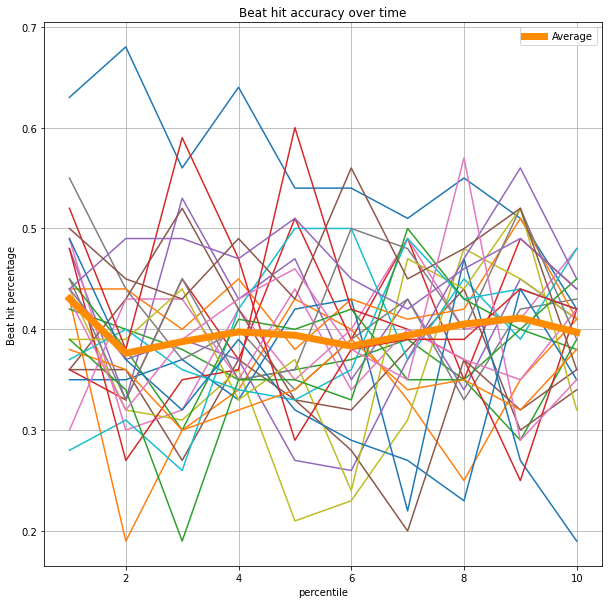

In [11]:
# Beat hits Percentile 
# comparison no rhythm and rhythm controlled. Do they get better? 

def percentage_percentile(beat_files, filter, divisions=10):

    fig, ax=plt.subplots(figsize=(10,10))

    divisions = 10
    all_avg = []
    for f in beat_files:

        df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows=1)
        df_beat = df_beat[df_beat["Action"].isin(filter)]

        time = np.array(df_beat["Time"])
        hits = np.array(df_beat["Beathit"])
        percentile = time.max()/divisions
        #print(percentile)
        avg = []
        #print(time.max())
        for i in range(divisions):
            #print(i, "low",i* percentile,"high", (i+1)* percentile)
            time_filter_low = (i* percentile) < time
            time_filter_high = time < ((i+1)* percentile)
            time_filter = np.logical_and(time_filter_low, time_filter_high)
            #print(list(zip(time_filter,time)))
            this_percentile = hits[time_filter]
            #print(len(this_percentile))
            if len(this_percentile) == 0:
                avg.append(0)
            else:
                avg.append(round(np.count_nonzero(this_percentile)/len(this_percentile), 2))
        #print(avg)
        ax.plot(np.arange(1, divisions+1),avg)
        all_avg.append(avg)

    all_avg = np.array(all_avg)
    #print(all_avg)
    np.mean(all_avg, axis=0)
    ax.plot(np.arange(1,divisions+1), np.mean(all_avg, axis = 0), linewidth=7.0, color='darkorange', label="Average")
    ax.legend()

    ax.set_title("Beat hit accuracy over time")
    ax.set_ylabel("Beat hit percentage")
    ax.set_xlabel("percentile")
    ax.grid(True)
    plt.show()    
percentage_percentile(beat_metrics_no_rhythm, action_filter_everything)
# no rhythm and every action

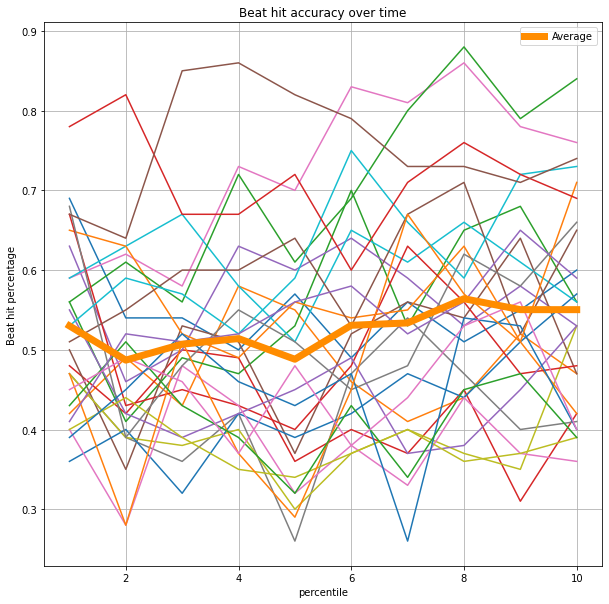

In [12]:
percentage_percentile(beat_metrics_controlled,action_filter_everything)
#beat controlled everything

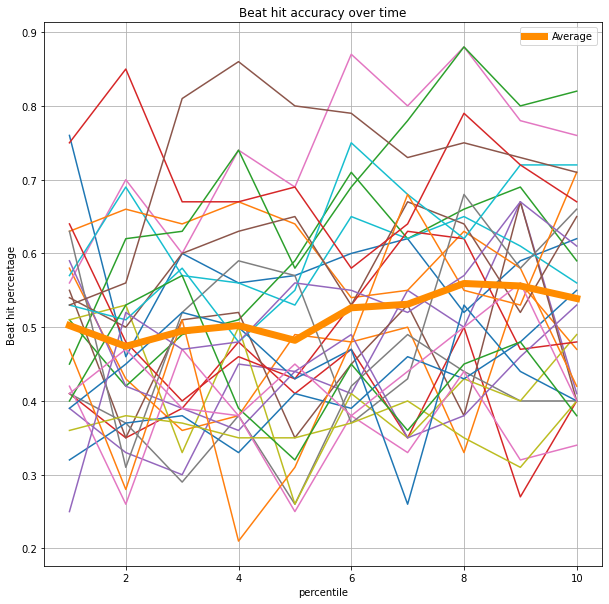

In [13]:
percentage_percentile(beat_metrics_controlled,action_filter_jumps)
# beat controlled only jumps

# scatter plots beatdelta and time

BeatMetric Things

missedBySeconds is beatdelta

b = missedBySeconds <= (ToleranceRange + toleranceShift) || missedBySeconds >= beatLength - (ToleranceRange - toleranceShift)

Attacks that you cannot miss:
["Player Attack SpinAttack","Player Attack StaggerAttack 3","Player Attack WindUpAttack 2","Player Attack StrongAttack 1"]

Attack that you allways miss: 
["Player Attack Weak Attack"]

Attack you can both fail and hit:
["Player Attack Dash"]

Jumps
["Jump", "Double Jump"]
You can hit/fail both jump types

Independant of Beat:
["Player Shielded"]


In [14]:
# Betty

states = {"Tutorial": 0, "Underground": 1, "Deepunderground" : 2, "Forest": 3, "Mushroom": 4, "Treetop": 5, "RedUnderground" : 6, "Spider": 7}
regions = {value: key for (key, value) in states.items()}

def region_state_machine(df_various, verbos = False):
    checkpoint_state = states["Tutorial"]
    state = states["Tutorial"]
    state_changes = []
    state_changes.append([0,state])
    previous = state
    for time, transition in zip(df_various["Time"],df_various["Action"]):
        if "Region" in transition:
            if state == states["Tutorial"]:
                #print("Tutorial")
                if transition == "Region underground entry 1":
                    state = states["Underground"]
                elif transition == "Region underground entry 2":
                    state = states["Deepunderground"]                
                elif transition == "Region 2nd forest start":
                    state = states["Forest"]
                elif "treetop" in transition:
                    state = states["Treetop"]
                elif "2nd forest" in transition:
                    state = states["Forest"]
                elif "deep underground" in transition:
                    state = states["Deepunderground"]
                elif "underground" in transition:
                    state= states["Underground"]
            elif state == states["Underground"]:
                #print("Underground")
                if transition == "Region first boss fight end":
                    state = states["Tutorial"]
                elif "deep underground" in transition:
                    state = states["Deepunderground"]
                elif transition == "Region underground entry 2":
                    state = states["Deepunderground"]
                elif transition == "Region 2nd forest start":
                    state = states["Forest"]
                elif transition == "Region Spider nest":
                    state = states["Spider"] # this one is illegal only deepunderground can transition to spider
            elif state == states["Deepunderground"]:
                #print("Deepunderground")
                if "deep underground" in transition:
                    state = states["Underground"]
                elif transition == "Region underground entry 2":
                    state = states["Tutorial"]
                elif transition == "Region Spider nest":
                    state = states["Spider"]
            elif state == states["Forest"]:
                #print("Forest")
                if transition == "Region first boss fight end":
                    state = states["Tutorial"]
                elif transition == "Region underground entry 1":
                    state = states["Underground"]
                elif transition == "Region 2nd forest end":
                    state = states["Mushroom"]
                elif "mushroom" in transition:
                    state = states["Mushroom"]
            elif state == states["Mushroom"]:
                #print("Mushroom")
                if transition == "Region 2nd forest end":
                    state = states["Forest"]
                elif transition == "Region treetop mushroom entry":
                    state = states["Treetop"]
                elif transition == "Region red underground entry":
                    state = states["RedUnderground"]
            elif state == states["Treetop"]:
                if transition == "Region treetop mushroom entry":
                    state = states["Mushroom"]
                elif transition == "Region treetop exit to tutorial forest":
                    state = states["Tutorial"]
                elif "first boss" in transition:
                    state = states["Tutorial"]
                elif "tutorial" in transition:
                    state = states["Tutorial"]
            elif state == states["RedUnderground"]:
                if transition == "Region red underground entry":
                    state = states["Mushroom"]
            elif state == states["Spider"]:
                if transition == "Region Spider nest":
                    state = states["Deepunderground"]
                    
            # failsaves for every state        
            if transition in ["Region jump tutorial start", "Region jump tutorial end", "Region first boss fight"]:
                state = states["Tutorial"]
            if transition in ["Region underground songtree entry"]:
                state = states["Underground"]
            if transition in ["Region red underground get over spikes jump riddle", "Region red underground bossplatform start", "Region red underground bossplatform end"]:
                state = states["RedUnderground"]
            if transition in ["Region 2nd forest spire 1", "Region 2nd forest spire 2"]:
                state = states["Forest"]
            if transition in ["Region mushroom downward entry", "Region mushroom slime boss start", "Region mushroom slime boss end", "Region mushroom songtree cliff", "Region mushroom lower platform right", "Region mushroom lower platform left"]:
                state = states["Mushroom"]
            if transition in ["Region treetop songtree", "Region treetop top spaceship platform", "Region treetop lower platform after songtree", "Region treetop leftmost spaceship platform", "Region treetop low spaceship platform"]:
                state = states["Treetop"]
                
            if verbos:
                print(f"{time} {transition} -> {regions[state]}")
        if transition== "player death":
            # set state to whatever state the active checkpoint is in
            state = checkpoint_state
            
            if verbos:
                print(f"{time} player death -> {regions[state]}")
        if "Checkpoint Activated" in transition:
            if "tutorial" in transition:
                checkpoint_state = states["Tutorial"]
            elif "forest" in transition:
                checkpoint_state = states["Forest"]
            elif "mushroom" in transition:
                checkpoint_state = states["Mushroom"]
            elif "spider" in transition:
                checkpoint_state = states["Spider"]
            elif "treetop" in transition:
                checkpoint_state = states["Treetop"]
            elif "underground red" in transition:
                checkpoint_state = states["RedUnderground"]
            elif "underground" in transition:
                checkpoint_state = states["Underground"]
            else:
                checkpoint_state = state
            state = checkpoint_state
            
        if "SpaceShip collected" in transition:
            if "tutorial" in transition:
                state = states["Tutorial"]
            elif "second_underground" in transition:
                state = states["RedUnderground"]
            elif "underground" in transition:
                state = states["Deepunderground"]
            elif "mushroom" in transition:
                state = states["Mushroom"]
            elif "treetop" in transition:
                state = states["Treetop"]
            elif "spider" in transition:
                state = states["Spider"]
            if verbos:
                print(f"{time} space ship collected -> {regions[state]}")
        if state != previous:
            if verbos:
                print(f"state change !!!!!")
            state_changes.append([time, state])
            previous = state
    return state_changes
            #print(f"{time } checkpoint {transition} in {regions[checkpoint_state]}")
# player death messes things up. upon player death reset the state to whatever region the last active checkpoint is located in            

In [108]:
# beat-deltas colored. green is hit and red is no hit
#print(df_beat)
import matplotlib
song_color = {"SongChange 0": 'gold', "SongChange 1": 'deepskyblue', "SongChange 2": 'lightcoral'}
region_color = {0: 'gold', 1: 'royalblue', 2 : 'purple', 3: 'green', 4: 'tomato', 5: "mediumturquoise", 6: "maroon", 7: "navy"}
#states = {"Tutorial": 0, "Underground": 1, "Deepunderground" : 2, "Forest": 3, "Mushroom": 4, "Treetop": 5, "RedUnderground" : 6, "Spider": 7}


# percantage of hits for rhythm controlled and No Rhythm
def hit_percentage(label,df_beat):
    hit = np.count_nonzero(df_beat["Beathit"])
    cnt = len(df_beat["Beathit"])
    print(f"{label} hits: {hit}/{cnt} = {round((hit/cnt) * 100,2)} %")
    

def region_discovery(state_change, unique_regions_discovered):
    state_time = state_change[:,0]
    state_state = state_change[:,1]
    
    unique = len(unique_regions_discovered)
    total = 8
    print(f"unique regions discovered: {unique}/{total} = {round((unique/total)*100,2)} %")
    print(f"total region changes: {len(state_state)}")
    #time spent in region
    regiontime = {"Tutorial": 0, "Underground": 0, "Deepunderground" : 0, "Forest": 0, "Mushroom": 0, "Treetop": 0, "RedUnderground" : 0, "Spider": 0}
    for index in range(len(state_state)):
        start, end = state_time[index], 1200
        if index < len(state_state)-1:
            end = state_time[index+1]
        regiontime[regions[state_state[index]]] += end - start
    print(f"time spent in regions: {regiontime}")
    
    
def song_playtime(df_songchange):
    # time spent in each song
    songchange = list(df_songchange["Action"])
    songchange_time= list(df_songchange["Time"])
    playtime = {"SongChange 0":0, "SongChange 1":0, "SongChange 2":0}
    for index in range(len(songchange)):
        start, end = songchange_time[index], 1200
        if index < len(songchange)-1:
            end = songchange_time[index+1]
        playtime[songchange[index]] += end - start
    print(f"time spent in songs: {playtime}")

def Analyse(beat: str, various: str, combat: str, verbos = False):
    if not isinstance(beat, str):
        raise TypeError("The beat wasn't passed as a String")
    print(beat, various, combat)
    
    df_various = pd.read_csv(os.path.join(mypath, various), sep=',', skiprows = 1)
    df_various = df_various.drop_duplicates(subset= ["Time","Action"], keep='first')
    df_combat = pd.read_csv(os.path.join(mypath, combat), sep=',', skiprows = 1)
    df_input_device = df_various[df_various["Action"].isin(["Keyboard & Mouse", "Gamepad"])]
    
    df_songchange = df_various.loc[df_various["Action"].str.contains("Songchange", case = False)]
    songchange = list(df_songchange["Action"])
    songchange_time = list(df_songchange["Time"])                      
    song_playtime(df_songchange)
                  
    fig, ax=plt.subplots(nrows = 2, ncols = 2 ,figsize=(20,20)) # sharex=True
    
    # Beat Plots
    def beat_delta_scatter_plot(title, ind1, ind2, action_filter):  # nested functions goes brrrrrrrr
        df_beat = pd.read_csv(os.path.join(mypath, beat), sep=',', skiprows = 1)
        df_beat = df_beat[df_beat["Action"].isin(action_filter)]
        # scatterplot time and beatdelta in red and green
        hit_filter = np.array(df_beat["Beathit"])
        t = np.array(df_beat["Time"])
        d = np.array(df_beat["BeatDelta"])
        
        ax[ind1, ind2].scatter(t[hit_filter],d[hit_filter], zorder=4, c="green", label="in union with beat")
        ax[ind1, ind2].scatter(t[~hit_filter],d[~hit_filter], zorder=4, c="red", label="missed the beat")
        
        # songchanges in background
        for index in range(len(songchange)):
            start, end = songchange_time[index], 1200
            if index < len(songchange)-1:
                end = songchange_time[index+1]
            ax[ind1, ind2].axvspan(start, end, facecolor=song_color[songchange[index]], alpha=0.3, zorder=3, label=f"{songchange[index]}")
        handels, labels = ax[ind1, ind2].get_legend_handles_labels()
        by_label = dict(zip(labels, handels))
        
        ax[ind1, ind2].legend(by_label.values(), by_label.keys(), loc='lower right')  
        ax[ind1, ind2].set_title(f"{title}")
        ax[ind1, ind2].set_ylabel("BeatDelta")
        ax[ind1, ind2].set_xlabel("Time")
        ax[ind1, ind2].grid(True)
        
        hit_percentage(title, df_beat)
    
    beat_delta_scatter_plot("Jumps", 0, 0, action_filter_jumps)
    beat_delta_scatter_plot("Attacks", 0, 1, action_filter_attacks)

    
    #Progression Plot
    ind1, ind2 = 1,0
    df_spaceship = df_various.loc[df_various["Action"].str.contains("SpaceShip", case=True)]
    spaceships = list(df_spaceship["Action"])
    time = np.array(df_spaceship["Time"])
    if verbos:
        print("space ship dataframe", df_spaceship)
    ax[ind1, ind2].scatter(time,np.arange(1,len(spaceships)+1), zorder=4, color='black', linewidth=2.0, label="Spaceship Part Collected")
    time = np.insert(time, 0, 0)
    ax[ind1, ind2].plot(time,np.arange(0, len(spaceships)+1), zorder=4, color = 'black')

    state_change = np.array(region_state_machine(df_various,verbos)) # we call upon Betty
    state_time = state_change[:,0]
    state_state = state_change[:,1]
    for index in range(len(state_state)):
        start, end = state_time[index], 1200
        if index < len(state_state)-1:
            end = state_time[index+1]
        ax[ind1, ind2].axvspan(start, end, facecolor=region_color[state_state[index]], alpha=0.5, zorder=3, label=f"{regions[state_state[index]]} Region")

    ax[ind1, ind2].set_yticks(np.arange(0,10))
    ax[ind1, ind2].set_title(f"Exploration Progress")
    ax[ind1, ind2].set_ylabel("Total Space Ship Parts Collected")
    ax[ind1, ind2].set_xlabel("Time")
    handels, labels = ax[ind1, ind2].get_legend_handles_labels()
    by_label = dict(zip(labels, handels))
    ax[ind1, ind2].legend(by_label.values(), by_label.keys(), loc = 'lower right')
    ax[ind1, ind2].grid(True)
    
    region_discovery(state_change, list(by_label.keys()))
    
    # Combat Plot
    ind1, ind2 = 1,1
    df_deaths = df_combat.loc[df_combat["Action"].str.contains("death", case=False)]
    #print(df_deaths)
    
    df_deaths_enemy = df_deaths.loc[df_deaths["HitBy"].str.contains("Player", case=False)]
    
    df_deaths_player = df_deaths.loc[df_deaths["Entity"].str.contains("player", case=False)]
    df_deaths_player = df_deaths_player.loc[~df_deaths_player["HitBy"].str.contains("resetToCheckpoint", case=False)]
    player_combat_death_mask = np.array(~df_deaths_player["HitBy"].str.contains("Boundaries|spike", case=False, regex=True))
    death_time = np.array(df_deaths_player["Time"])
    death_number = np.arange(1,len(df_deaths_player["Time"])+1)
    
    
    ax[ind1, ind2].scatter(df_deaths_enemy["Time"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemy alien death", linewidth=2.0, color='darkorange')
    ax[ind1, ind2].scatter(death_time[player_combat_death_mask], death_number[player_combat_death_mask], label="Player death combat",linewidth=2.0, color='blue')
    ax[ind1, ind2].scatter(death_time[~player_combat_death_mask], death_number[~player_combat_death_mask], label="Player death through spikes or level boundaries", linewidth=2.0, color='blue', marker='x')
    
    ax[ind1, ind2].set_title(f"Combat")
    ax[ind1, ind2].set_ylabel("Deaths")
    ax[ind1, ind2].set_xlabel("Time")
    ax[ind1, ind2].legend(loc = 'upper left')
    ax[ind1, ind2].grid(True)
    
    # Global plot settings
    fig.suptitle (f"{beat}", fontsize = 20)
    ax[0,1].sharex(ax[0,0])
    ax[1,0].sharex(ax[0,0])
    ax[1,1].sharex(ax[0,0])
    ax[0,1].sharey(ax[0,0])
    plt.show()
    

#Analyse(beat_metrics[0], various_metrics[0], combat_metrics[0])
def AnalysePlayer(playernumber: str, version: str = "Controlled", verbos=False):
    player_metrics = [f for f in onlyfiles if playernumber in f]
    player_metrics_norhythm = [f for f in player_metrics if "NoRhythm" in f]
    player_metrics_controlled = [f for f in player_metrics if "RhythmControlled" in f]
    
    norhythm_various = [f for f in player_metrics_norhythm if "Various_Metric" in f]
    norhythm_beat = [f for f in player_metrics_norhythm if "Beat_Metric" in f]
    norhythm_combat = [f for f in player_metrics_norhythm if "Combat_Metric" in f]
    
    controlled_various = [f for f in player_metrics_controlled if "Various_Metric" in f]
    controlled_beat = [f for f in player_metrics_controlled if "Beat_Metric" in f]
    controlled_combat = [f for f in player_metrics_controlled if "Combat_Metric" in f]
    if version == "Controlled":
        Analyse(controlled_beat[0], controlled_various[0], controlled_combat[0], verbos=verbos)
    else:
        Analyse(norhythm_beat[0], norhythm_various[0], norhythm_combat[0], verbos=verbos)

045522_NoRhythm_10_12_21_02_08_Beat_Metric.csv 045522_NoRhythm_10_12_21_02_08_Various_Metric.csv 045522_NoRhythm_10_12_21_02_08_Combat_Metric.csv
time spent in songs: {'SongChange 0': 145, 'SongChange 1': 573, 'SongChange 2': 482}
Jumps hits: 191/530 = 36.04 %
Attacks hits: 37/124 = 29.84 %
unique regions discovered: 9/8 = 112.5 %
total region changes: 33
time spent in regions: {'Tutorial': 92, 'Underground': 224, 'Deepunderground': 175, 'Forest': 66, 'Mushroom': 169, 'Treetop': 224, 'RedUnderground': 201, 'Spider': 49}


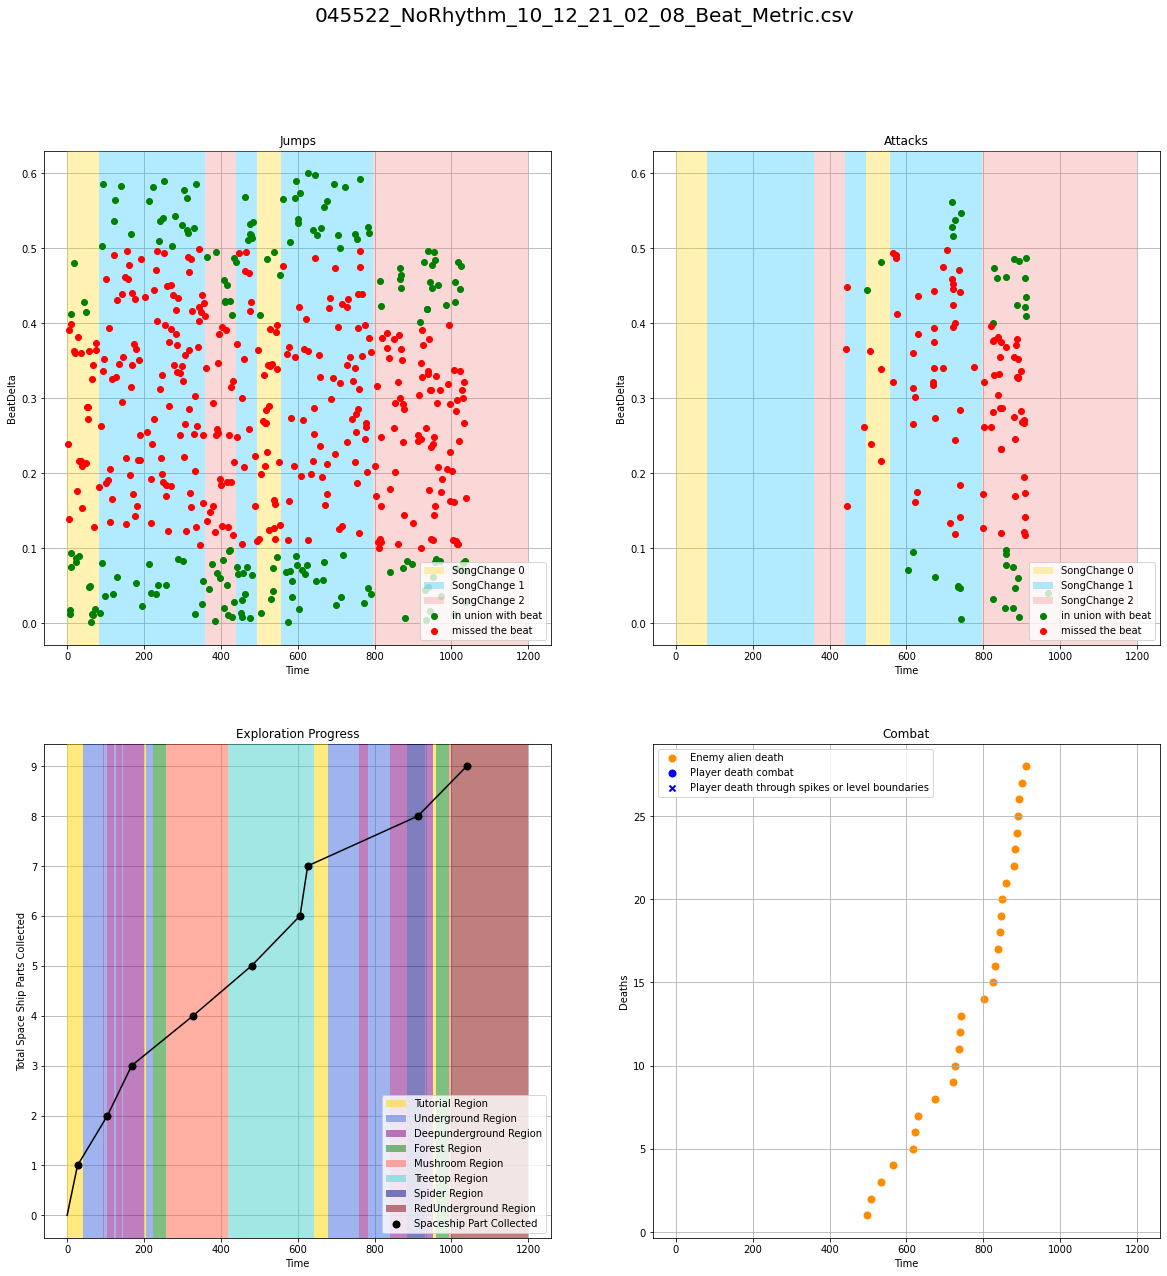

In [109]:
AnalysePlayer("045522", "NoRhythm", verbos=False)
#AnalysePlayer("088835", "NoRhythm")
#AnalysePlayer("000990", "NoRhythm", verbos=False)

000990_NoRhythm_04_12_21_12_39_Beat_Metric.csv 000990_NoRhythm_04_12_21_12_39_Various_Metric.csv 000990_NoRhythm_04_12_21_12_39_Combat_Metric.csv
time spent in songs: {'SongChange 0': 366, 'SongChange 1': 266, 'SongChange 2': 568}
Jumps hits: 349/633 = 55.13 %
Attacks hits: 41/64 = 64.06 %
unique regions discovered: 8/8 = 100.0 %
total region changes: 29
time spent in regions: {'Tutorial': 88, 'Underground': 60, 'Deepunderground': 73, 'Forest': 150, 'Mushroom': 540, 'Treetop': 84, 'RedUnderground': 205, 'Spider': 0}


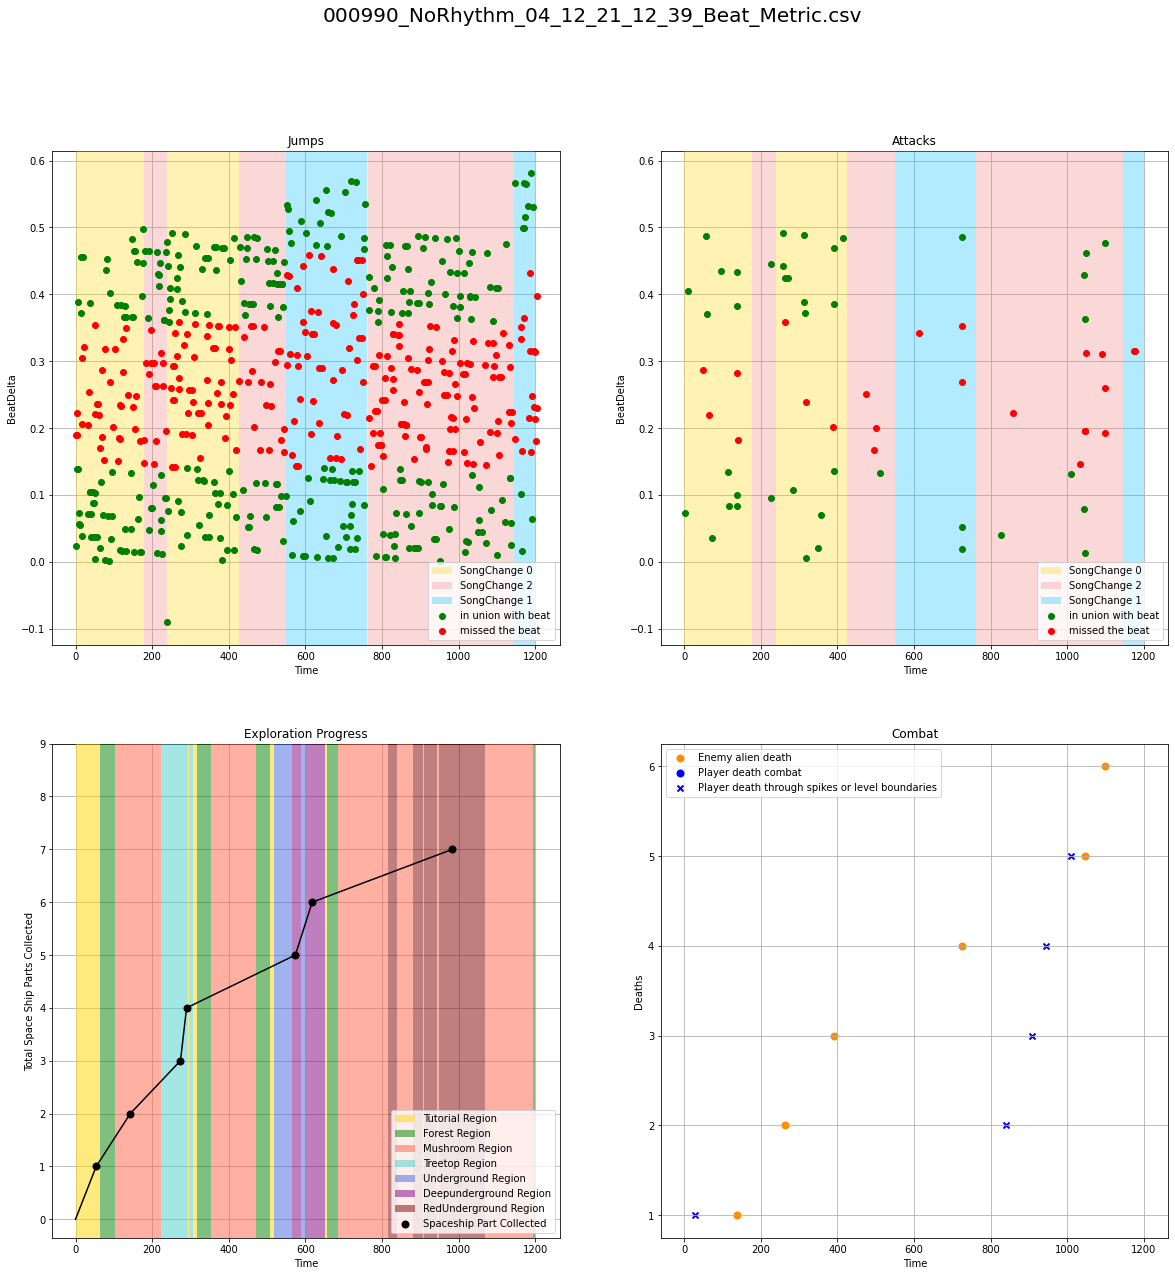

000990_RhythmControlled_04_12_21_12_11_Beat_Metric.csv 000990_RhythmControlled_04_12_21_12_11_Various_Metric.csv 000990_RhythmControlled_04_12_21_12_11_Combat_Metric.csv
time spent in songs: {'SongChange 0': 244, 'SongChange 1': 585, 'SongChange 2': 371}
Jumps hits: 300/510 = 58.82 %
Attacks hits: 144/300 = 48.0 %
unique regions discovered: 8/8 = 100.0 %
total region changes: 20
time spent in regions: {'Tutorial': 155, 'Underground': 190, 'Deepunderground': 46, 'Forest': 237, 'Mushroom': 375, 'Treetop': 98, 'RedUnderground': 99, 'Spider': 0}


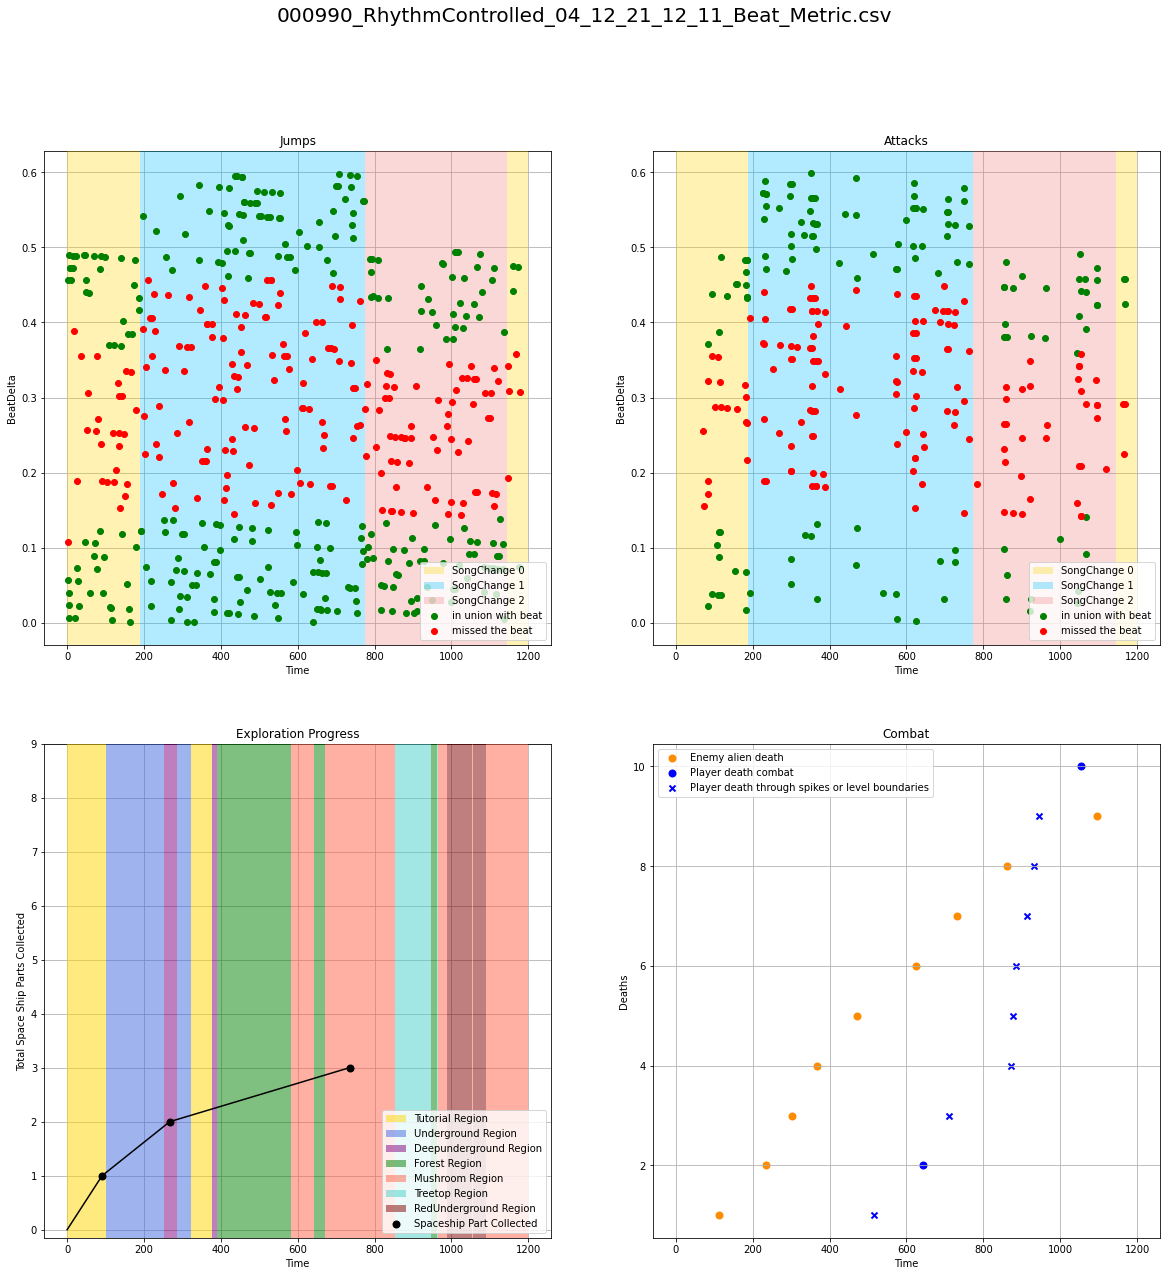

045522_NoRhythm_10_12_21_02_08_Beat_Metric.csv 045522_NoRhythm_10_12_21_02_08_Various_Metric.csv 045522_NoRhythm_10_12_21_02_08_Combat_Metric.csv
time spent in songs: {'SongChange 0': 145, 'SongChange 1': 573, 'SongChange 2': 482}
Jumps hits: 191/530 = 36.04 %
Attacks hits: 37/124 = 29.84 %
unique regions discovered: 9/8 = 112.5 %
total region changes: 33
time spent in regions: {'Tutorial': 92, 'Underground': 224, 'Deepunderground': 175, 'Forest': 66, 'Mushroom': 169, 'Treetop': 224, 'RedUnderground': 201, 'Spider': 49}


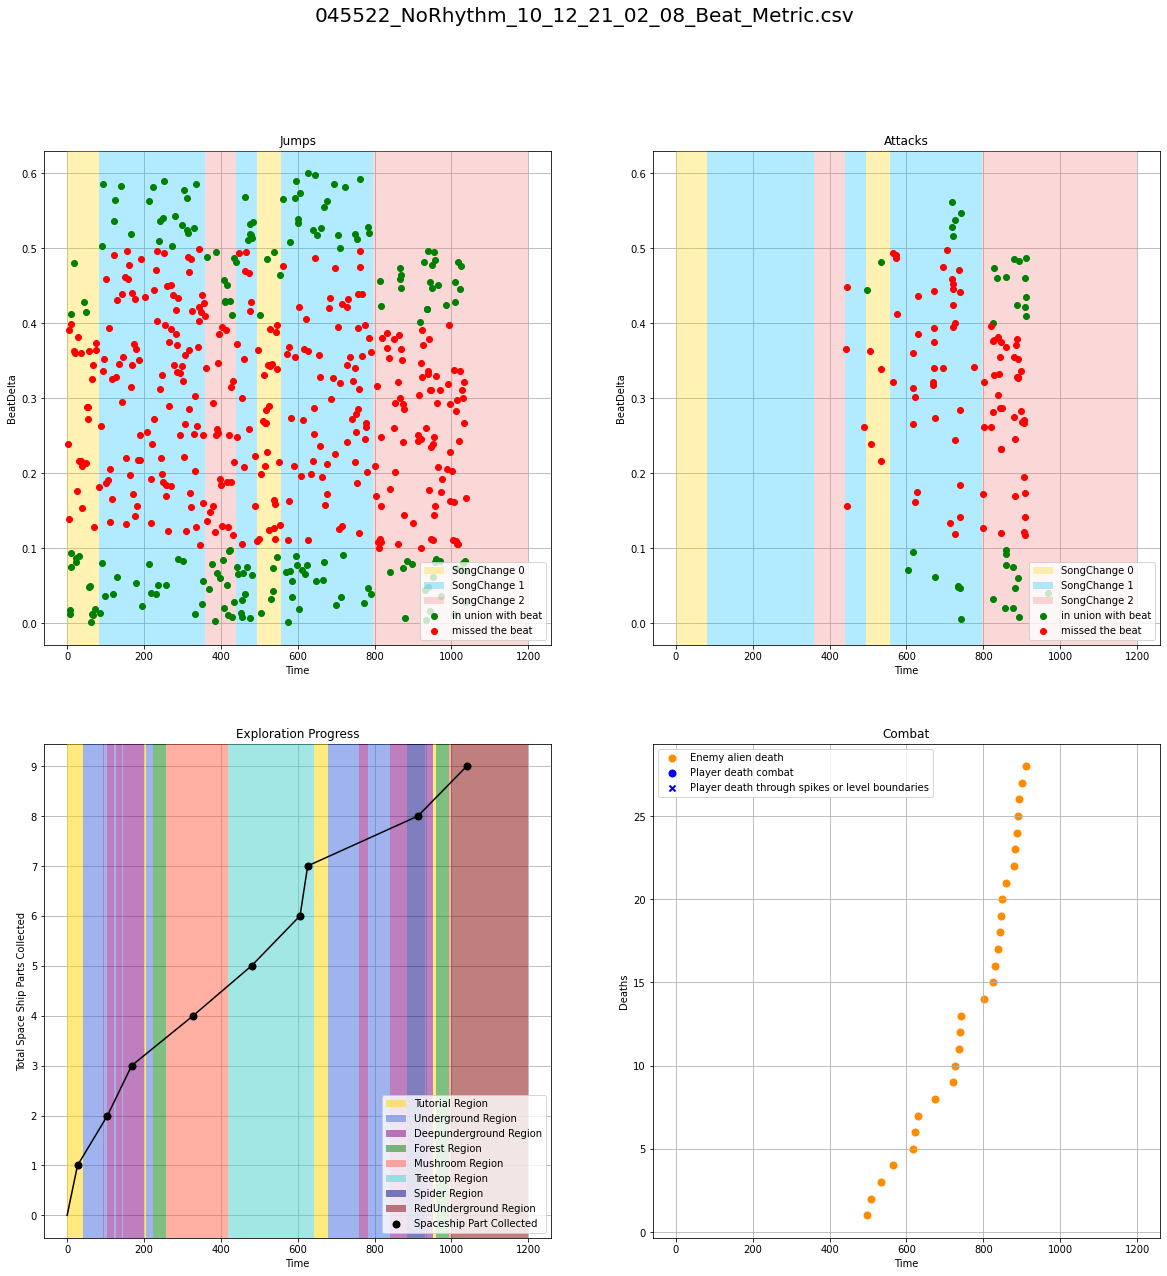

045522_RhythmControlled_10_12_21_01_39_Beat_Metric.csv 045522_RhythmControlled_10_12_21_01_39_Various_Metric.csv 045522_RhythmControlled_10_12_21_01_39_Combat_Metric.csv
time spent in songs: {'SongChange 0': 273, 'SongChange 1': 814, 'SongChange 2': 113}
Jumps hits: 203/441 = 46.03 %
Attacks hits: 157/305 = 51.48 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 9
time spent in regions: {'Tutorial': 178, 'Underground': 208, 'Deepunderground': 83, 'Forest': 222, 'Mushroom': 501, 'Treetop': 8, 'RedUnderground': 0, 'Spider': 0}


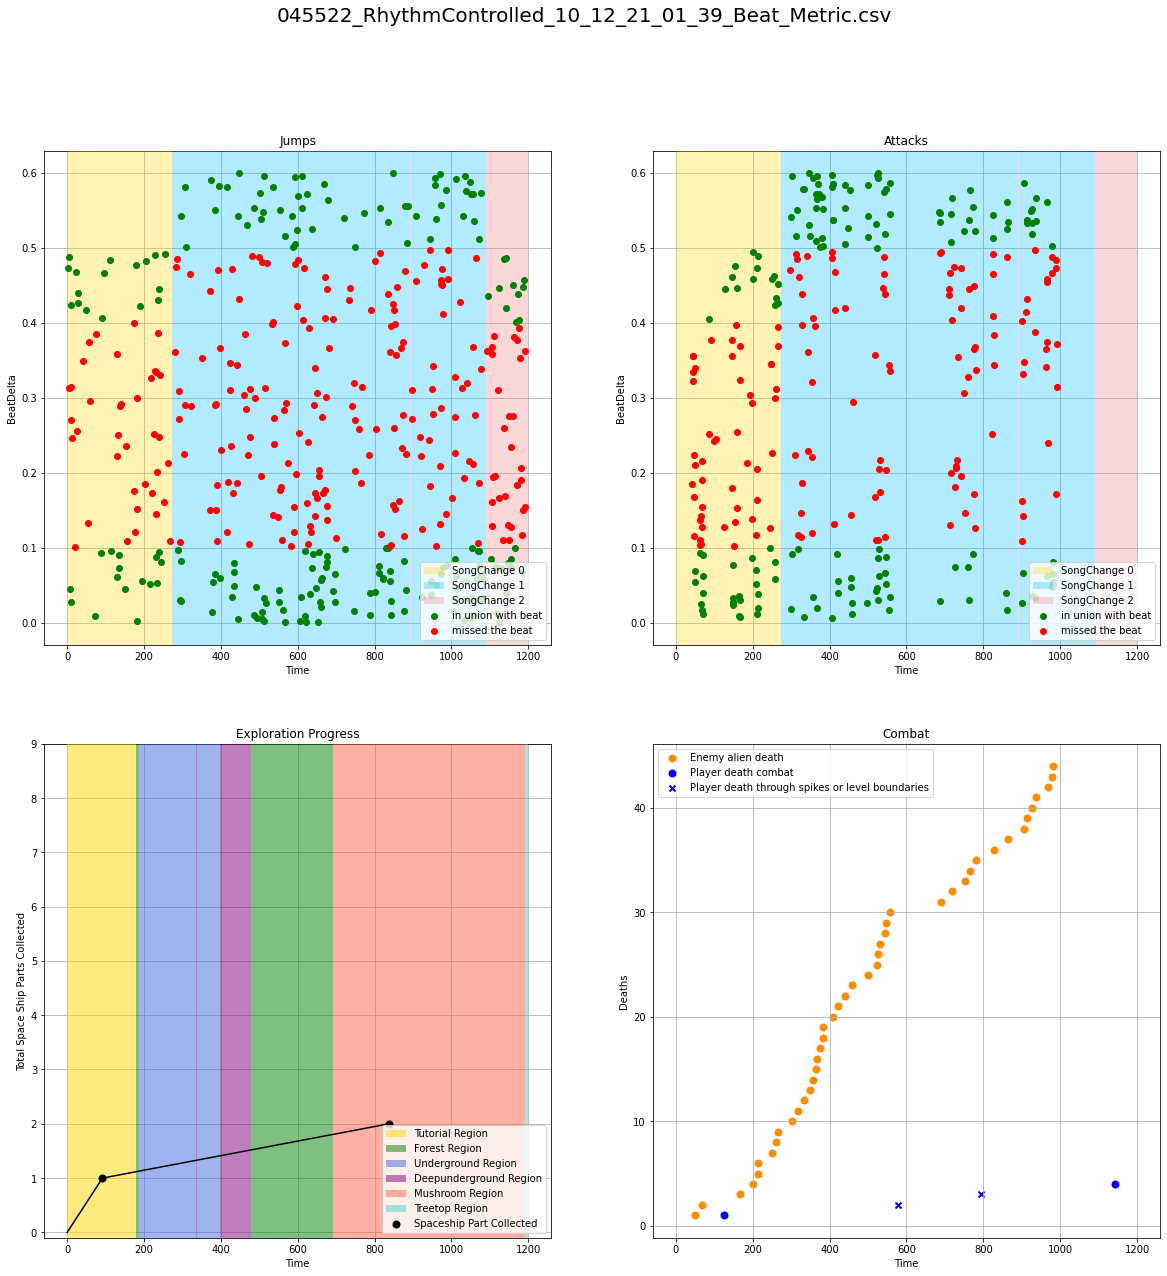

061295_NoRhythm_05_12_21_05_27_Beat_Metric.csv 061295_NoRhythm_05_12_21_05_27_Various_Metric.csv 061295_NoRhythm_05_12_21_05_27_Combat_Metric.csv
time spent in songs: {'SongChange 0': 458, 'SongChange 1': 0, 'SongChange 2': 742}
Jumps hits: 257/700 = 36.71 %
Attacks hits: 70/178 = 39.33 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 12
time spent in regions: {'Tutorial': 63, 'Underground': 4, 'Deepunderground': 0, 'Forest': 58, 'Mushroom': 594, 'Treetop': 123, 'RedUnderground': 358, 'Spider': 0}


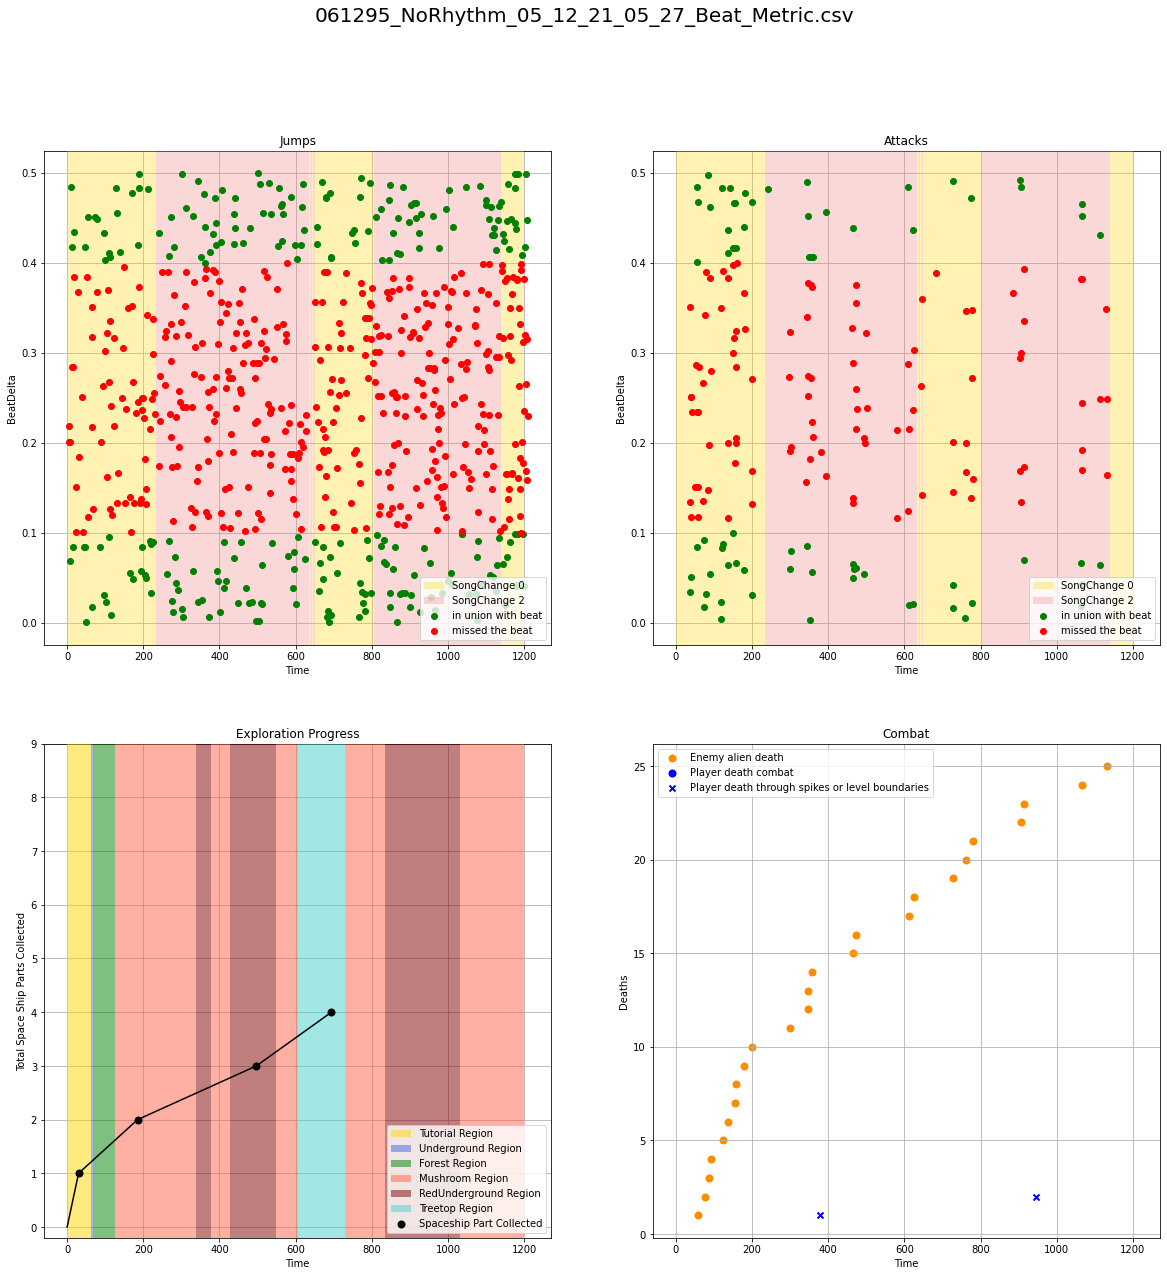

061295_RhythmControlled_05_12_21_05_53_Beat_Metric.csv 061295_RhythmControlled_05_12_21_05_53_Various_Metric.csv 061295_RhythmControlled_05_12_21_05_53_Combat_Metric.csv
time spent in songs: {'SongChange 0': 122, 'SongChange 1': 577, 'SongChange 2': 501}
Jumps hits: 382/655 = 58.32 %
Attacks hits: 72/168 = 42.86 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 23
time spent in regions: {'Tutorial': 103, 'Underground': 89, 'Deepunderground': 135, 'Forest': 143, 'Mushroom': 469, 'Treetop': 0, 'RedUnderground': 261, 'Spider': 0}


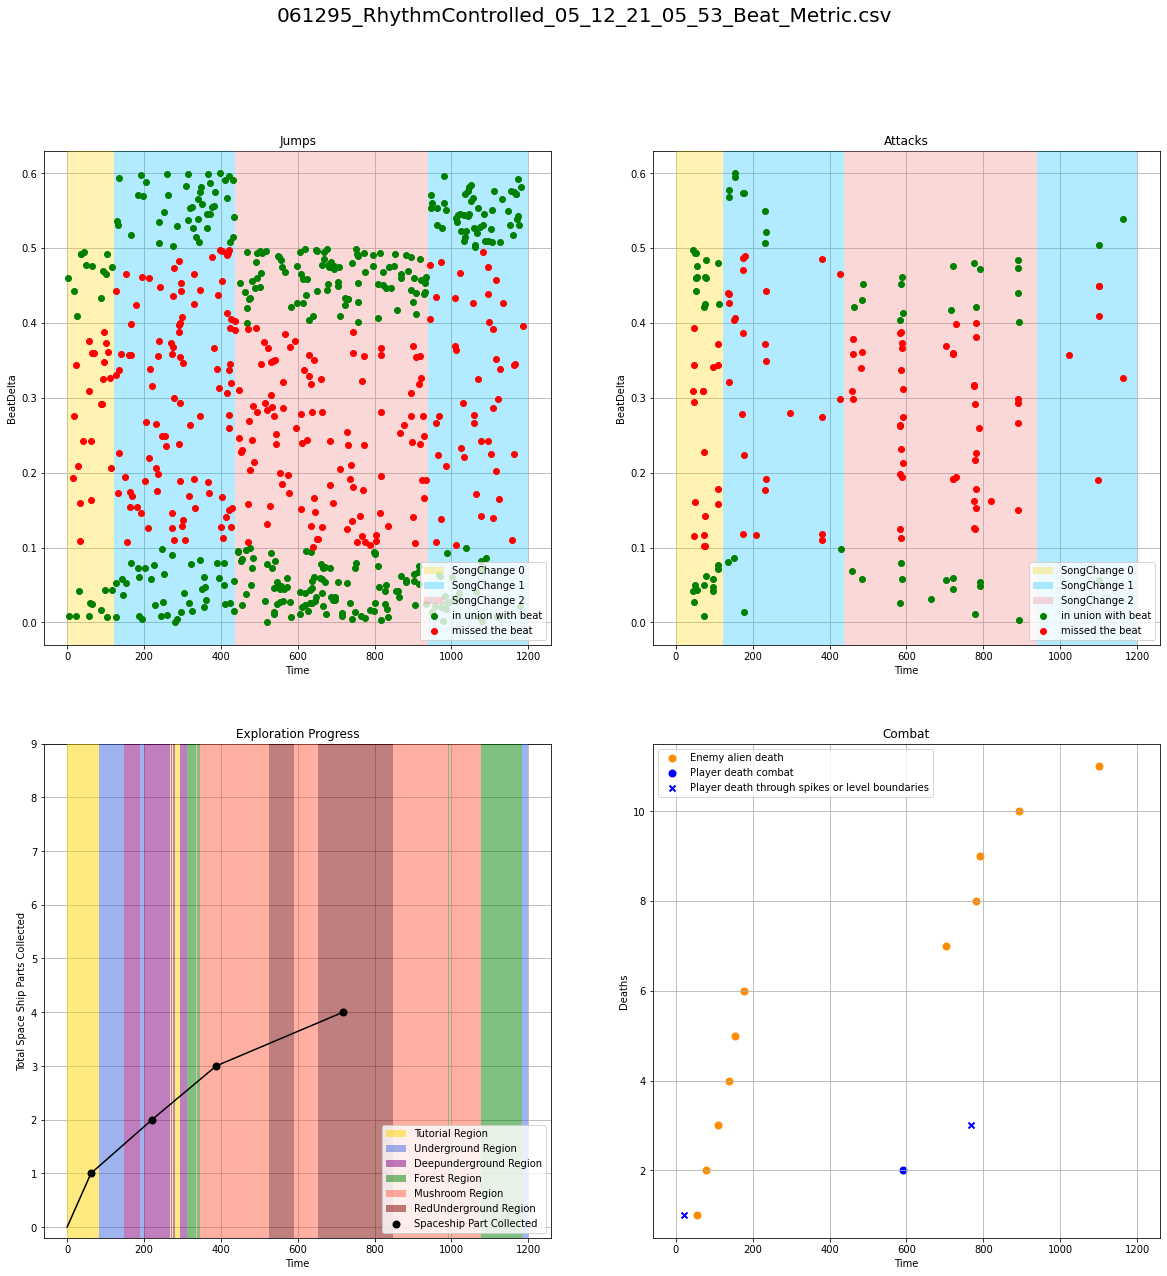

088835_NoRhythm_21_11_21_05_42_Beat_Metric.csv 088835_NoRhythm_21_11_21_05_42_Various_Metric.csv 088835_NoRhythm_21_11_21_05_42_Combat_Metric.csv
time spent in songs: {'SongChange 0': 104, 'SongChange 1': 556, 'SongChange 2': 540}
Jumps hits: 246/591 = 41.62 %
Attacks hits: 27/68 = 39.71 %
unique regions discovered: 9/8 = 112.5 %
total region changes: 29
time spent in regions: {'Tutorial': 95, 'Underground': 144, 'Deepunderground': 204, 'Forest': 41, 'Mushroom': 224, 'Treetop': 188, 'RedUnderground': 137, 'Spider': 167}


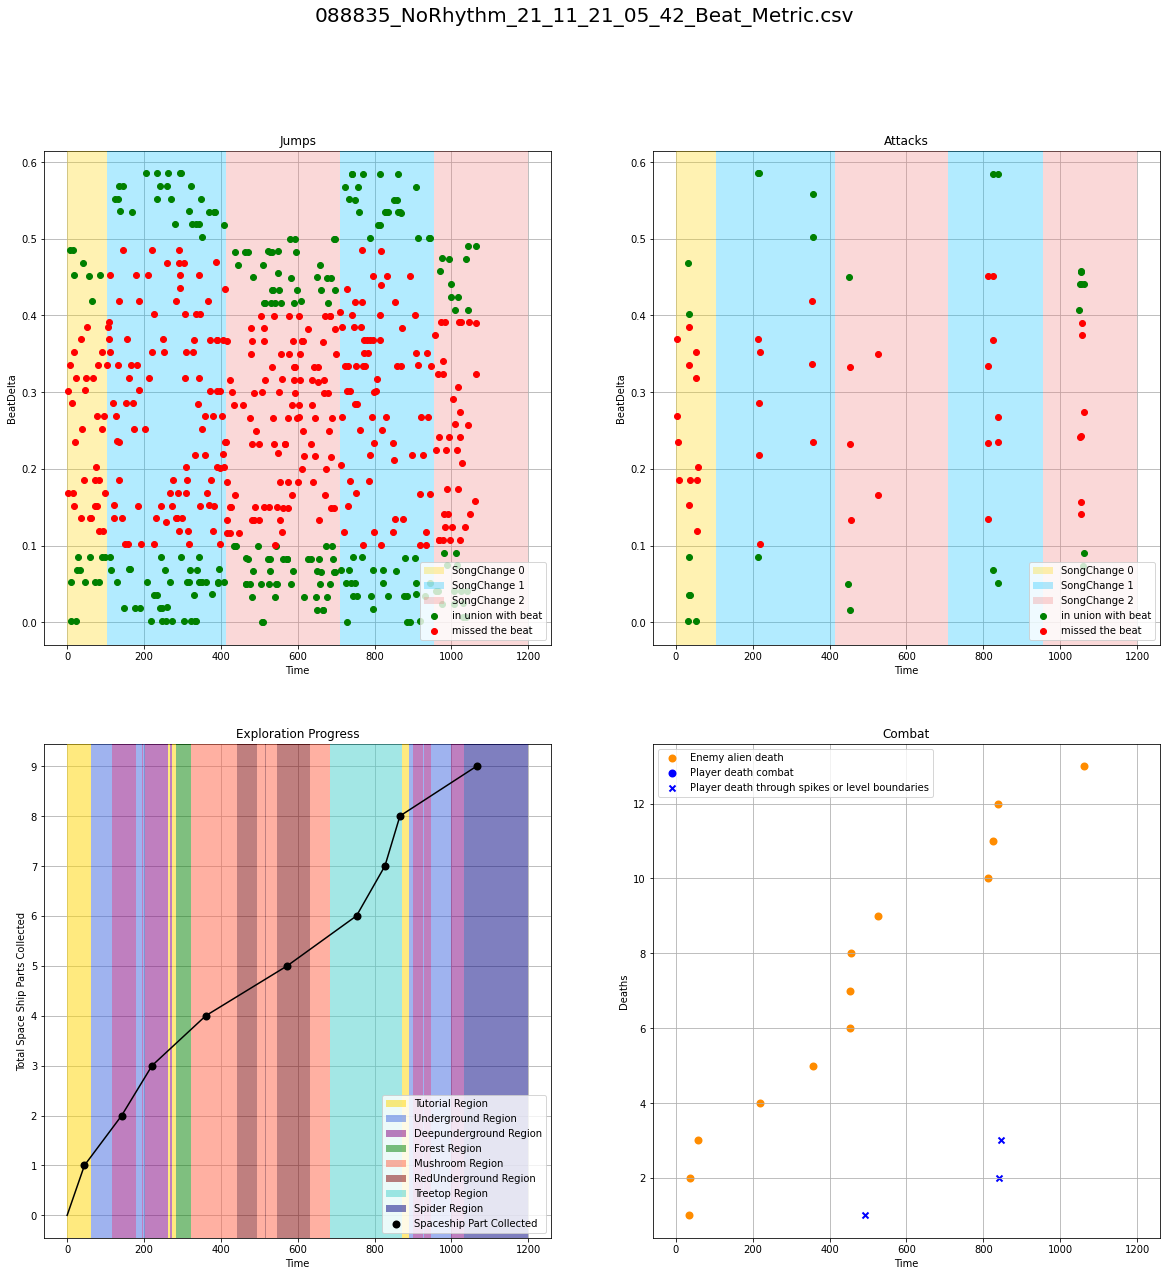

088835_RhythmControlled_21_11_21_05_13_Beat_Metric.csv 088835_RhythmControlled_21_11_21_05_13_Various_Metric.csv 088835_RhythmControlled_21_11_21_05_13_Combat_Metric.csv
time spent in songs: {'SongChange 0': 584, 'SongChange 1': 465, 'SongChange 2': 151}
Jumps hits: 177/437 = 40.5 %
Attacks hits: 165/378 = 43.65 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 12
time spent in regions: {'Tutorial': 157, 'Underground': 344, 'Deepunderground': 102, 'Forest': 202, 'Mushroom': 200, 'Treetop': 195, 'RedUnderground': 0, 'Spider': 0}


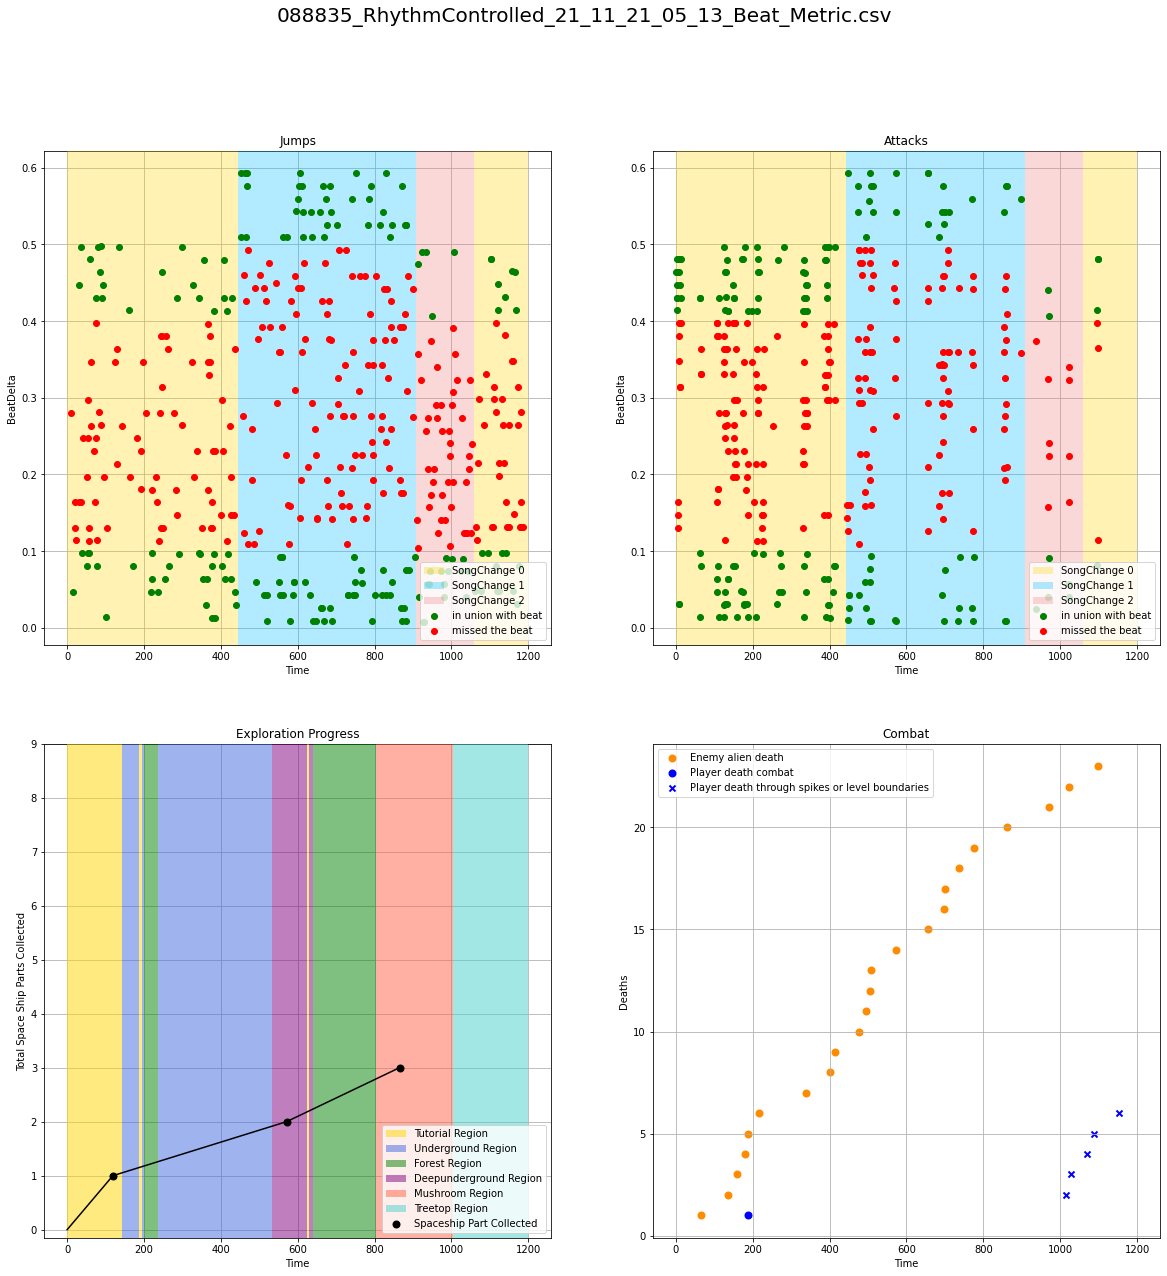

157771_NoRhythm_02_12_21_06_04_Beat_Metric.csv 157771_NoRhythm_02_12_21_06_04_Various_Metric.csv 157771_NoRhythm_02_12_21_06_04_Combat_Metric.csv
time spent in songs: {'SongChange 0': 164, 'SongChange 1': 431, 'SongChange 2': 605}
Jumps hits: 181/446 = 40.58 %
Attacks hits: 176/405 = 43.46 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 14
time spent in regions: {'Tutorial': 85, 'Underground': 177, 'Deepunderground': 59, 'Forest': 108, 'Mushroom': 345, 'Treetop': 0, 'RedUnderground': 426, 'Spider': 0}


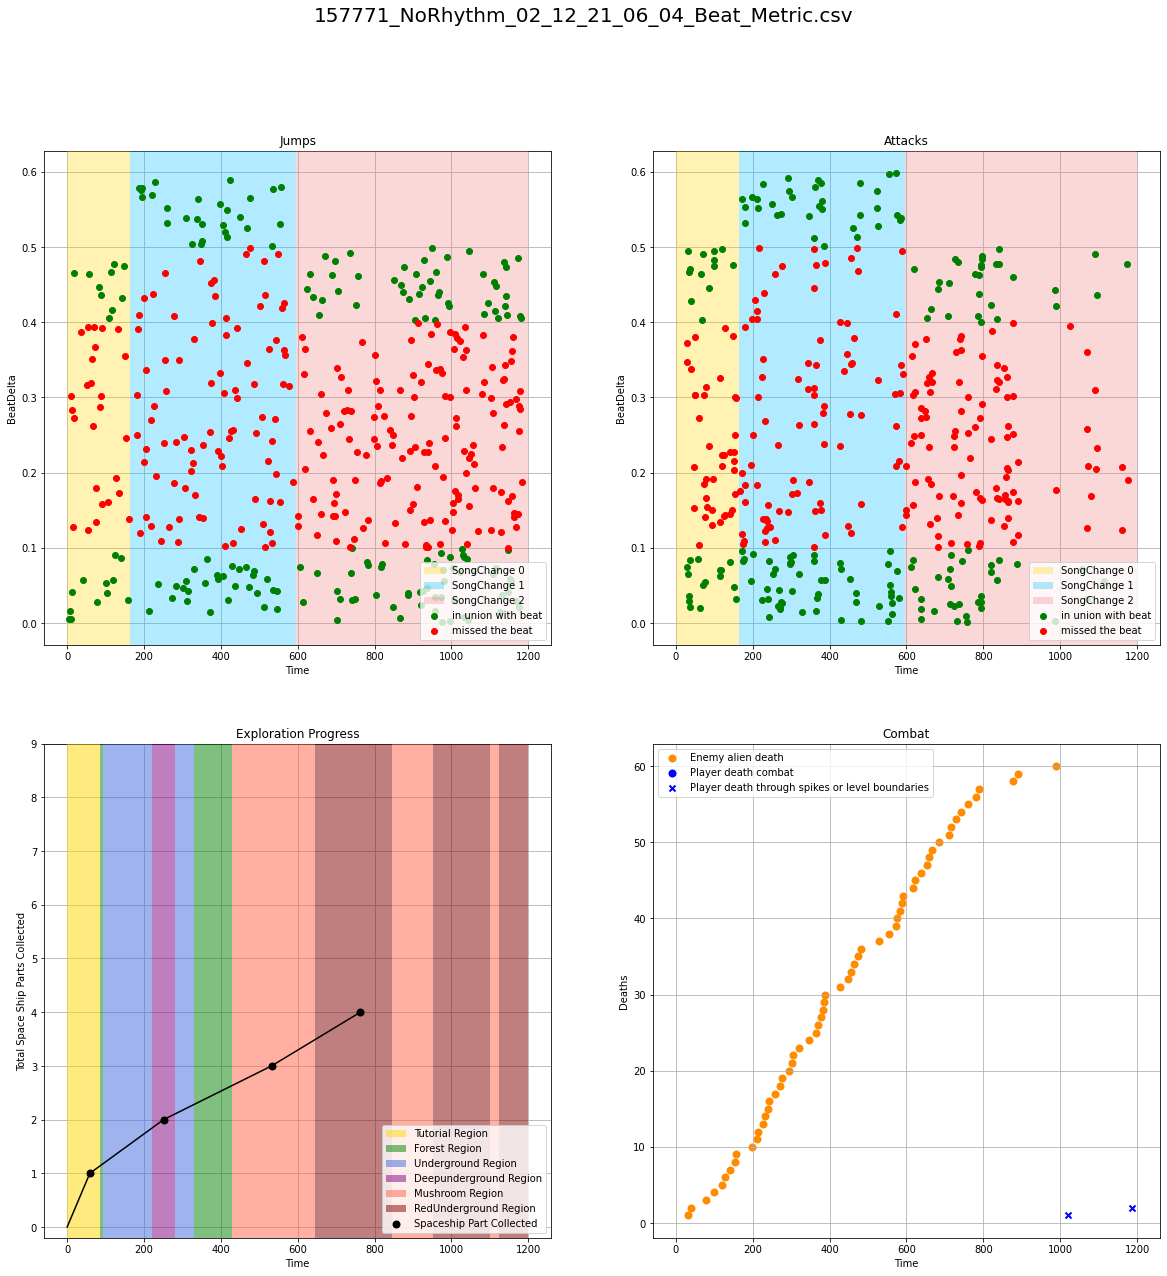

157771_RhythmControlled_02_12_21_06_35_Beat_Metric.csv 157771_RhythmControlled_02_12_21_06_35_Various_Metric.csv 157771_RhythmControlled_02_12_21_06_35_Combat_Metric.csv
time spent in songs: {'SongChange 0': 216, 'SongChange 1': 984, 'SongChange 2': 0}
Jumps hits: 124/264 = 46.97 %
Attacks hits: 232/367 = 63.22 %
unique regions discovered: 5/8 = 62.5 %
total region changes: 15
time spent in regions: {'Tutorial': 92, 'Underground': 304, 'Deepunderground': 109, 'Forest': 695, 'Mushroom': 0, 'Treetop': 0, 'RedUnderground': 0, 'Spider': 0}


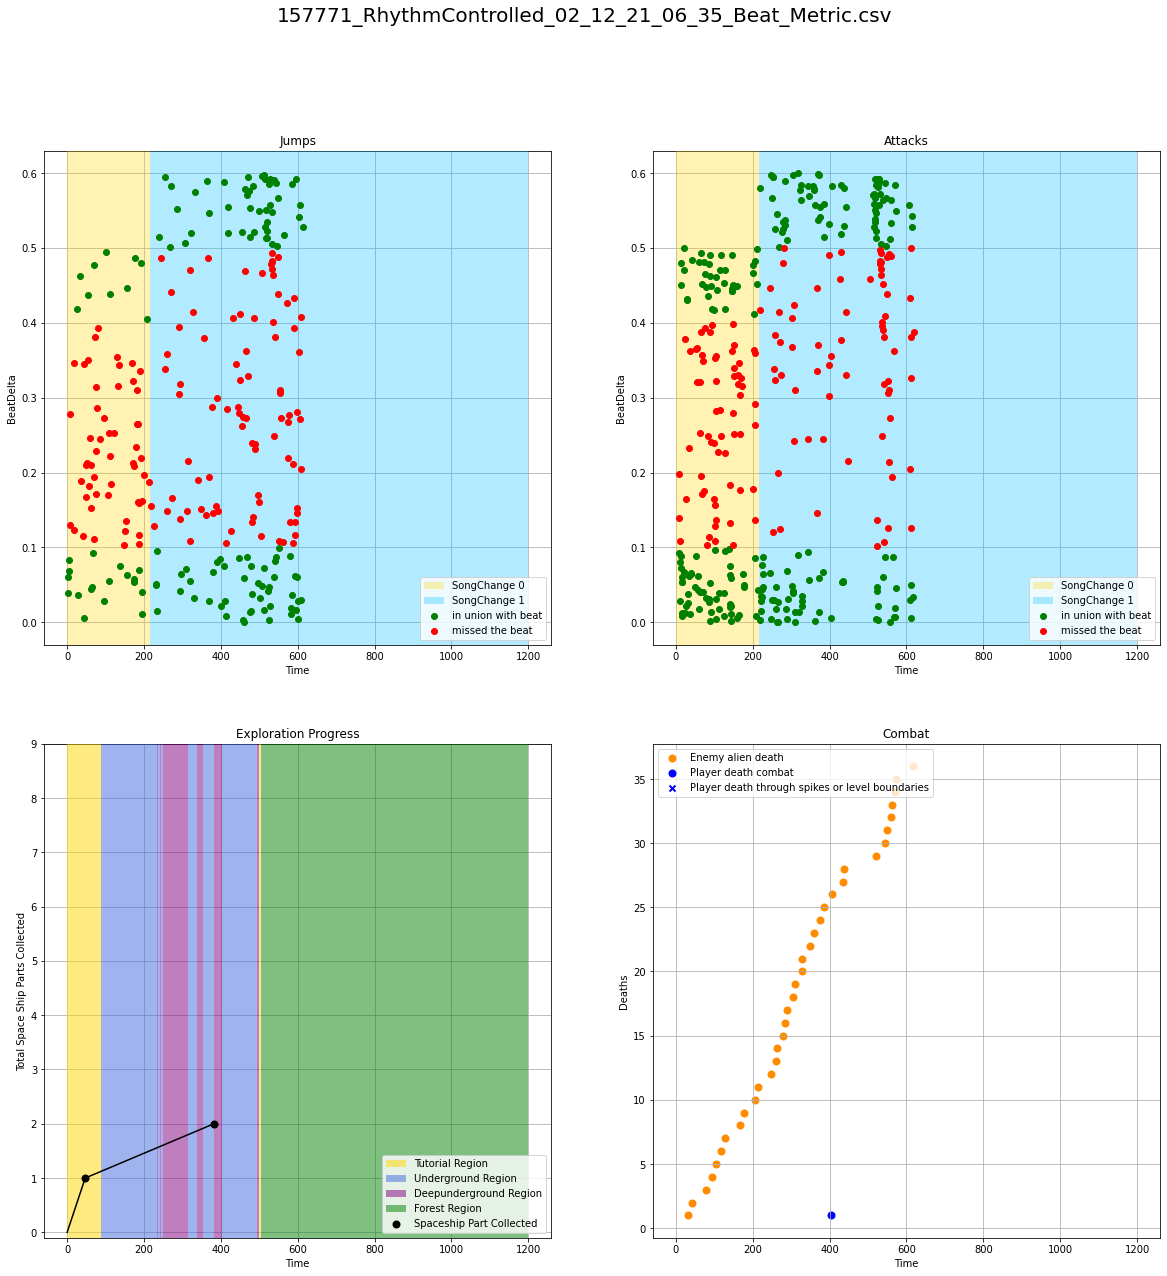

198760_NoRhythm_06_12_21_06_35_Beat_Metric.csv 198760_NoRhythm_06_12_21_06_35_Various_Metric.csv 198760_NoRhythm_06_12_21_06_35_Combat_Metric.csv
time spent in songs: {'SongChange 0': 248, 'SongChange 1': 819, 'SongChange 2': 133}
Jumps hits: 171/498 = 34.34 %
Attacks hits: 116/324 = 35.8 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 21
time spent in regions: {'Tutorial': 243, 'Underground': 247, 'Deepunderground': 107, 'Forest': 92, 'Mushroom': 317, 'Treetop': 194, 'RedUnderground': 0, 'Spider': 0}


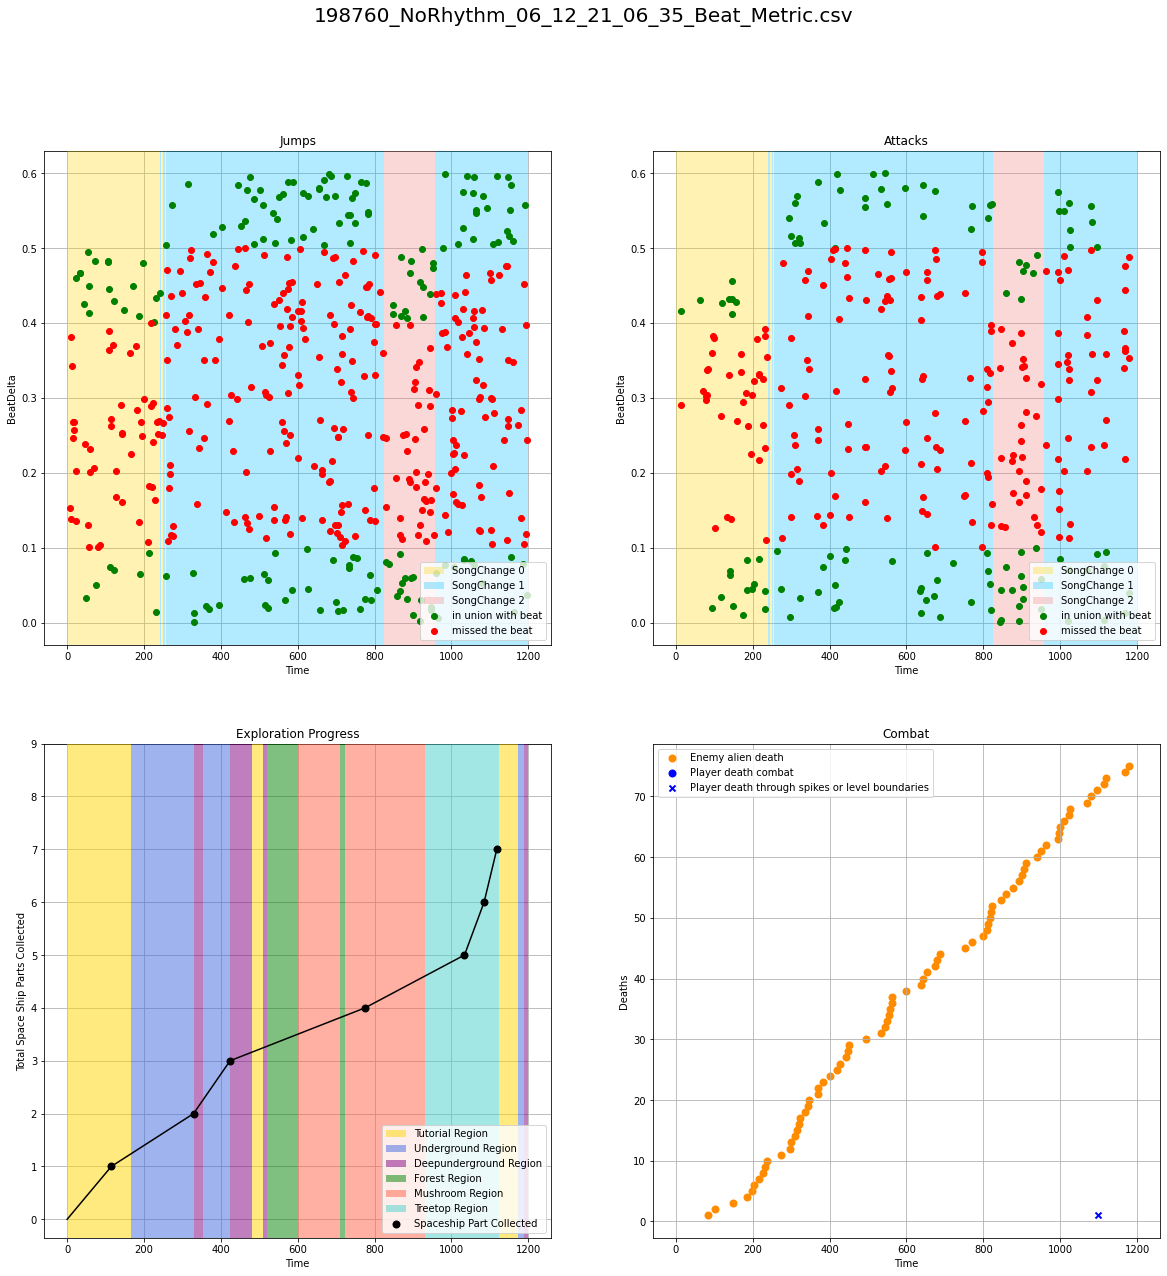

198760_RhythmControlled_06_12_21_07_06_Beat_Metric.csv 198760_RhythmControlled_06_12_21_07_06_Various_Metric.csv 198760_RhythmControlled_06_12_21_07_06_Combat_Metric.csv
time spent in songs: {'SongChange 0': 296, 'SongChange 1': 712, 'SongChange 2': 192}
Jumps hits: 197/427 = 46.14 %
Attacks hits: 168/312 = 53.85 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 12
time spent in regions: {'Tutorial': 131, 'Underground': 311, 'Deepunderground': 71, 'Forest': 133, 'Mushroom': 358, 'Treetop': 196, 'RedUnderground': 0, 'Spider': 0}


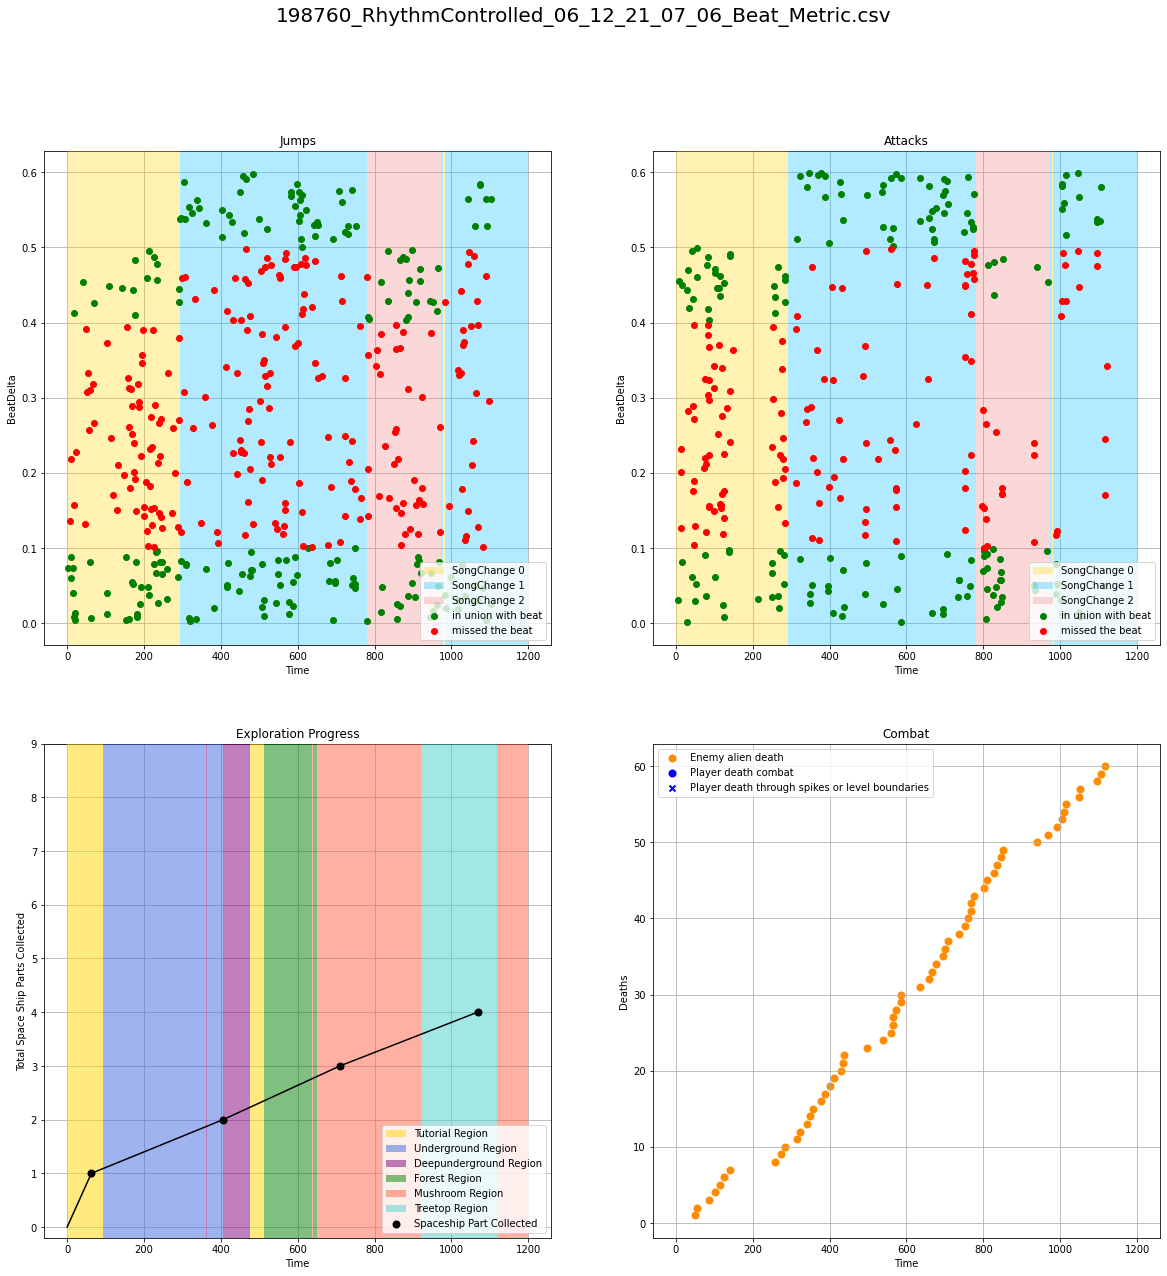

244206_NoRhythm_03_12_21_03_22_Beat_Metric.csv 244206_NoRhythm_03_12_21_03_22_Various_Metric.csv 244206_NoRhythm_03_12_21_03_22_Combat_Metric.csv
time spent in songs: {'SongChange 0': 197, 'SongChange 1': 397, 'SongChange 2': 606}
Jumps hits: 236/585 = 40.34 %
Attacks hits: 85/210 = 40.48 %
unique regions discovered: 9/8 = 112.5 %
total region changes: 23
time spent in regions: {'Tutorial': 107, 'Underground': 119, 'Deepunderground': 111, 'Forest': 142, 'Mushroom': 261, 'Treetop': 144, 'RedUnderground': 304, 'Spider': 12}


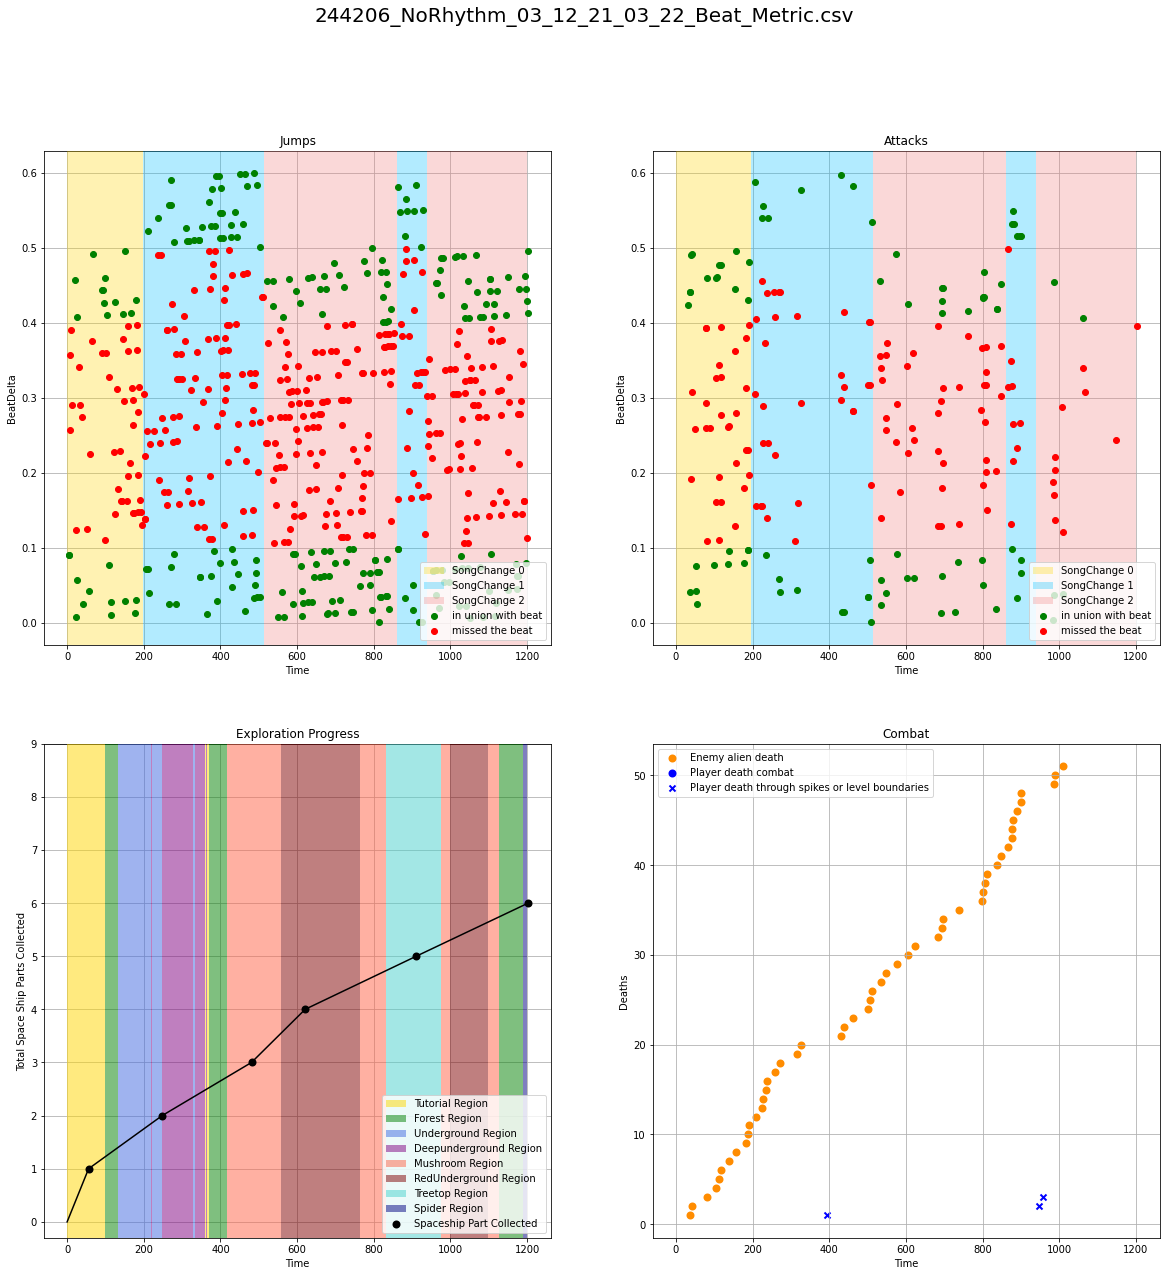

244206_RhythmControlled_03_12_21_03_50_Beat_Metric.csv 244206_RhythmControlled_03_12_21_03_50_Various_Metric.csv 244206_RhythmControlled_03_12_21_03_50_Combat_Metric.csv
time spent in songs: {'SongChange 0': 156, 'SongChange 1': 523, 'SongChange 2': 521}
Jumps hits: 439/590 = 74.41 %
Attacks hits: 106/171 = 61.99 %
unique regions discovered: 8/8 = 100.0 %
total region changes: 15
time spent in regions: {'Tutorial': 109, 'Underground': 89, 'Deepunderground': 172, 'Forest': 106, 'Mushroom': 538, 'Treetop': 12, 'RedUnderground': 174, 'Spider': 0}


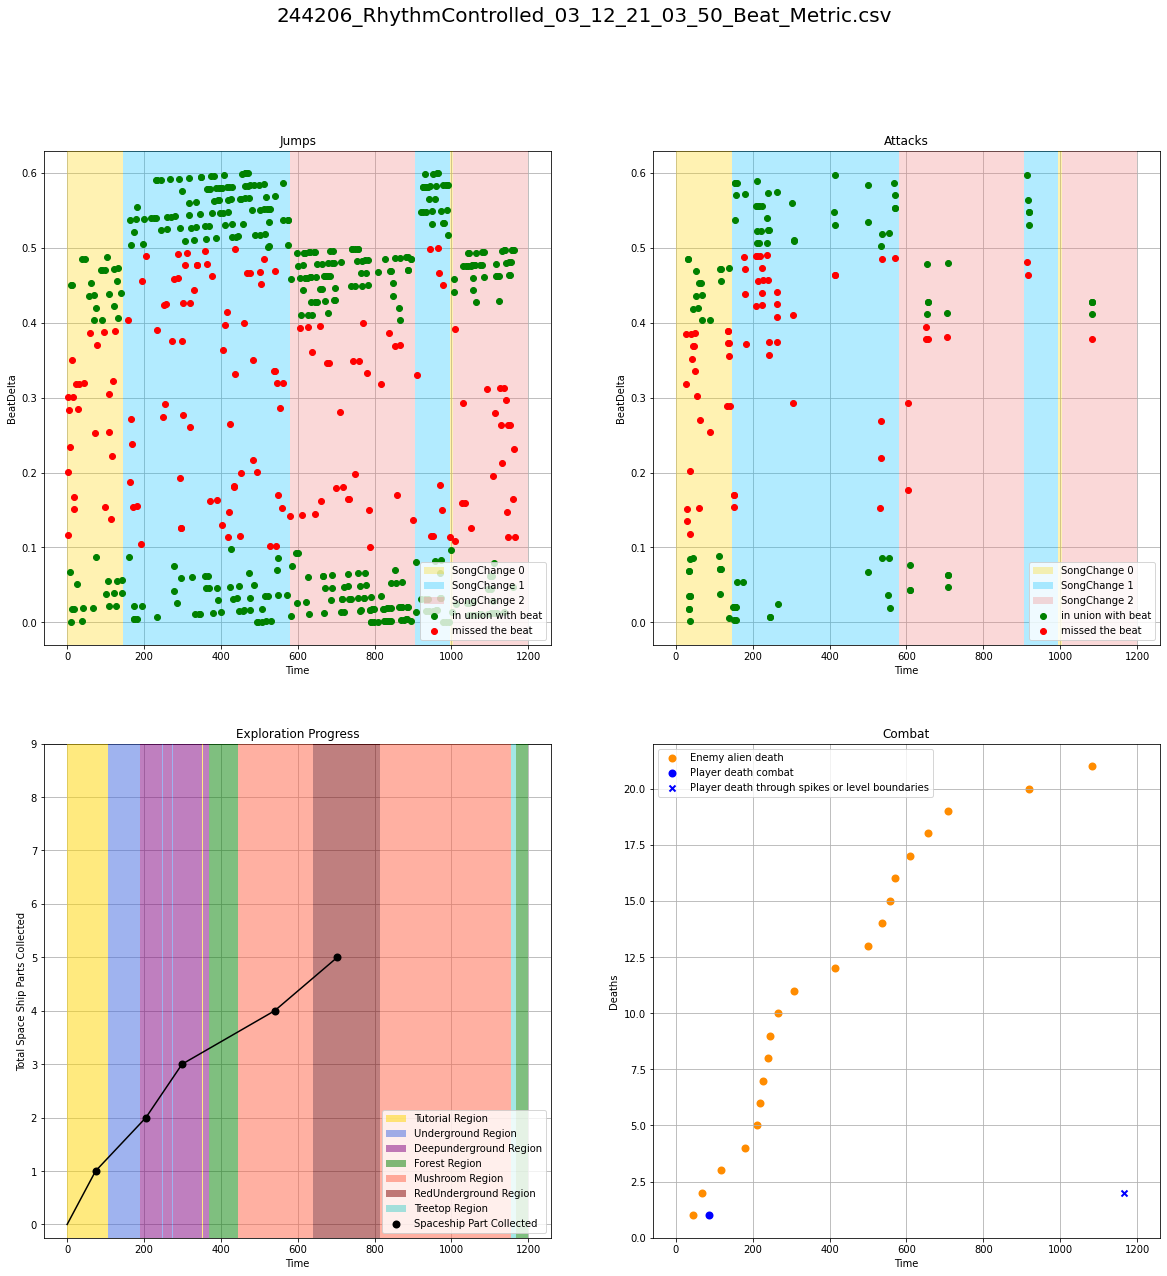

246229_NoRhythm_02_12_21_04_03_Beat_Metric.csv 246229_NoRhythm_02_12_21_04_03_Various_Metric.csv 246229_NoRhythm_02_12_21_04_03_Combat_Metric.csv
time spent in songs: {'SongChange 0': 392, 'SongChange 1': 462, 'SongChange 2': 346}
Jumps hits: 193/482 = 40.04 %
Attacks hits: 102/239 = 42.68 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 12
time spent in regions: {'Tutorial': 101, 'Underground': 340, 'Deepunderground': 243, 'Forest': 129, 'Mushroom': 289, 'Treetop': 98, 'RedUnderground': 0, 'Spider': 0}


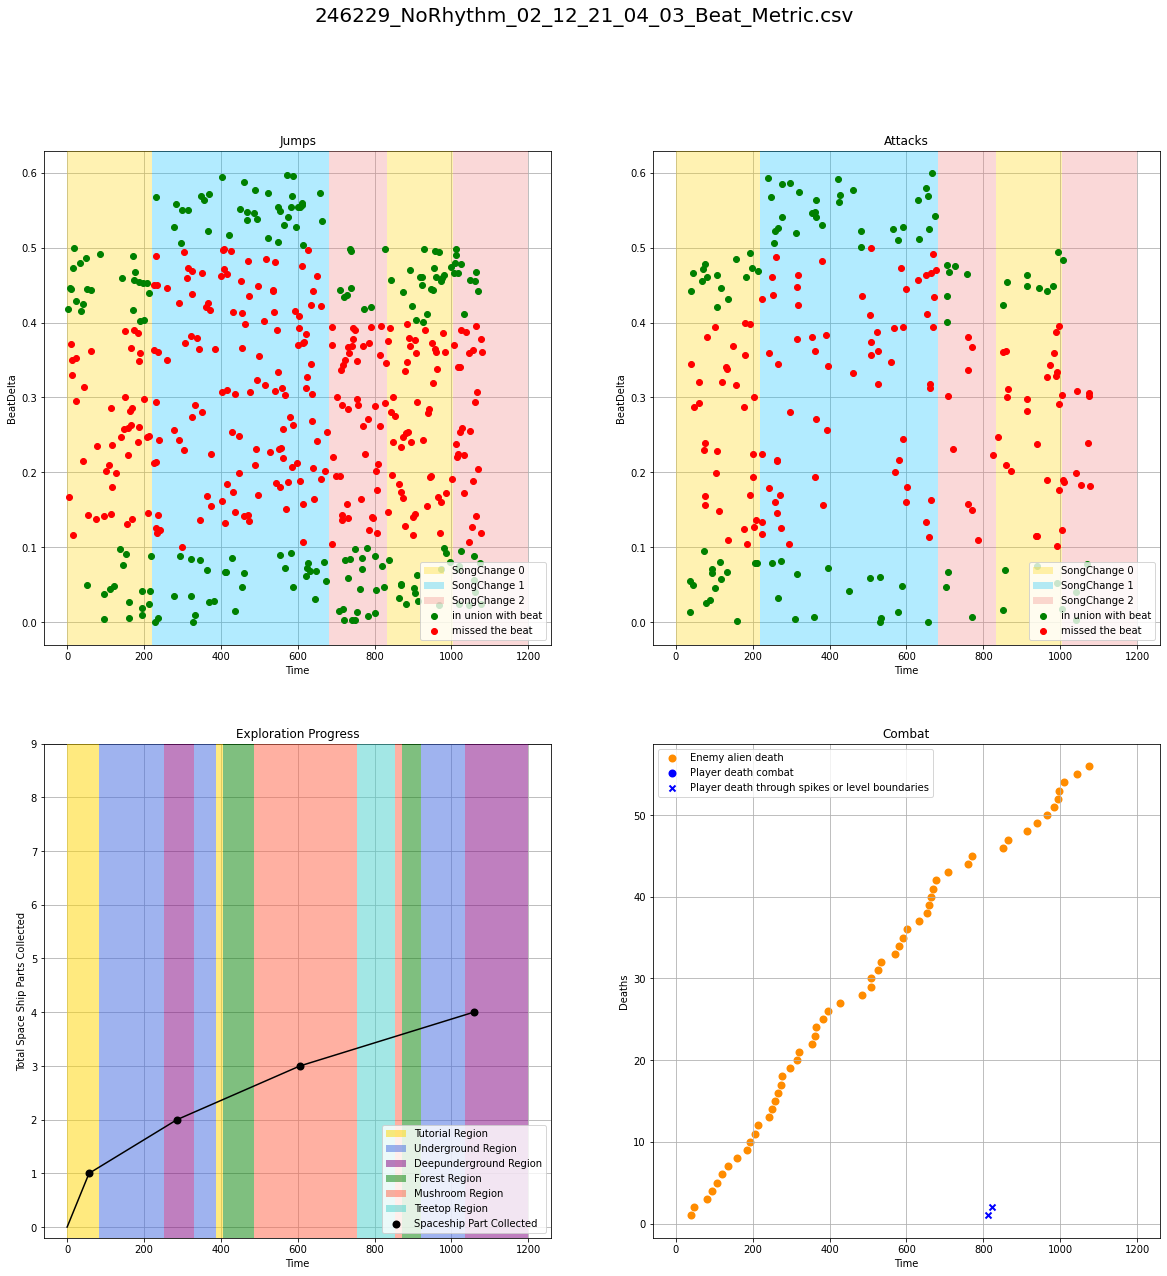

246229_RhythmControlled_02_12_21_04_30_Beat_Metric.csv 246229_RhythmControlled_02_12_21_04_30_Various_Metric.csv 246229_RhythmControlled_02_12_21_04_30_Combat_Metric.csv
time spent in songs: {'SongChange 0': 150, 'SongChange 1': 628, 'SongChange 2': 422}
Jumps hits: 243/632 = 38.45 %
Attacks hits: 135/263 = 51.33 %
unique regions discovered: 8/8 = 100.0 %
total region changes: 23
time spent in regions: {'Tutorial': 77, 'Underground': 196, 'Deepunderground': 104, 'Forest': 219, 'Mushroom': 359, 'Treetop': 63, 'RedUnderground': 182, 'Spider': 0}


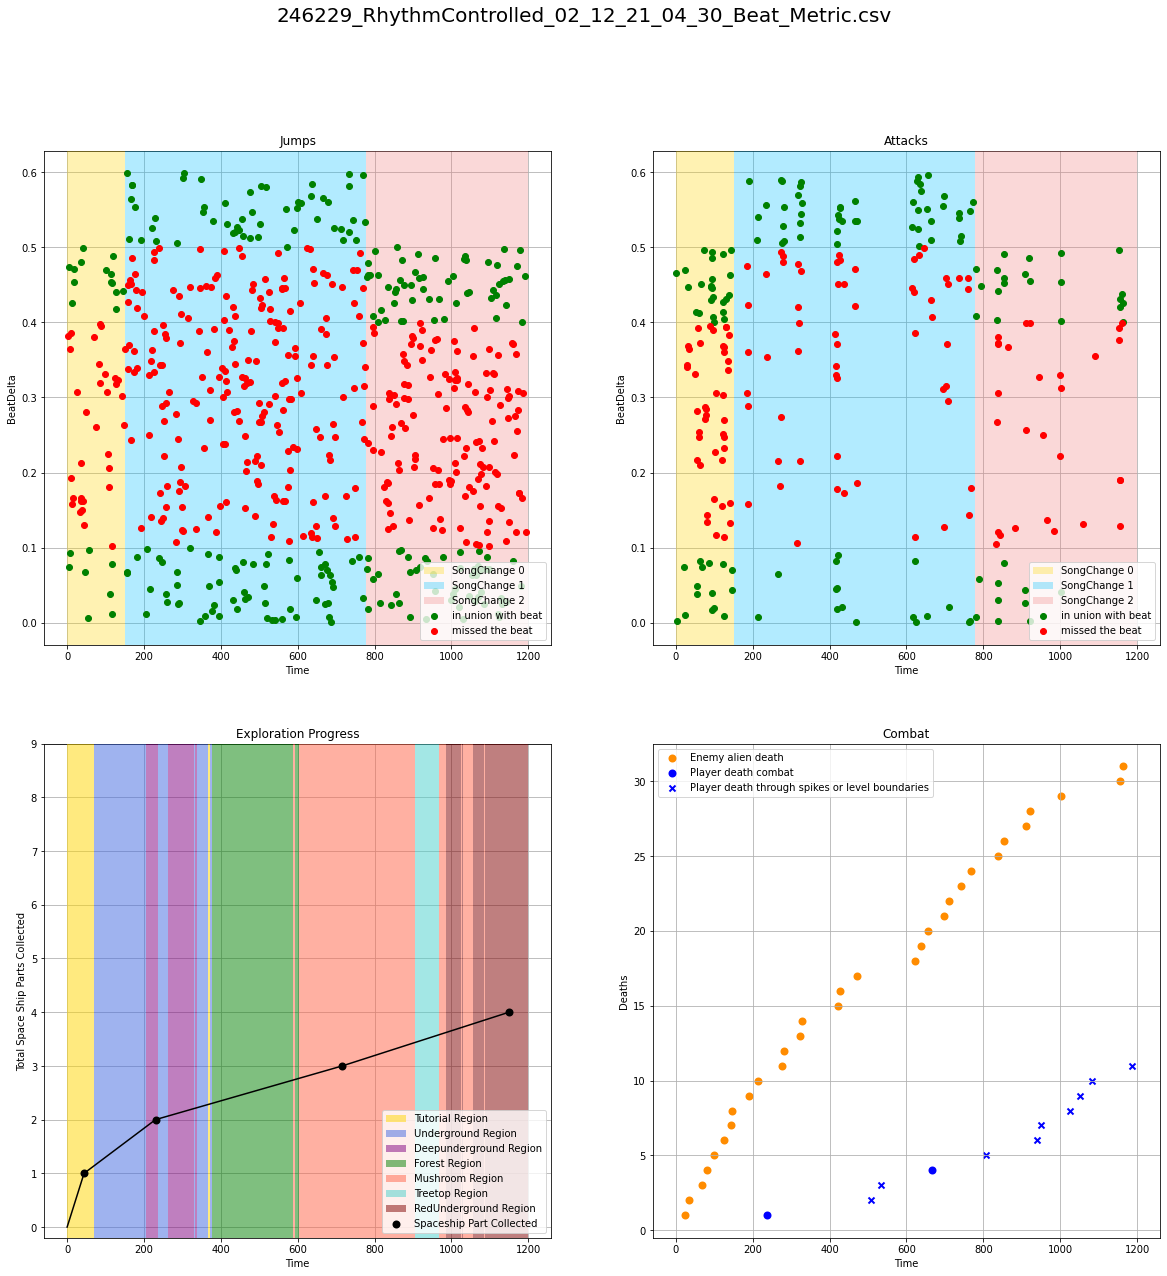

288786_NoRhythm_05_12_21_04_49_Beat_Metric.csv 288786_NoRhythm_05_12_21_04_49_Various_Metric.csv 288786_NoRhythm_05_12_21_04_49_Combat_Metric.csv
time spent in songs: {'SongChange 0': 429, 'SongChange 1': 383, 'SongChange 2': 388}
Jumps hits: 246/682 = 36.07 %
Attacks hits: 35/103 = 33.98 %
unique regions discovered: 9/8 = 112.5 %
total region changes: 33
time spent in regions: {'Tutorial': 75, 'Underground': 134, 'Deepunderground': 238, 'Forest': 128, 'Mushroom': 354, 'Treetop': 174, 'RedUnderground': 7, 'Spider': 90}


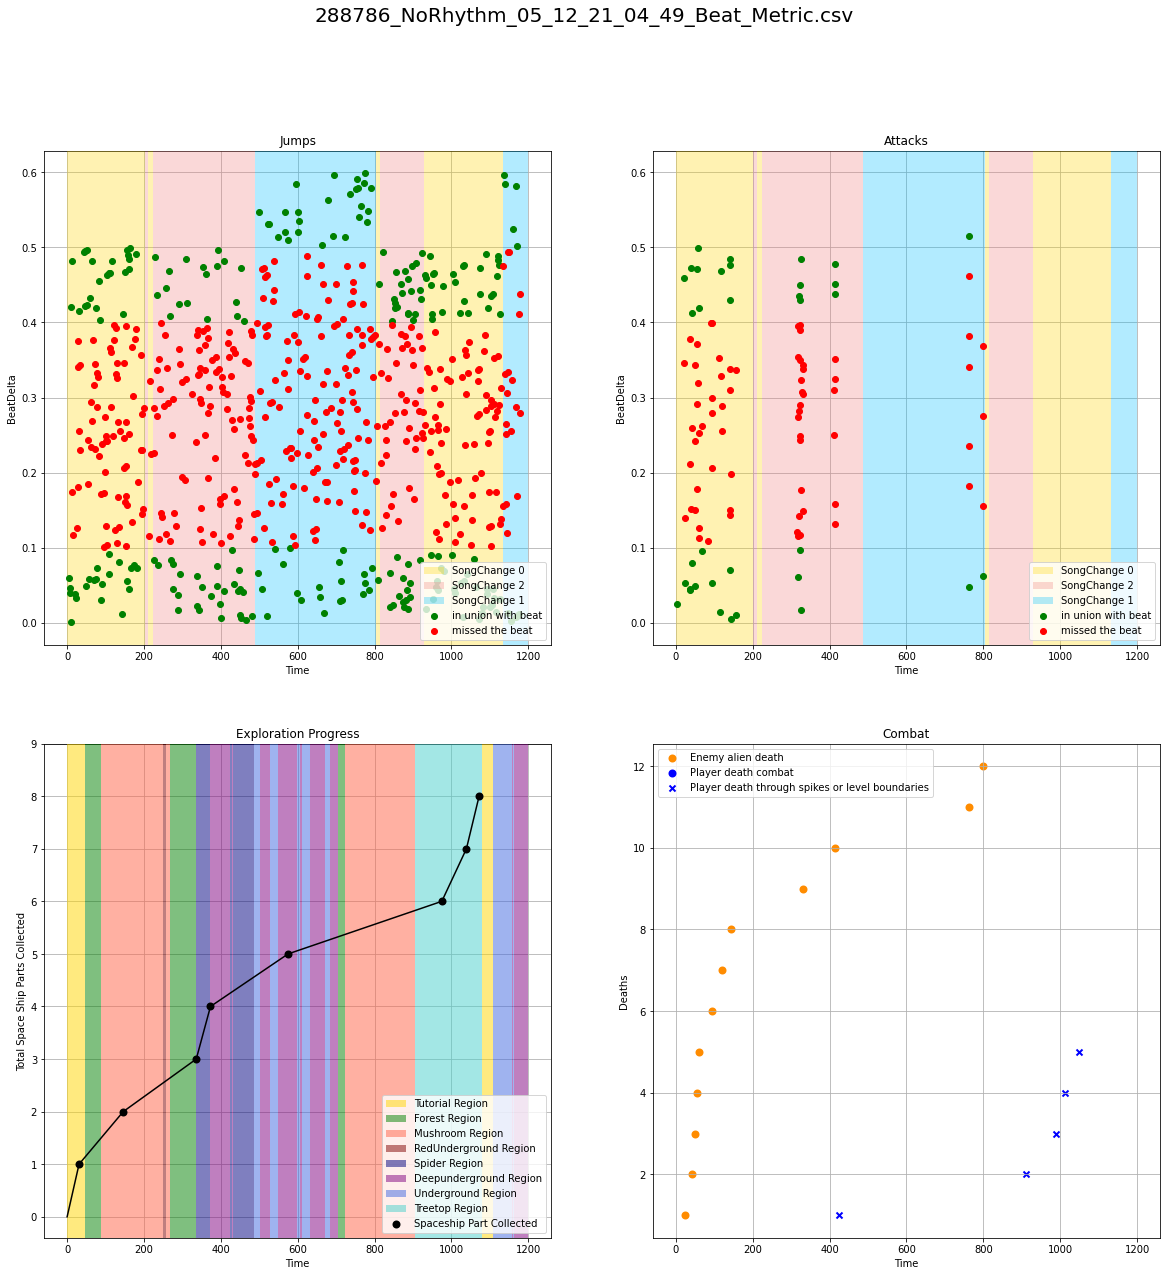

288786_RhythmControlled_05_12_21_04_21_Beat_Metric.csv 288786_RhythmControlled_05_12_21_04_21_Various_Metric.csv 288786_RhythmControlled_05_12_21_04_21_Combat_Metric.csv
time spent in songs: {'SongChange 0': 389, 'SongChange 1': 674, 'SongChange 2': 137}
Jumps hits: 184/442 = 41.63 %
Attacks hits: 196/531 = 36.91 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 16
time spent in regions: {'Tutorial': 169, 'Underground': 322, 'Deepunderground': 216, 'Forest': 148, 'Mushroom': 246, 'Treetop': 99, 'RedUnderground': 0, 'Spider': 0}


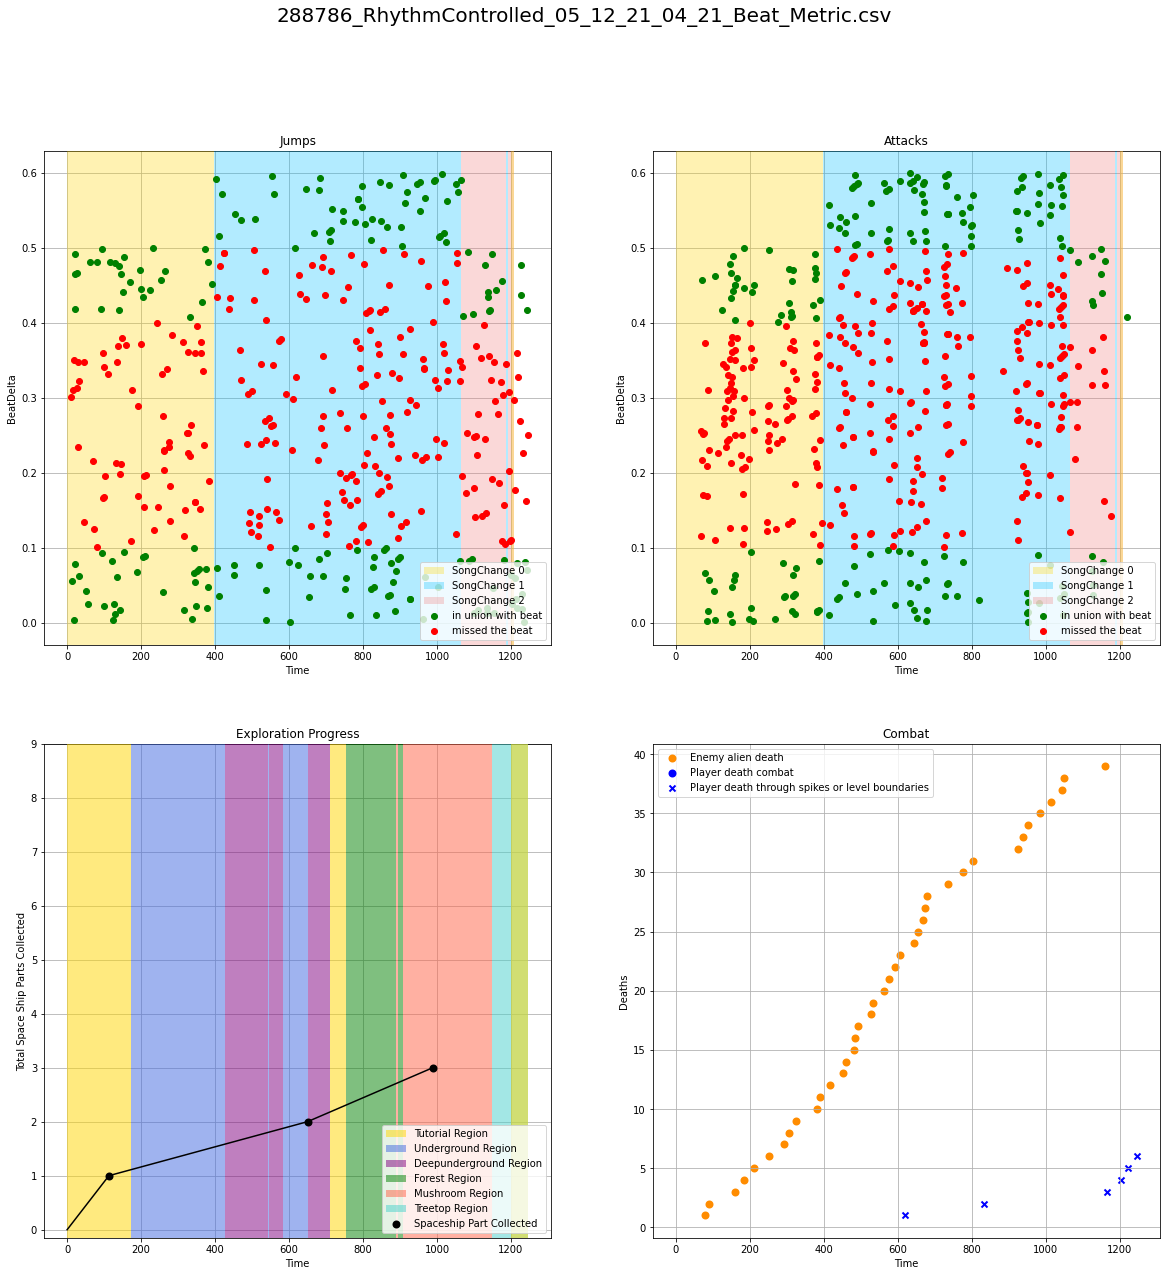

353252_NoRhythm_05_12_21_04_39_Beat_Metric.csv 353252_NoRhythm_05_12_21_04_39_Various_Metric.csv 353252_NoRhythm_05_12_21_04_39_Combat_Metric.csv
time spent in songs: {'SongChange 0': 693, 'SongChange 1': 280, 'SongChange 2': 227}
Jumps hits: 325/825 = 39.39 %
Attacks hits: 36/91 = 39.56 %
unique regions discovered: 8/8 = 100.0 %
total region changes: 20
time spent in regions: {'Tutorial': 40, 'Underground': 79, 'Deepunderground': 83, 'Forest': 104, 'Mushroom': 673, 'Treetop': 333, 'RedUnderground': -112, 'Spider': 0}


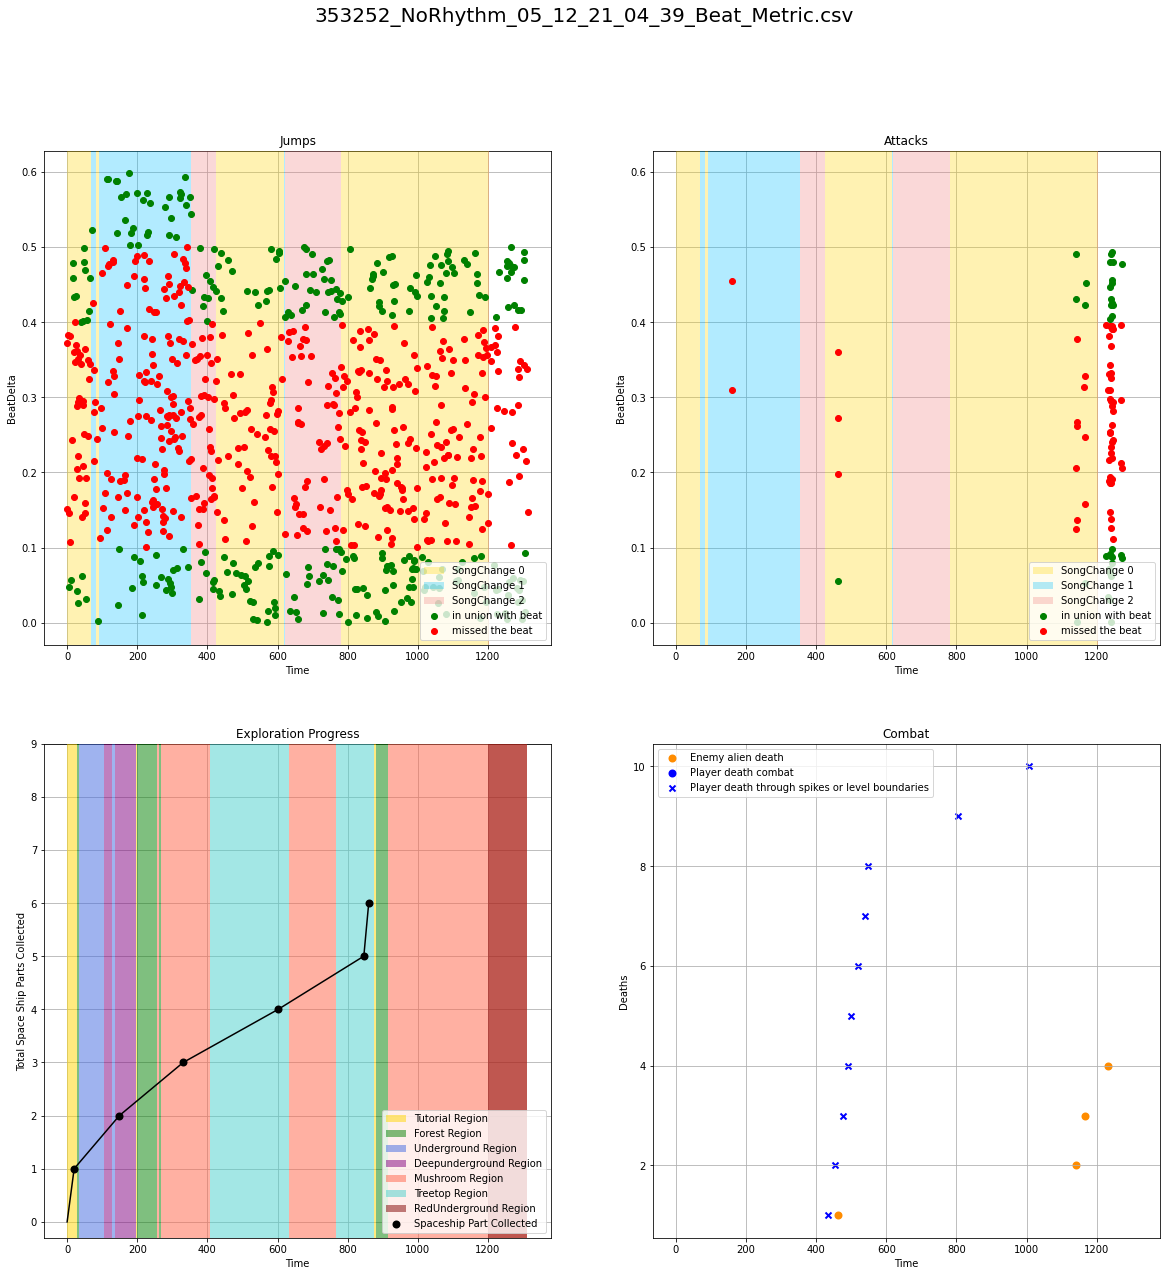

353252_RhythmControlled_05_12_21_04_13_Beat_Metric.csv 353252_RhythmControlled_05_12_21_04_13_Various_Metric.csv 353252_RhythmControlled_05_12_21_04_13_Combat_Metric.csv
time spent in songs: {'SongChange 0': 809, 'SongChange 1': 0, 'SongChange 2': 391}
Jumps hits: 346/575 = 60.17 %
Attacks hits: 86/136 = 63.24 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 12
time spent in regions: {'Tutorial': 127, 'Underground': -37, 'Deepunderground': 0, 'Forest': 101, 'Mushroom': 458, 'Treetop': 405, 'RedUnderground': 146, 'Spider': 0}


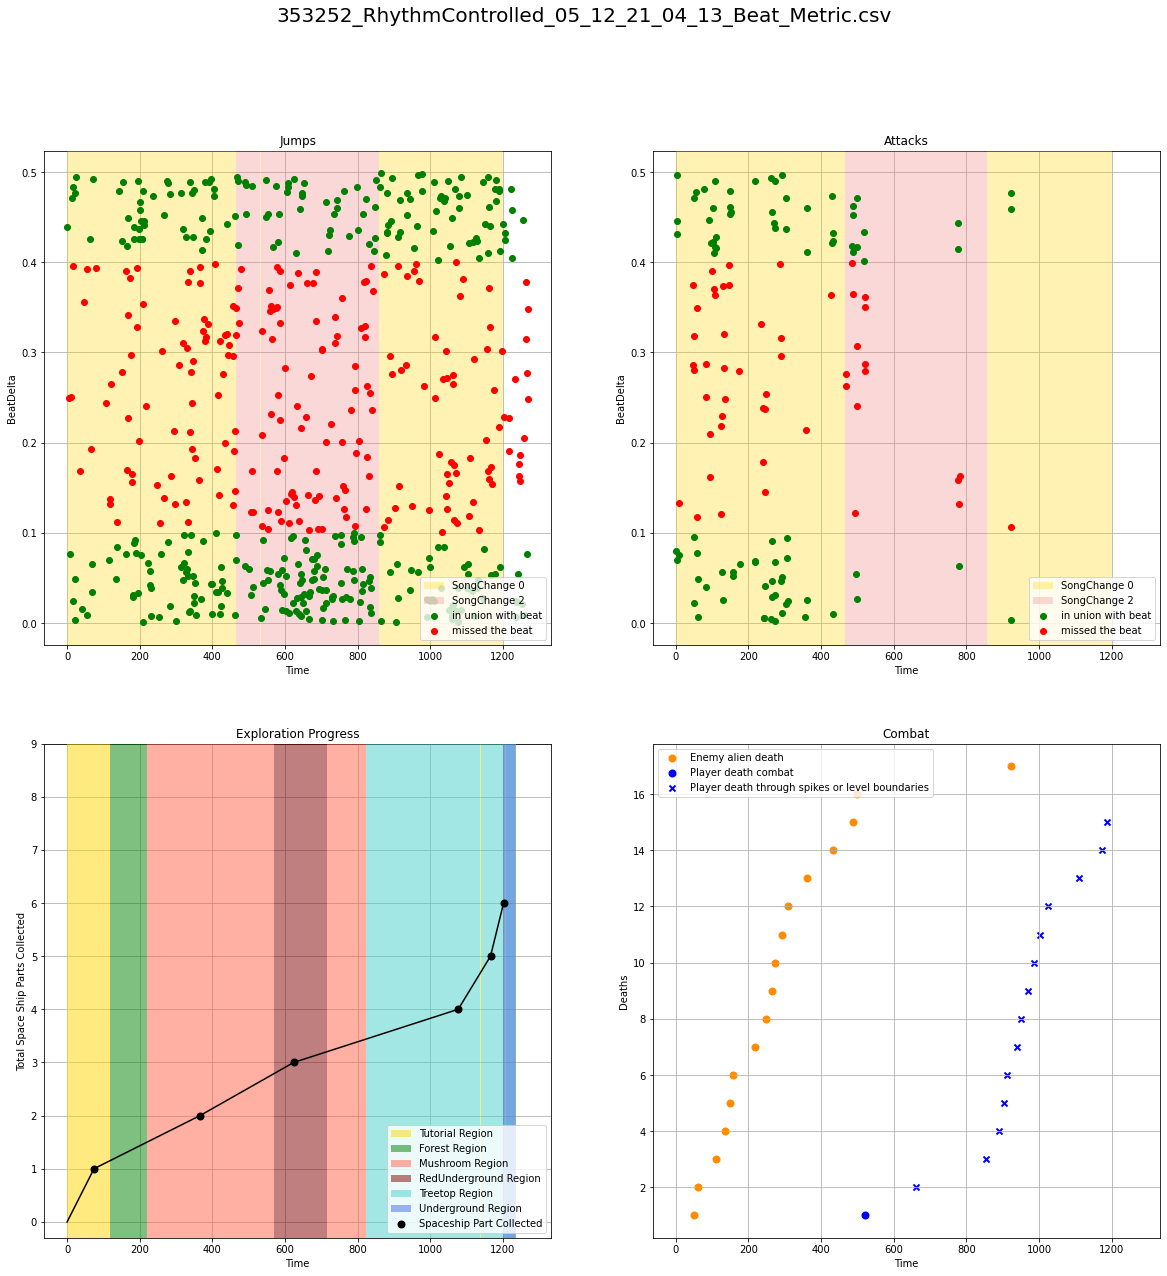

427217_NoRhythm_04_12_21_01_09_Beat_Metric.csv 427217_NoRhythm_04_12_21_01_09_Various_Metric.csv 427217_NoRhythm_04_12_21_01_09_Combat_Metric.csv
time spent in songs: {'SongChange 0': 577, 'SongChange 1': 0, 'SongChange 2': 623}
Jumps hits: 165/452 = 36.5 %
Attacks hits: 71/231 = 30.74 %
unique regions discovered: 6/8 = 75.0 %
total region changes: 10
time spent in regions: {'Tutorial': 130, 'Underground': 0, 'Deepunderground': 0, 'Forest': 126, 'Mushroom': 389, 'Treetop': 212, 'RedUnderground': 343, 'Spider': 0}


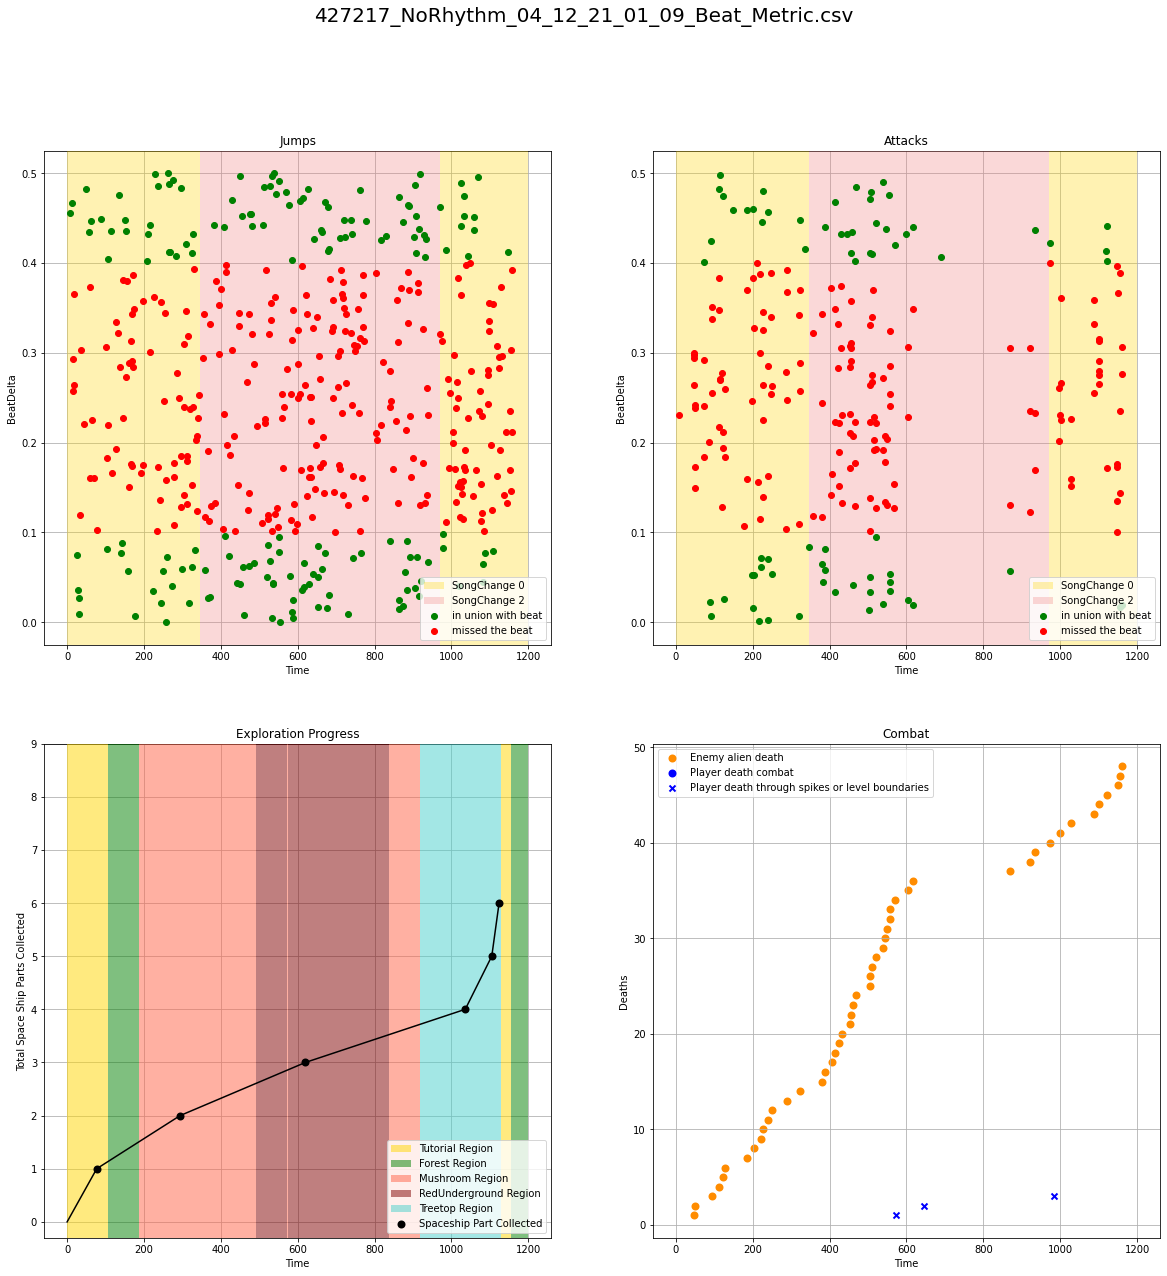

427217_RhythmControlled_04_12_21_02_02_Beat_Metric.csv 427217_RhythmControlled_04_12_21_02_02_Various_Metric.csv 427217_RhythmControlled_04_12_21_02_02_Combat_Metric.csv
time spent in songs: {'SongChange 0': 223, 'SongChange 1': 568, 'SongChange 2': 409}
Jumps hits: 155/373 = 41.55 %
Attacks hits: 156/351 = 44.44 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 19
time spent in regions: {'Tutorial': 135, 'Underground': 220, 'Deepunderground': 19, 'Forest': 155, 'Mushroom': 375, 'Treetop': 0, 'RedUnderground': 296, 'Spider': 0}


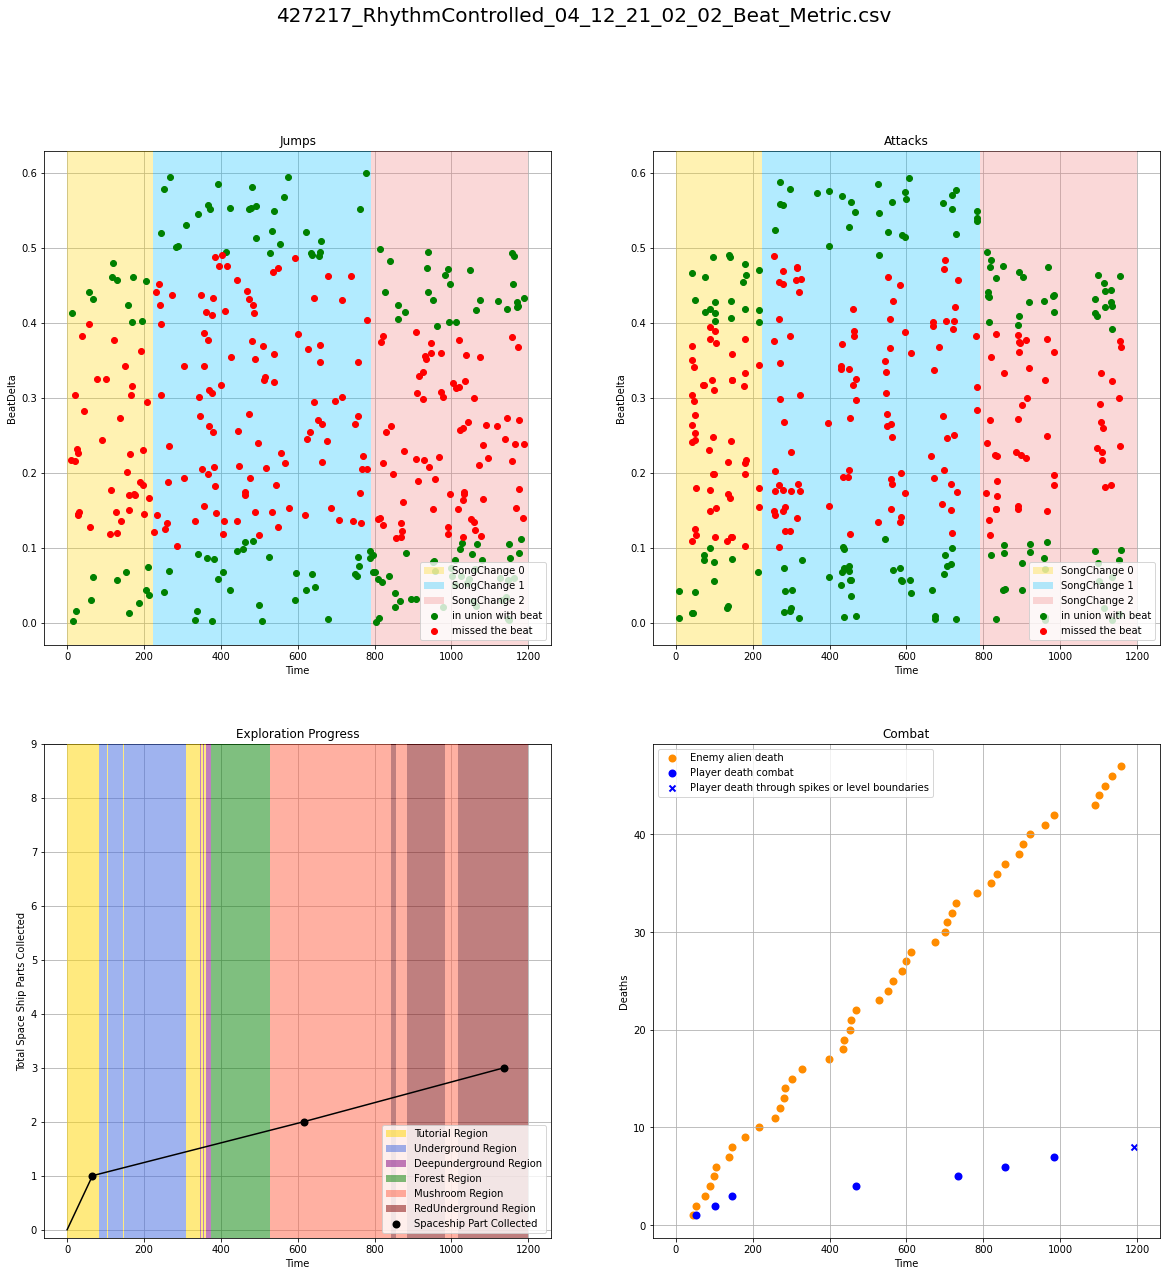

452042_NoRhythm_01_12_21_12_47_Beat_Metric.csv 452042_NoRhythm_01_12_21_12_47_Various_Metric.csv 452042_NoRhythm_01_12_21_12_47_Combat_Metric.csv
time spent in songs: {'SongChange 0': 267, 'SongChange 1': 0, 'SongChange 2': 933}
Jumps hits: 269/618 = 43.53 %
Attacks hits: 150/360 = 41.67 %
unique regions discovered: 6/8 = 75.0 %
total region changes: 18
time spent in regions: {'Tutorial': 132, 'Underground': 0, 'Deepunderground': 0, 'Forest': 128, 'Mushroom': 532, 'Treetop': 55, 'RedUnderground': 353, 'Spider': 0}


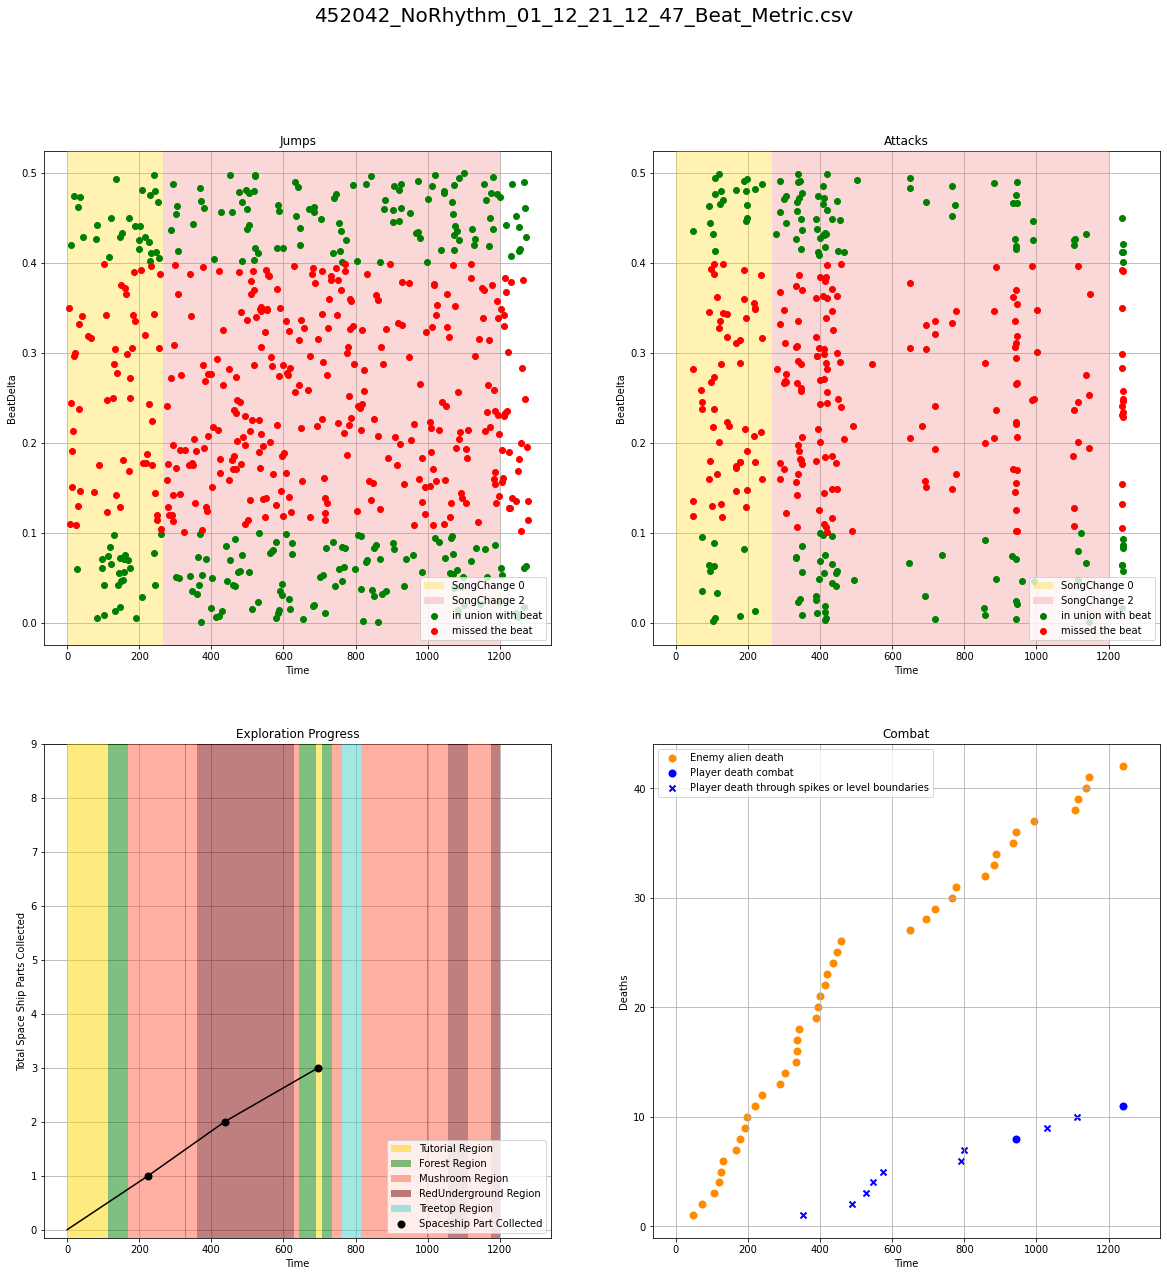

452042_RhythmControlled_01_12_21_01_19_Beat_Metric.csv 452042_RhythmControlled_01_12_21_01_19_Various_Metric.csv 452042_RhythmControlled_01_12_21_01_19_Combat_Metric.csv
time spent in songs: {'SongChange 0': 365, 'SongChange 1': 0, 'SongChange 2': 835}
Jumps hits: 310/526 = 58.94 %
Attacks hits: 108/232 = 46.55 %
unique regions discovered: 6/8 = 75.0 %
total region changes: 10
time spent in regions: {'Tutorial': 70, 'Underground': 0, 'Deepunderground': 0, 'Forest': 72, 'Mushroom': 396, 'Treetop': 158, 'RedUnderground': 504, 'Spider': 0}


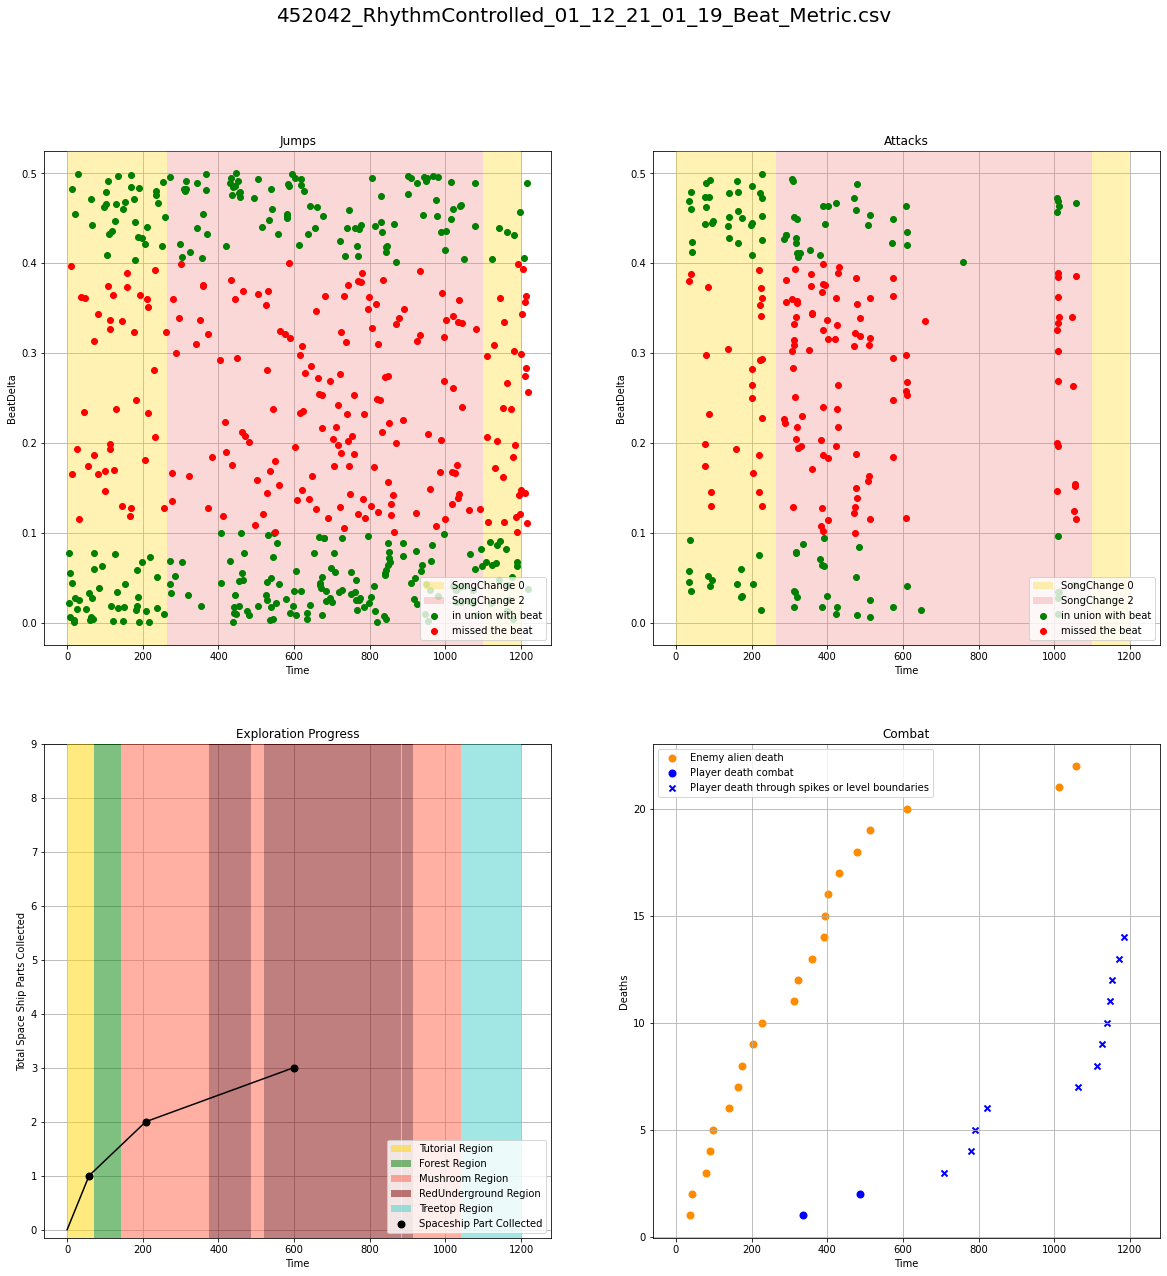

481091_NoRhythm_04_12_21_07_41_Beat_Metric.csv 481091_NoRhythm_04_12_21_07_41_Various_Metric.csv 481091_NoRhythm_04_12_21_07_41_Combat_Metric.csv
time spent in songs: {'SongChange 0': 616, 'SongChange 1': 474, 'SongChange 2': 110}
Jumps hits: 194/497 = 39.03 %
Attacks hits: 81/222 = 36.49 %
unique regions discovered: 6/8 = 75.0 %
total region changes: 25
time spent in regions: {'Tutorial': 131, 'Underground': 161, 'Deepunderground': 0, 'Forest': 222, 'Mushroom': 448, 'Treetop': 238, 'RedUnderground': 0, 'Spider': 0}


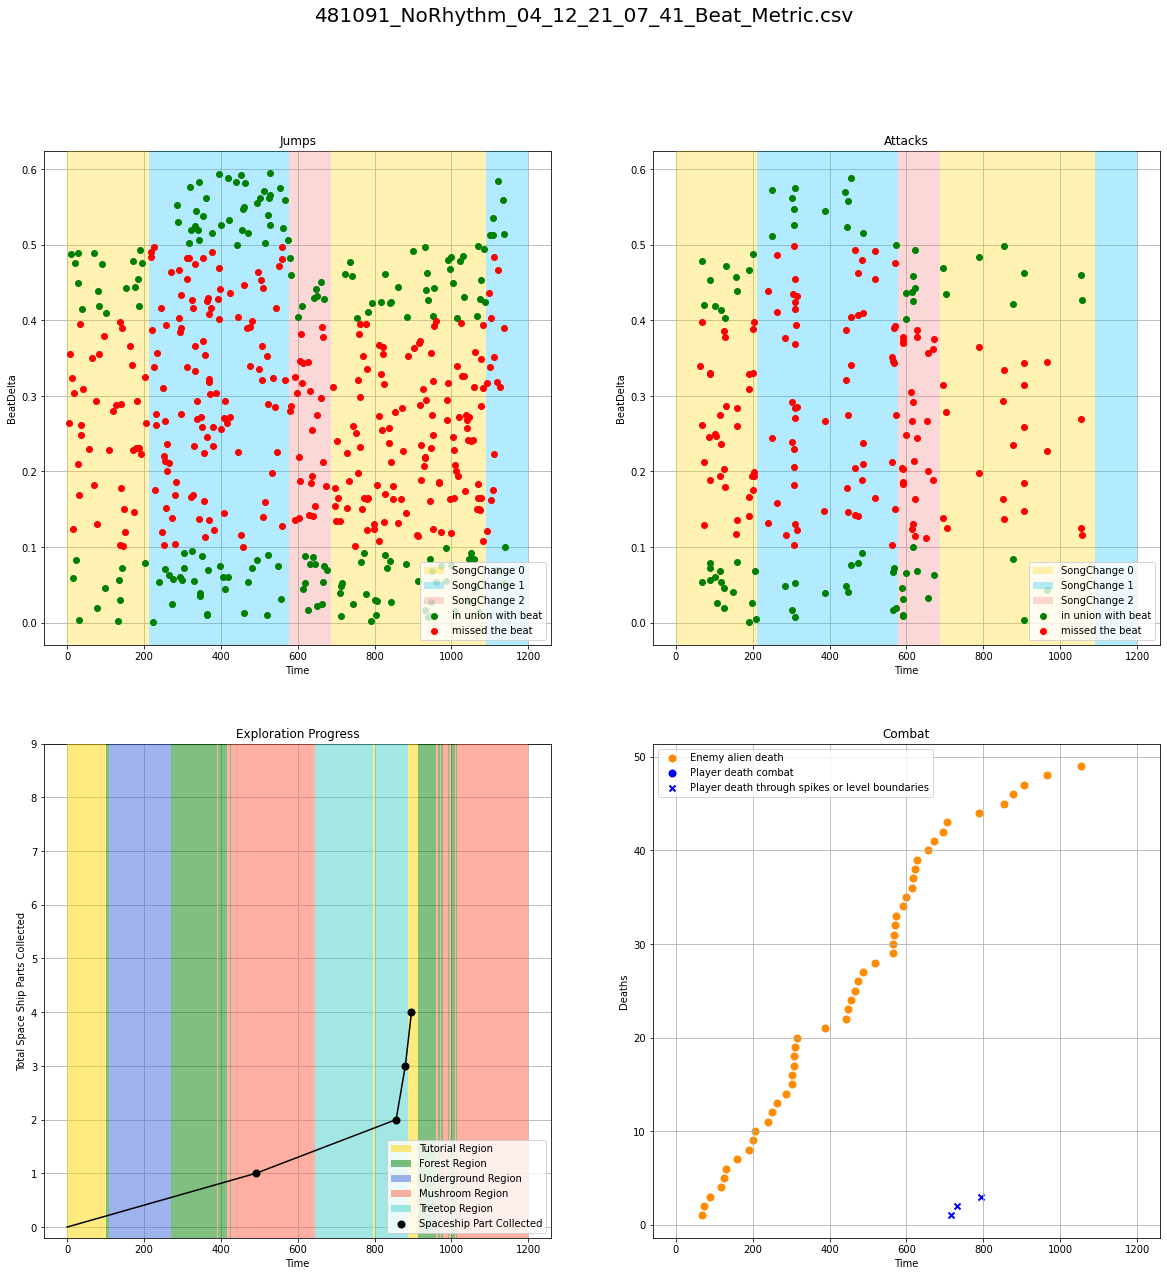

481091_RhythmControlled_04_12_21_08_10_Beat_Metric.csv 481091_RhythmControlled_04_12_21_08_10_Various_Metric.csv 481091_RhythmControlled_04_12_21_08_10_Combat_Metric.csv
time spent in songs: {'SongChange 0': 496, 'SongChange 1': 0, 'SongChange 2': 704}
Jumps hits: 395/560 = 70.54 %
Attacks hits: 110/167 = 65.87 %
unique regions discovered: 8/8 = 100.0 %
total region changes: 27
time spent in regions: {'Tutorial': 160, 'Underground': 23, 'Deepunderground': 63, 'Forest': 194, 'Mushroom': 469, 'Treetop': 216, 'RedUnderground': 75, 'Spider': 0}


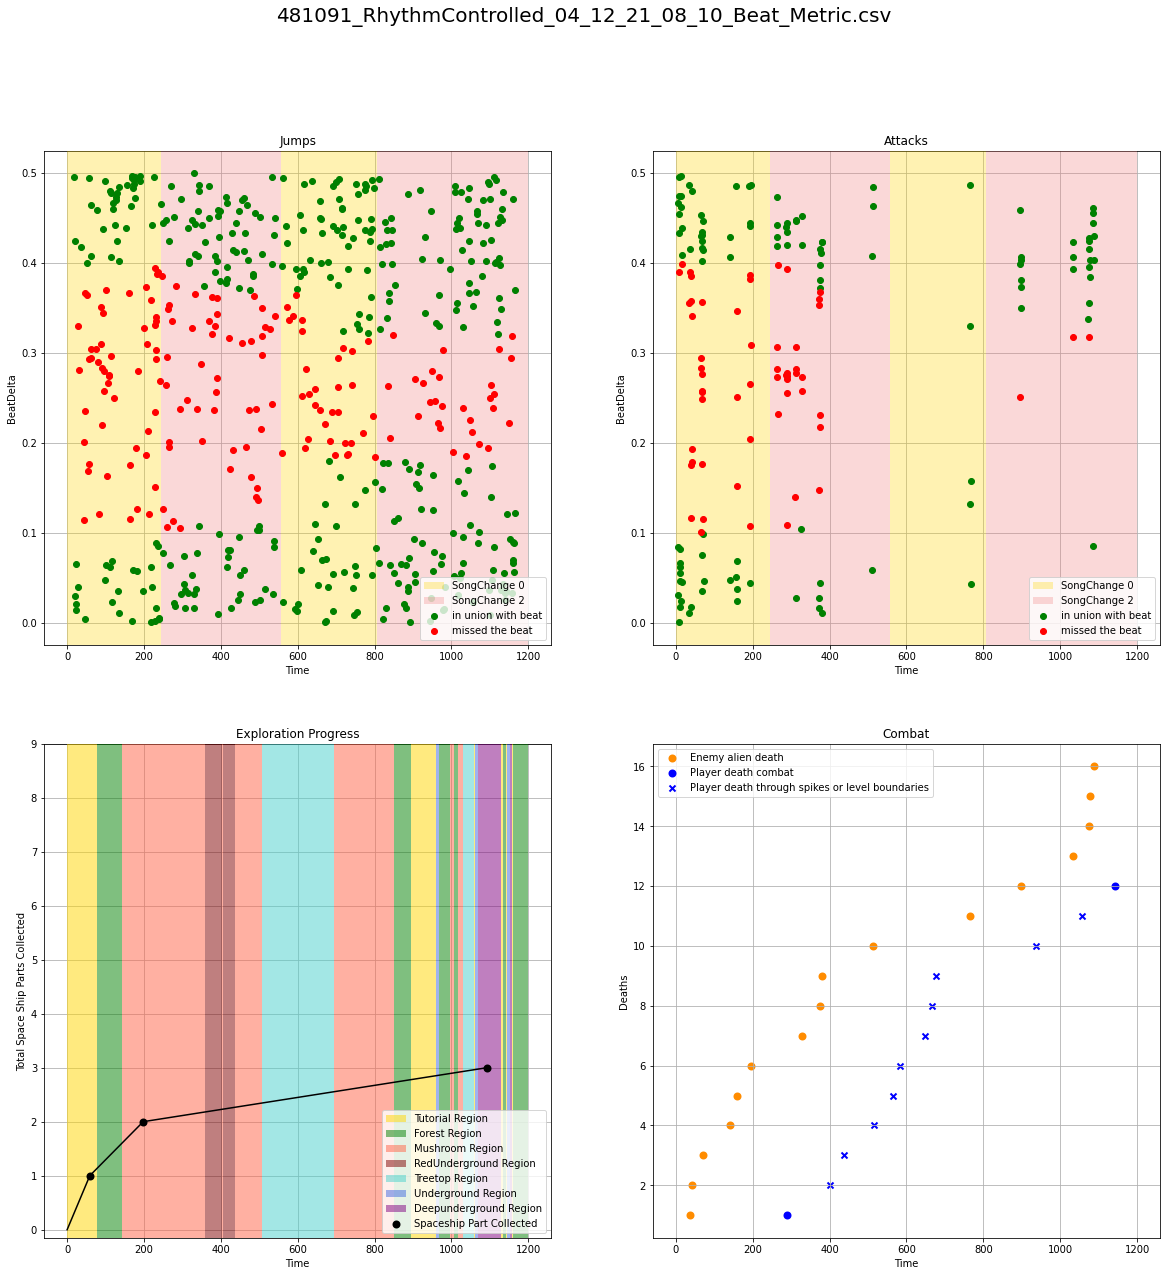

527704_NoRhythm_30_11_21_10_40_Beat_Metric.csv 527704_NoRhythm_30_11_21_10_40_Various_Metric.csv 527704_NoRhythm_30_11_21_10_40_Combat_Metric.csv
time spent in songs: {'SongChange 0': 555, 'SongChange 1': 565, 'SongChange 2': 80}
Jumps hits: 251/624 = 40.22 %
Attacks hits: 28/86 = 32.56 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 28
time spent in regions: {'Tutorial': 150, 'Underground': 174, 'Deepunderground': 224, 'Forest': 160, 'Mushroom': 294, 'Treetop': 198, 'RedUnderground': 0, 'Spider': 0}


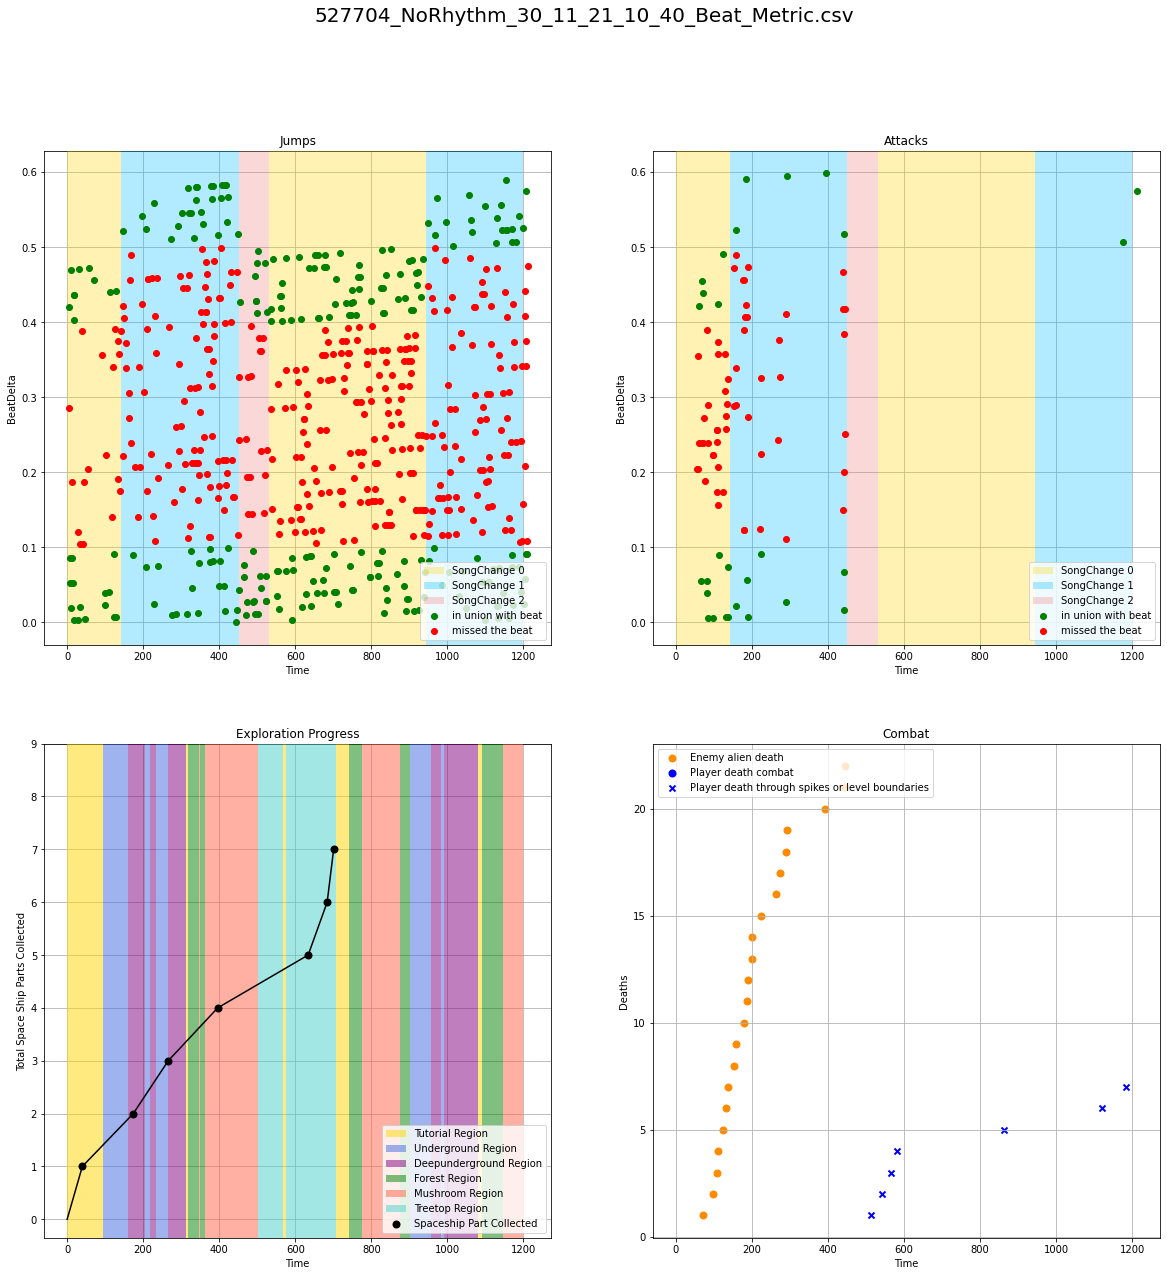

527704_RhythmControlled_30_11_21_10_11_Beat_Metric.csv 527704_RhythmControlled_30_11_21_10_11_Various_Metric.csv 527704_RhythmControlled_30_11_21_10_11_Combat_Metric.csv
time spent in songs: {'SongChange 0': 273, 'SongChange 1': 433, 'SongChange 2': 494}
Jumps hits: 239/467 = 51.18 %
Attacks hits: 77/180 = 42.78 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 17
time spent in regions: {'Tutorial': 184, 'Underground': 146, 'Deepunderground': 9, 'Forest': 141, 'Mushroom': 347, 'Treetop': 0, 'RedUnderground': 373, 'Spider': 0}


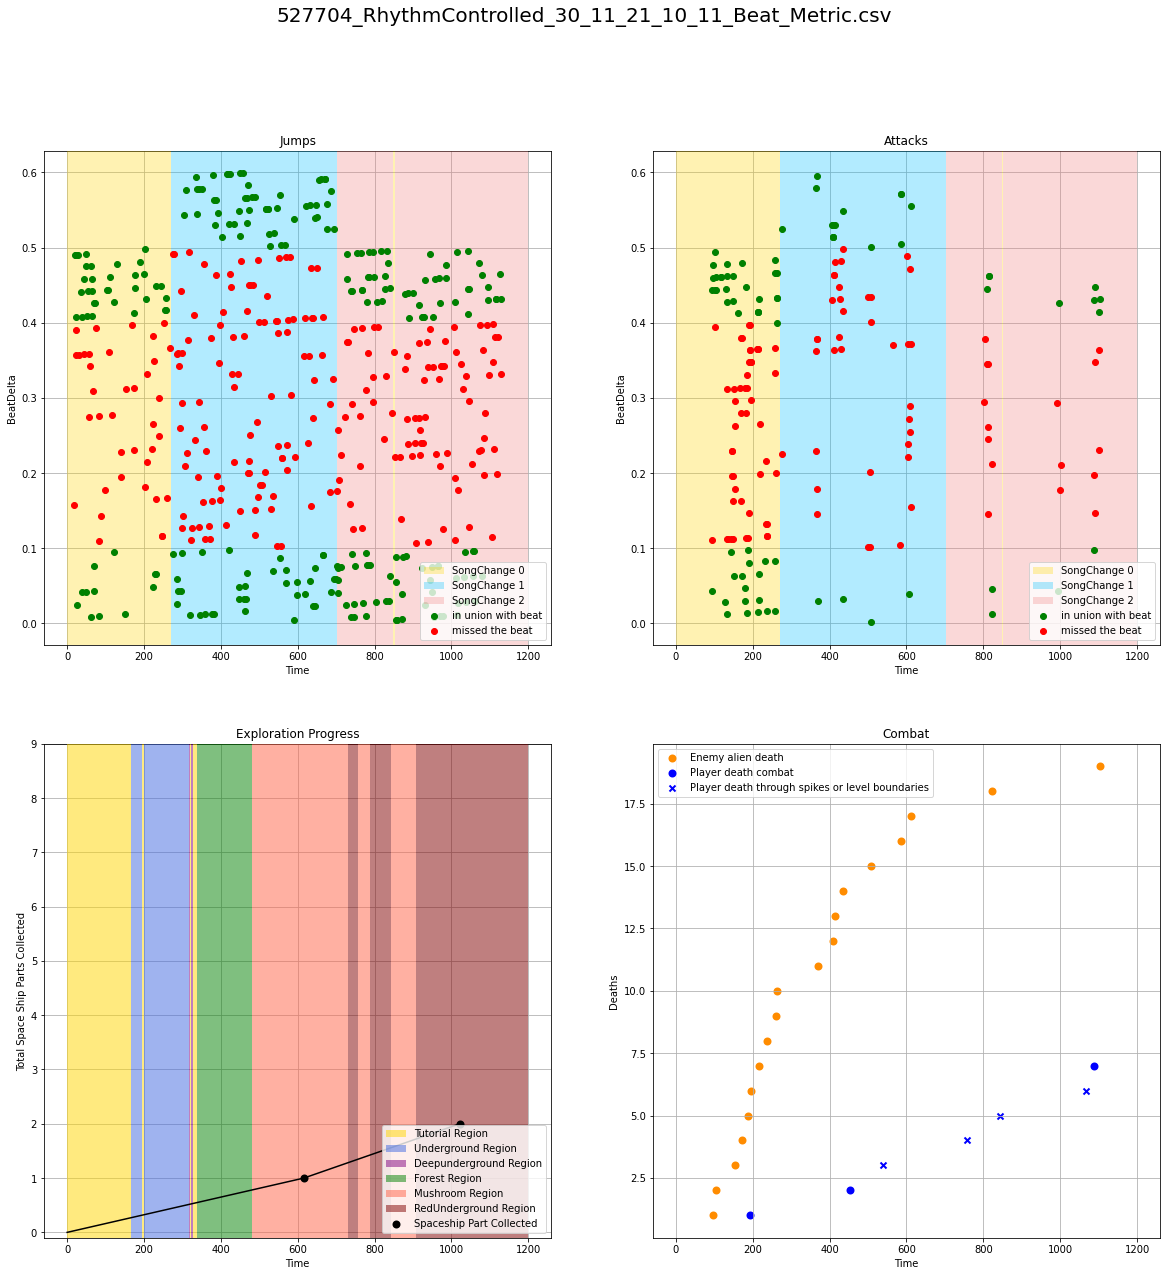

562408_NoRhythm_14_12_21_05_12_Beat_Metric.csv 562408_NoRhythm_14_12_21_05_12_Various_Metric.csv 562408_NoRhythm_14_12_21_05_12_Combat_Metric.csv
time spent in songs: {'SongChange 0': 368, 'SongChange 1': 0, 'SongChange 2': 832}
Jumps hits: 128/317 = 40.38 %
Attacks hits: 27/76 = 35.53 %
unique regions discovered: 5/8 = 62.5 %
total region changes: 13
time spent in regions: {'Tutorial': 120, 'Underground': 0, 'Deepunderground': 0, 'Forest': 129, 'Mushroom': 905, 'Treetop': 0, 'RedUnderground': 46, 'Spider': 0}


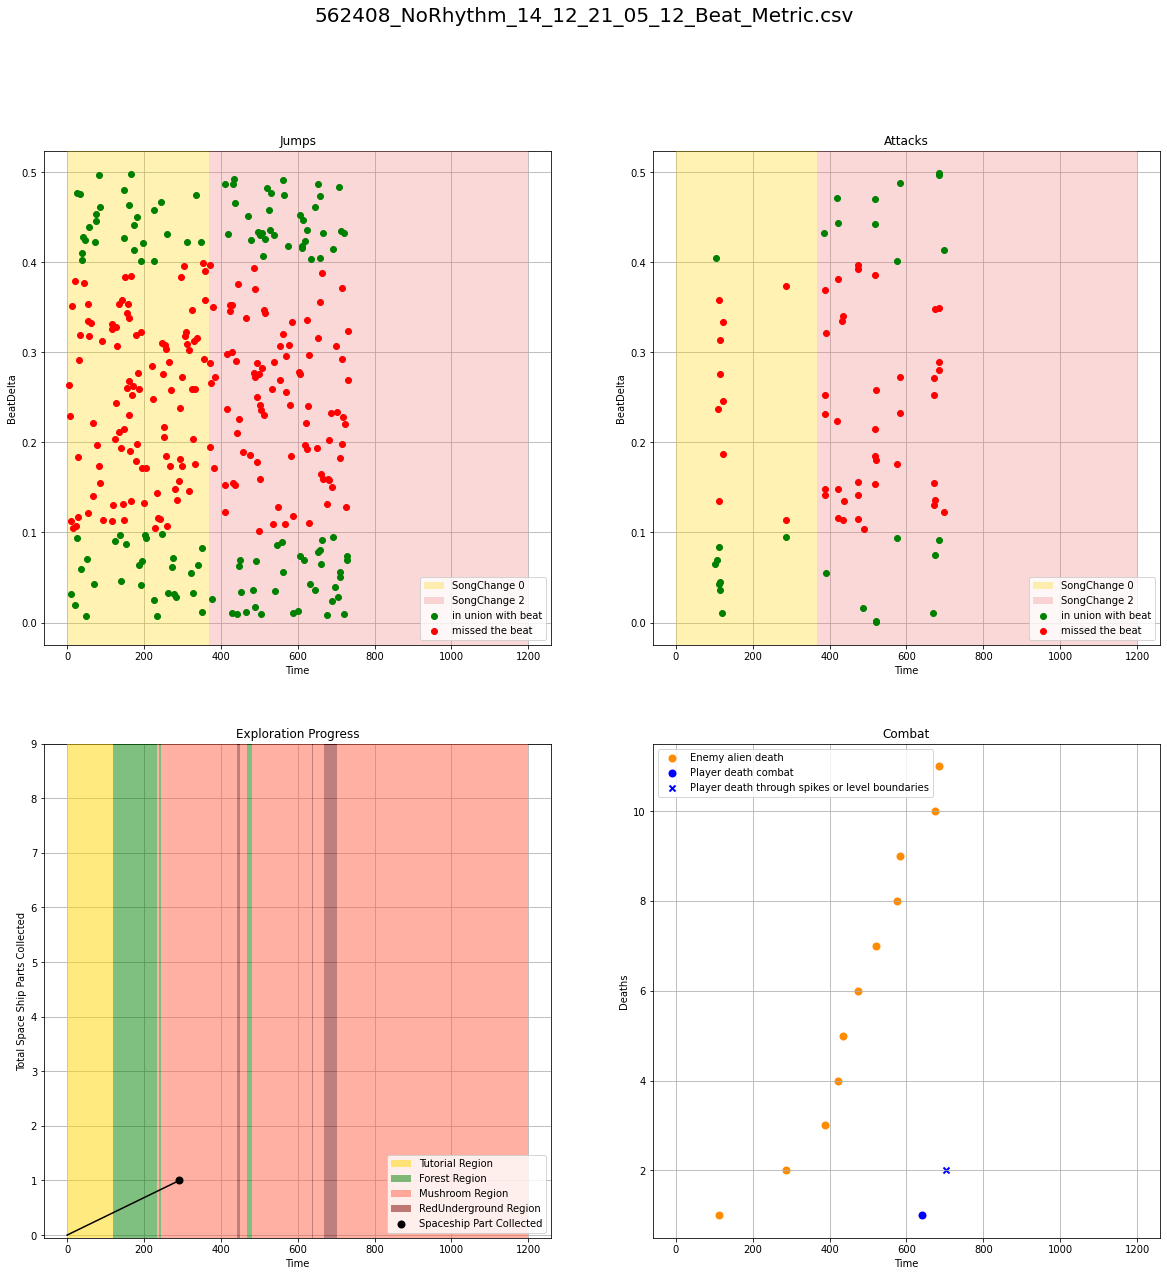

562408_RhythmControlled_14_12_21_05_32_Beat_Metric.csv 562408_RhythmControlled_14_12_21_05_32_Various_Metric.csv 562408_RhythmControlled_14_12_21_05_32_Combat_Metric.csv
time spent in songs: {'SongChange 0': 778, 'SongChange 1': 0, 'SongChange 2': 422}
Jumps hits: 189/437 = 43.25 %
Attacks hits: 66/140 = 47.14 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 19
time spent in regions: {'Tutorial': 91, 'Underground': 16, 'Deepunderground': 0, 'Forest': 43, 'Mushroom': 684, 'Treetop': 211, 'RedUnderground': 155, 'Spider': 0}


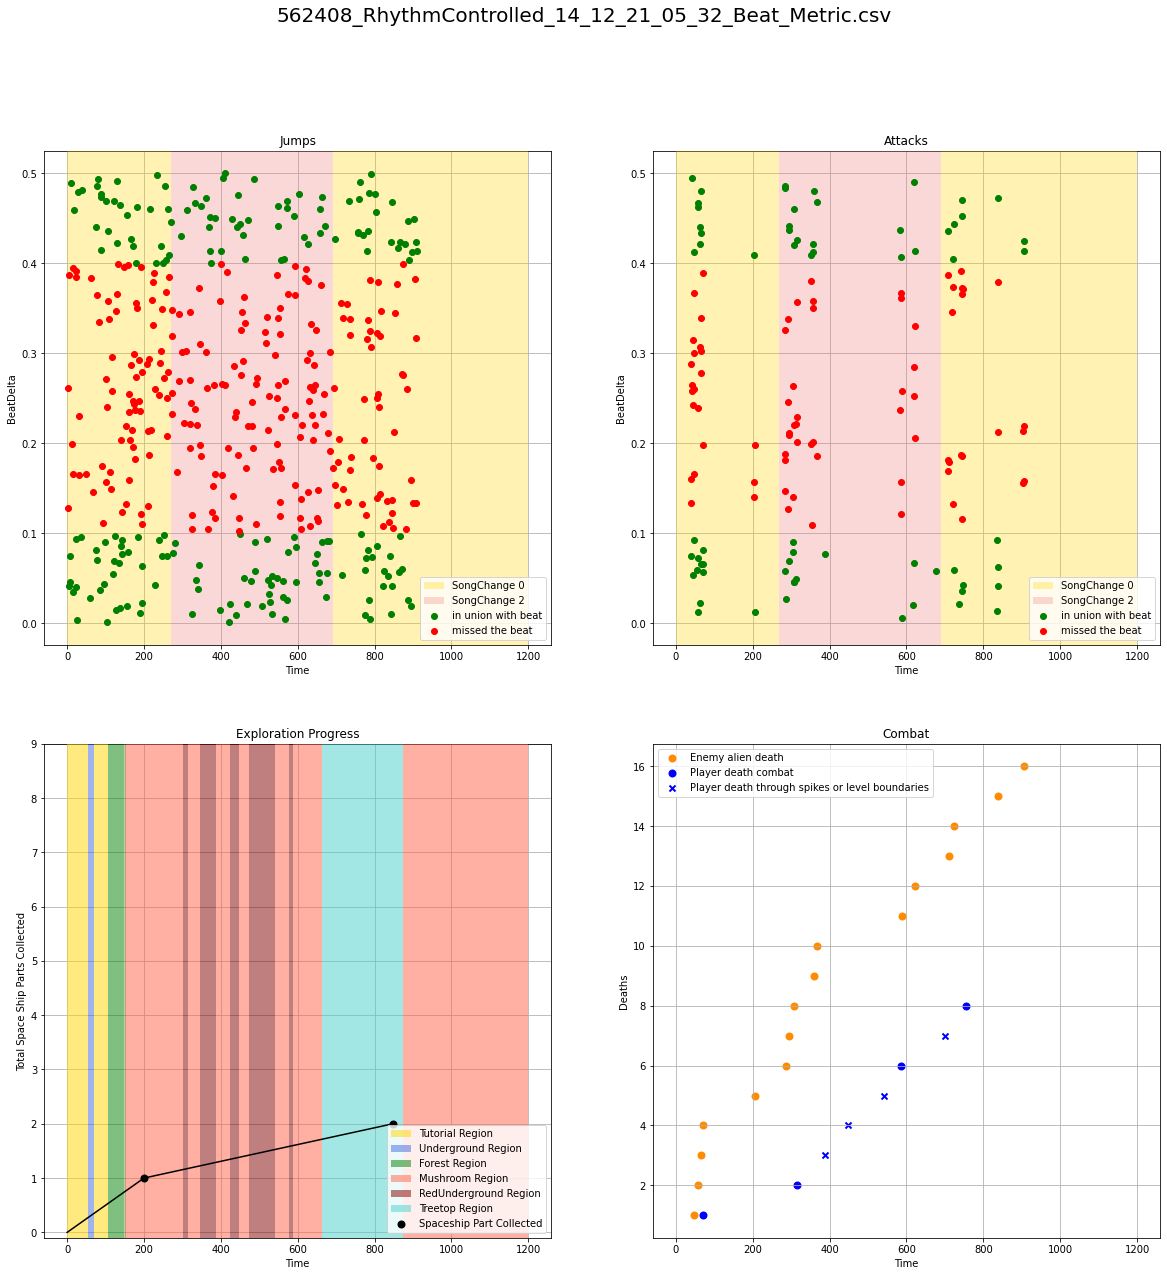

621162_NoRhythm_04_12_21_11_56_Beat_Metric.csv 621162_NoRhythm_04_12_21_11_56_Various_Metric.csv 621162_NoRhythm_04_12_21_11_56_Combat_Metric.csv
time spent in songs: {'SongChange 0': 337, 'SongChange 1': 863, 'SongChange 2': 0}
Jumps hits: 135/376 = 35.9 %
Attacks hits: 108/289 = 37.37 %
unique regions discovered: 6/8 = 75.0 %
total region changes: 18
time spent in regions: {'Tutorial': 190, 'Underground': 367, 'Deepunderground': 224, 'Forest': 224, 'Mushroom': 195, 'Treetop': 0, 'RedUnderground': 0, 'Spider': 0}


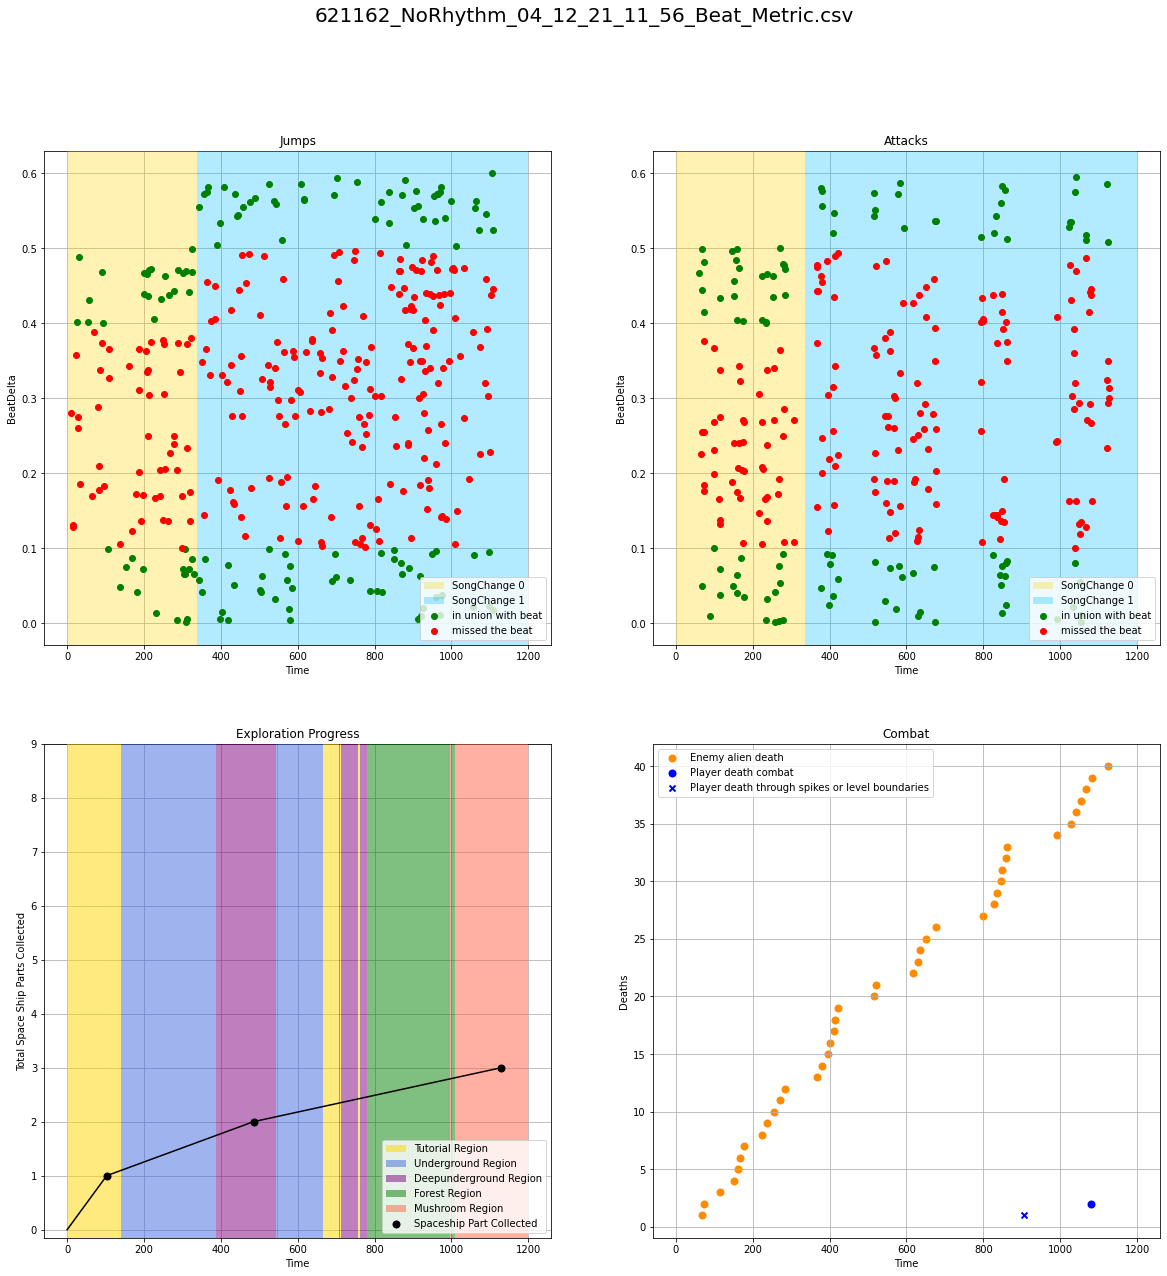

621162_RhythmControlled_04_12_21_12_35_Beat_Metric.csv 621162_RhythmControlled_04_12_21_12_35_Various_Metric.csv 621162_RhythmControlled_04_12_21_12_35_Combat_Metric.csv
time spent in songs: {'SongChange 0': 1200, 'SongChange 1': 0, 'SongChange 2': 0}
Jumps hits: 269/451 = 59.65 %
Attacks hits: 64/107 = 59.81 %
unique regions discovered: 5/8 = 62.5 %
total region changes: 9
time spent in regions: {'Tutorial': 237, 'Underground': 225, 'Deepunderground': 0, 'Forest': 358, 'Mushroom': 380, 'Treetop': 0, 'RedUnderground': 0, 'Spider': 0}


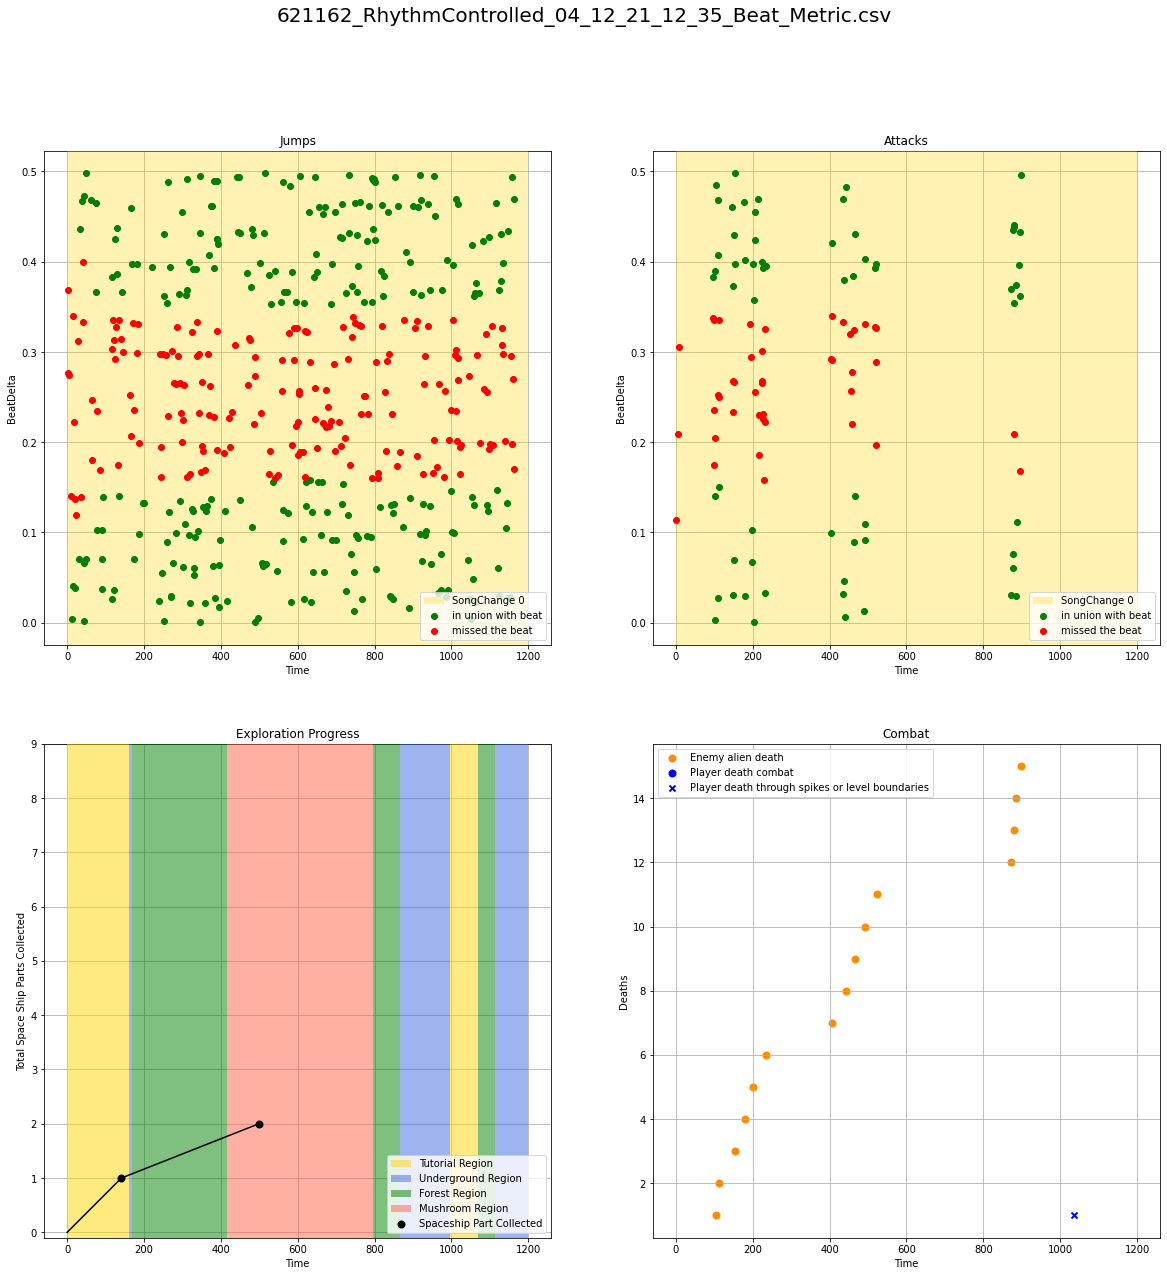

624794_NoRhythm_30_11_21_01_06_Beat_Metric.csv 624794_NoRhythm_30_11_21_01_06_Various_Metric.csv 624794_NoRhythm_30_11_21_01_06_Combat_Metric.csv
time spent in songs: {'SongChange 0': 620, 'SongChange 1': 0, 'SongChange 2': 580}
Jumps hits: 178/472 = 37.71 %
Attacks hits: 27/62 = 43.55 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 8
time spent in regions: {'Tutorial': 130, 'Underground': 118, 'Deepunderground': 0, 'Forest': 97, 'Mushroom': 542, 'Treetop': 132, 'RedUnderground': 181, 'Spider': 0}


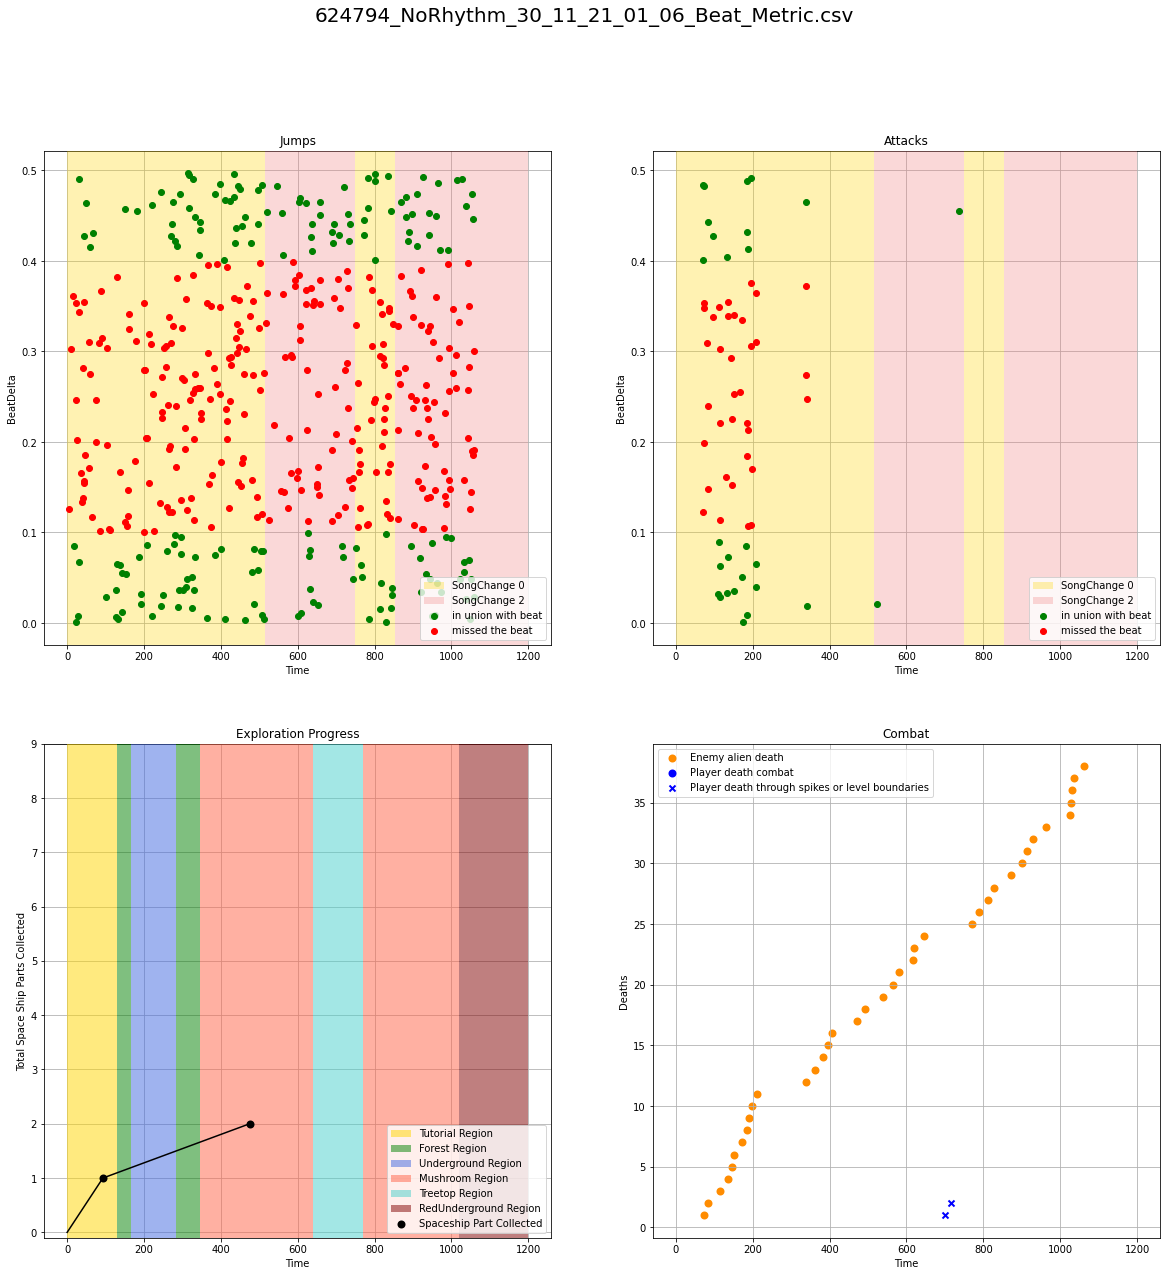

624794_RhythmControlled_30_11_21_01_33_Beat_Metric.csv 624794_RhythmControlled_30_11_21_01_33_Various_Metric.csv 624794_RhythmControlled_30_11_21_01_33_Combat_Metric.csv
time spent in songs: {'SongChange 0': 681, 'SongChange 1': 0, 'SongChange 2': 519}
Jumps hits: 227/627 = 36.2 %
Attacks hits: 105/235 = 44.68 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 10
time spent in regions: {'Tutorial': 236, 'Underground': 4, 'Deepunderground': 0, 'Forest': 145, 'Mushroom': 494, 'Treetop': 152, 'RedUnderground': 169, 'Spider': 0}


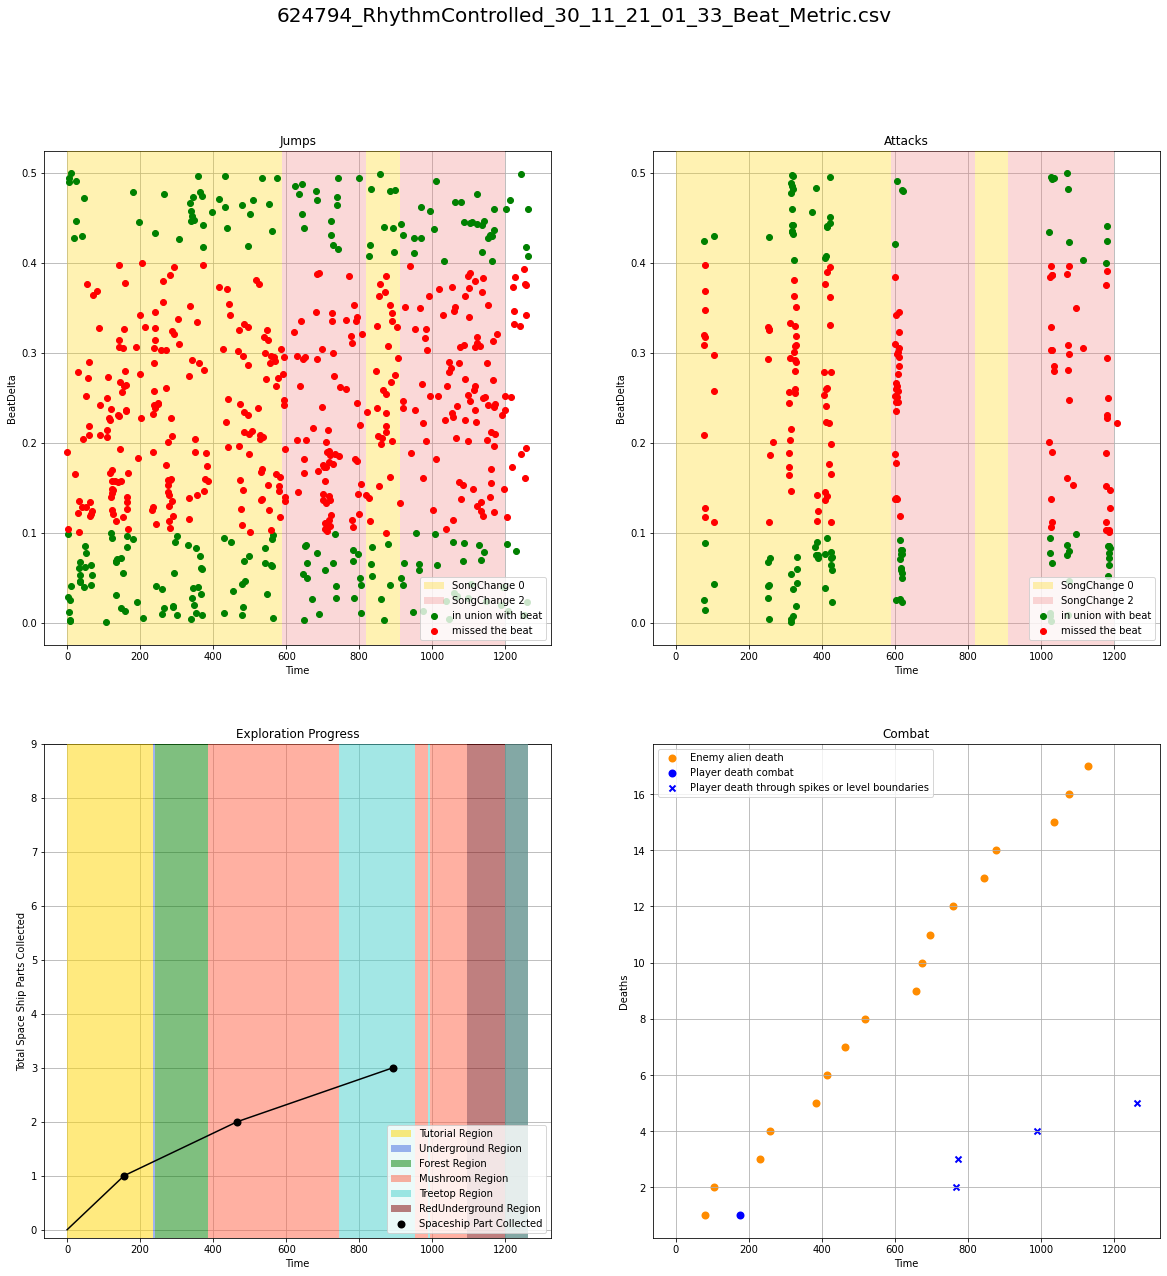

758980_NoRhythm_02_12_21_04_30_Beat_Metric.csv 758980_NoRhythm_02_12_21_04_30_Various_Metric.csv 758980_NoRhythm_02_12_21_04_30_Combat_Metric.csv
time spent in songs: {'SongChange 0': 170, 'SongChange 1': 410, 'SongChange 2': 620}
Jumps hits: 298/680 = 43.82 %
Attacks hits: 117/313 = 37.38 %
unique regions discovered: 8/8 = 100.0 %
total region changes: 28
time spent in regions: {'Tutorial': 81, 'Underground': 129, 'Deepunderground': 127, 'Forest': 74, 'Mushroom': 366, 'Treetop': 95, 'RedUnderground': 328, 'Spider': 0}


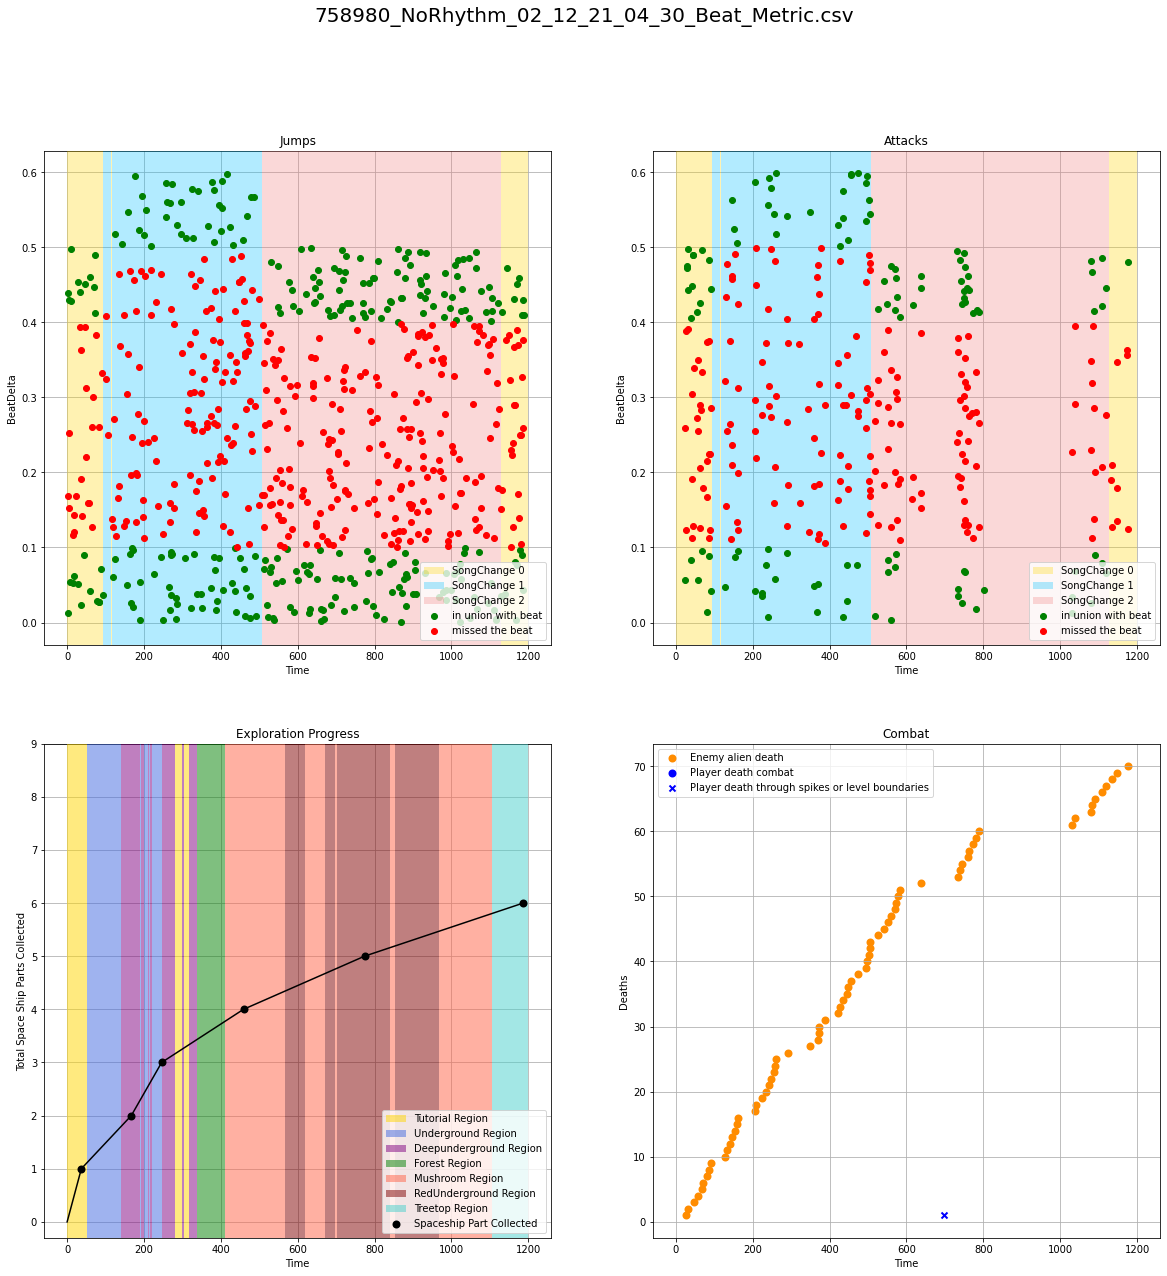

758980_RhythmControlled_02_12_21_04_01_Beat_Metric.csv 758980_RhythmControlled_02_12_21_04_01_Various_Metric.csv 758980_RhythmControlled_02_12_21_04_01_Combat_Metric.csv
time spent in songs: {'SongChange 0': 606, 'SongChange 1': 0, 'SongChange 2': 594}
Jumps hits: 299/542 = 55.17 %
Attacks hits: 132/259 = 50.97 %
unique regions discovered: 6/8 = 75.0 %
total region changes: 13
time spent in regions: {'Tutorial': 156, 'Underground': 150, 'Deepunderground': 0, 'Forest': 90, 'Mushroom': 307, 'Treetop': 0, 'RedUnderground': 497, 'Spider': 0}


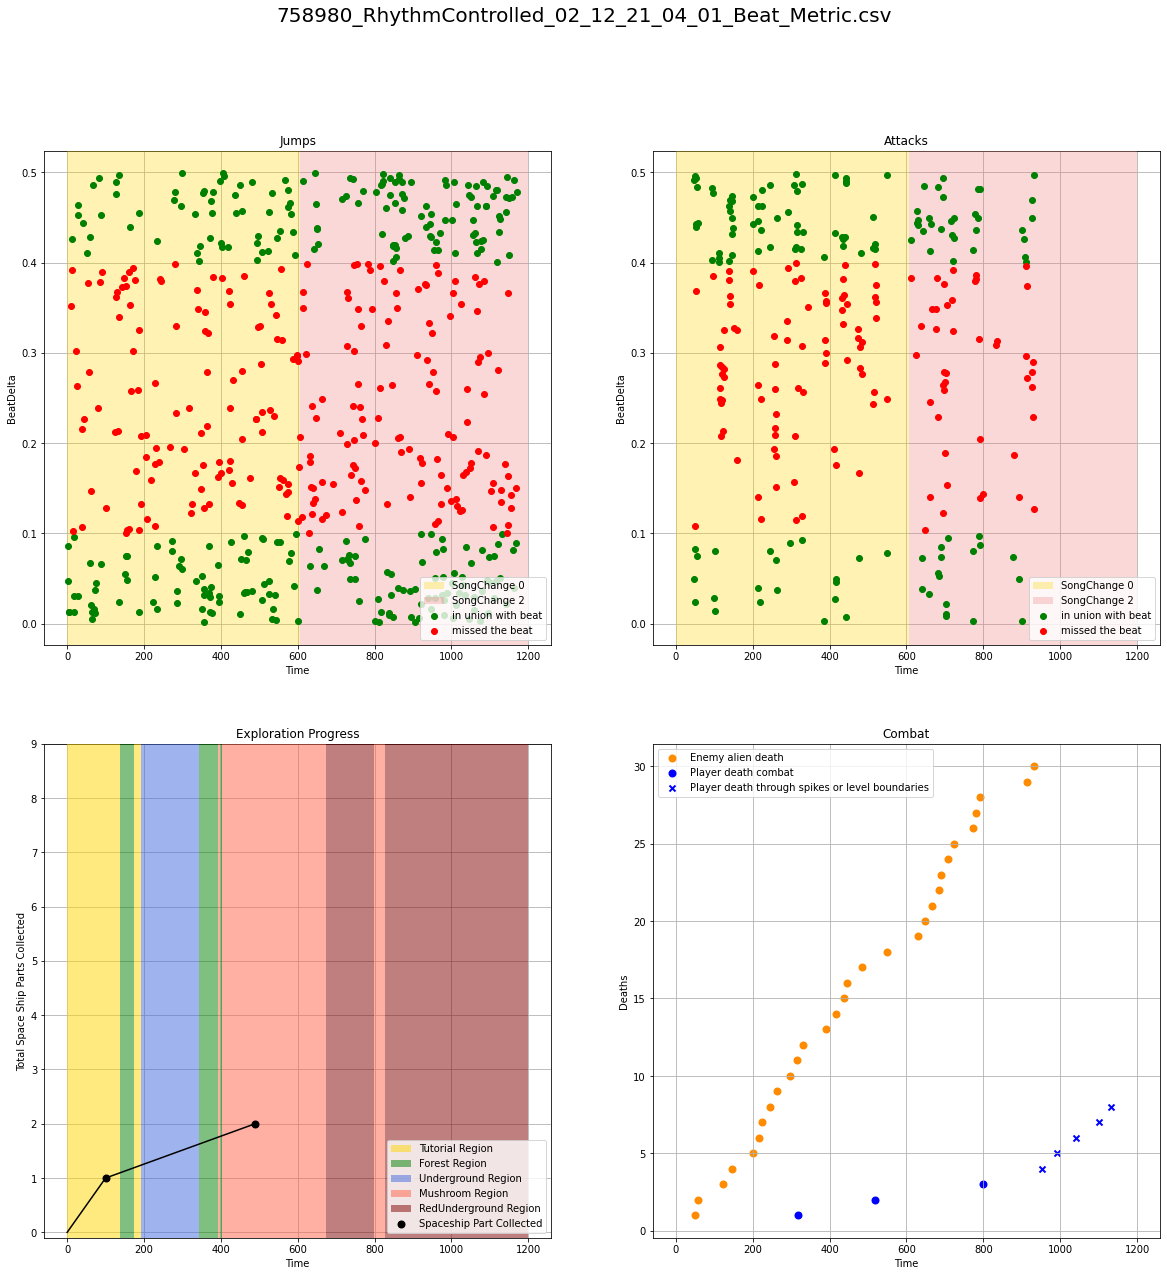

763723_NoRhythm_14_12_21_05_32_Beat_Metric.csv 763723_NoRhythm_14_12_21_05_32_Various_Metric.csv 763723_NoRhythm_14_12_21_05_32_Combat_Metric.csv
time spent in songs: {'SongChange 0': 1093, 'SongChange 1': 0, 'SongChange 2': 107}
Jumps hits: 137/358 = 38.27 %
Attacks hits: 29/71 = 40.85 %
unique regions discovered: 6/8 = 75.0 %
total region changes: 8
time spent in regions: {'Tutorial': 72, 'Underground': 56, 'Deepunderground': 0, 'Forest': 64, 'Mushroom': 947, 'Treetop': 61, 'RedUnderground': 0, 'Spider': 0}


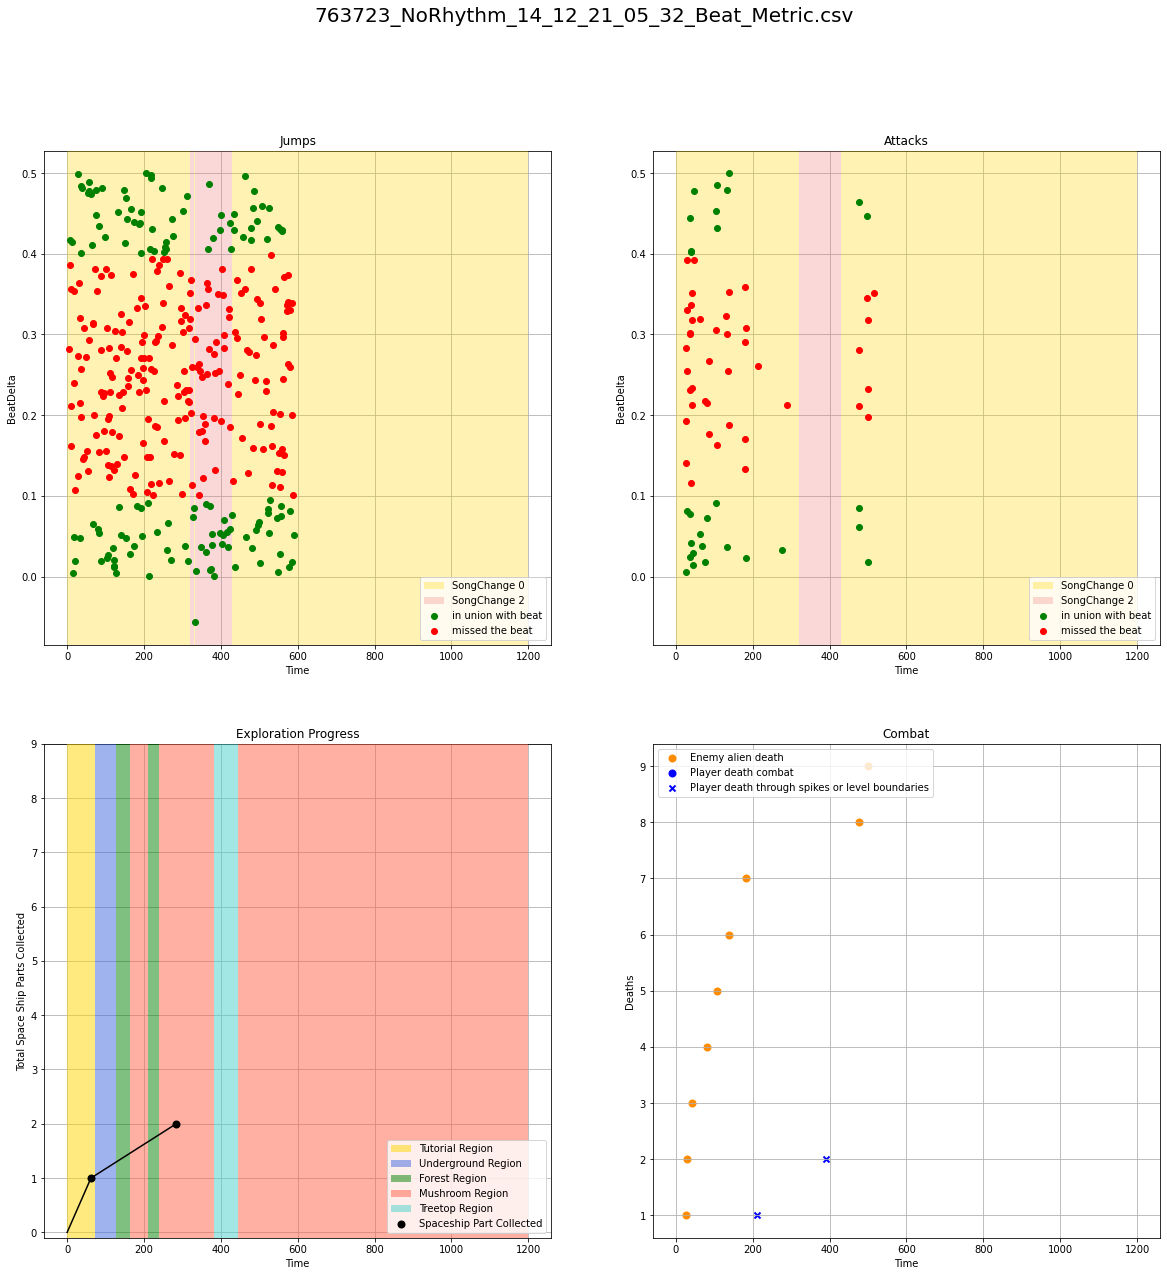

763723_RhythmControlled_14_12_21_05_07_Beat_Metric.csv 763723_RhythmControlled_14_12_21_05_07_Various_Metric.csv 763723_RhythmControlled_14_12_21_05_07_Combat_Metric.csv
time spent in songs: {'SongChange 0': 727, 'SongChange 1': 0, 'SongChange 2': 473}
Jumps hits: 178/487 = 36.55 %
Attacks hits: 133/317 = 41.96 %
unique regions discovered: 6/8 = 75.0 %
total region changes: 10
time spent in regions: {'Tutorial': 106, 'Underground': 105, 'Deepunderground': 0, 'Forest': 187, 'Mushroom': 428, 'Treetop': 0, 'RedUnderground': 374, 'Spider': 0}


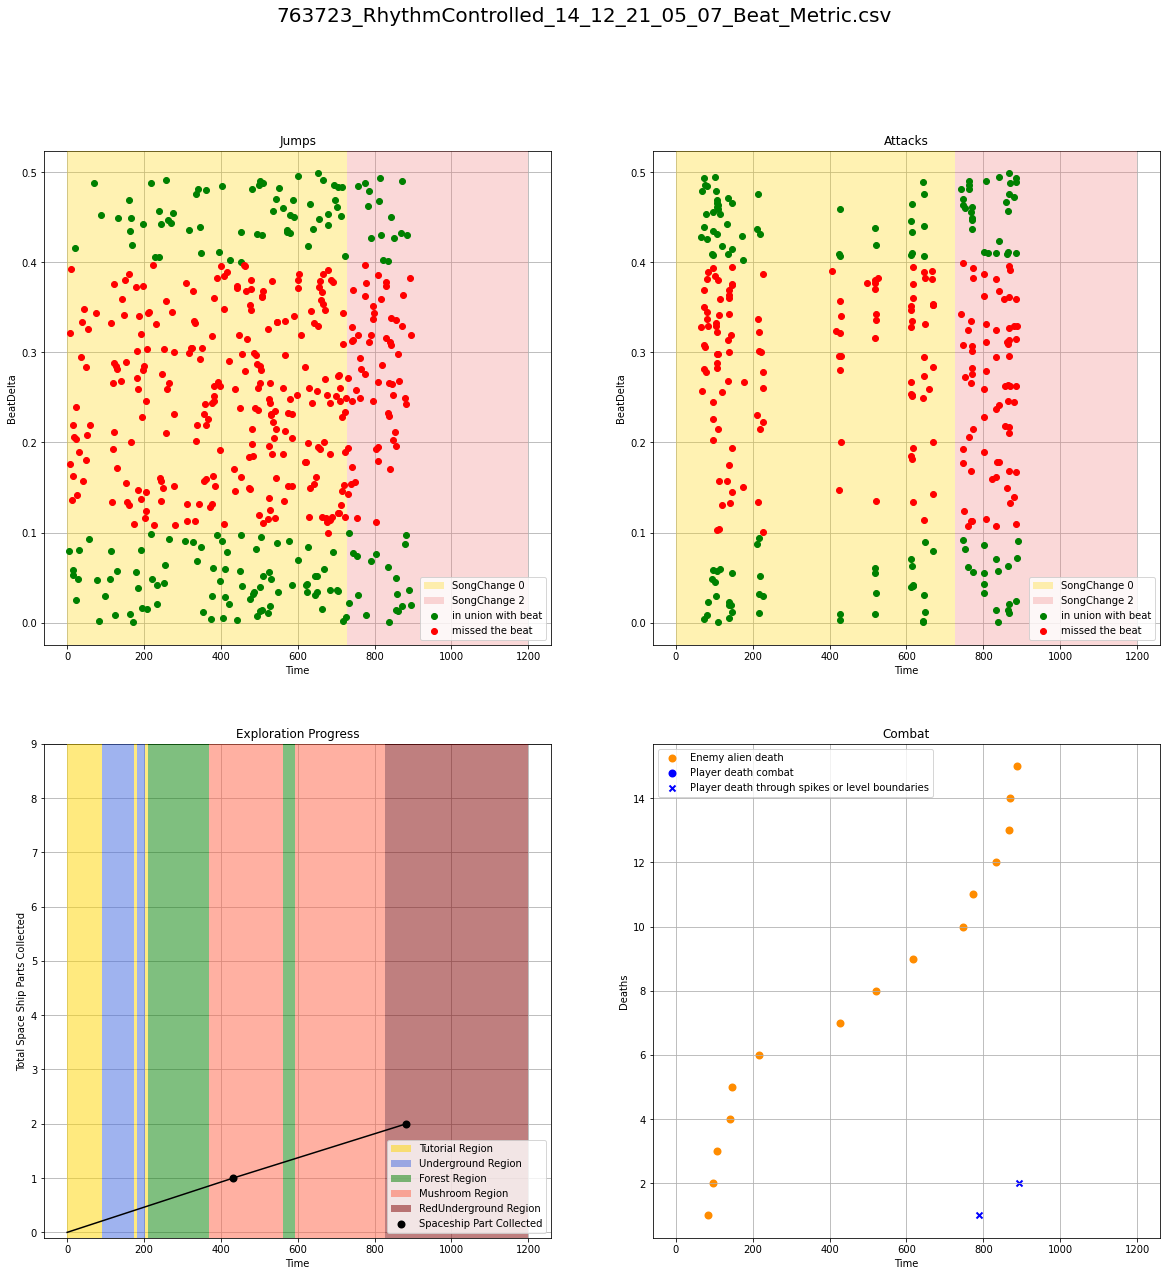

817336_NoRhythm_03_12_21_03_52_Beat_Metric.csv 817336_NoRhythm_03_12_21_03_52_Various_Metric.csv 817336_NoRhythm_03_12_21_03_52_Combat_Metric.csv
time spent in songs: {'SongChange 0': 368, 'SongChange 1': 524, 'SongChange 2': 308}
Jumps hits: 230/580 = 39.66 %
Attacks hits: 116/309 = 37.54 %
unique regions discovered: 8/8 = 100.0 %
total region changes: 28
time spent in regions: {'Tutorial': 147, 'Underground': 146, 'Deepunderground': 180, 'Forest': 65, 'Mushroom': 275, 'Treetop': 234, 'RedUnderground': 153, 'Spider': 0}


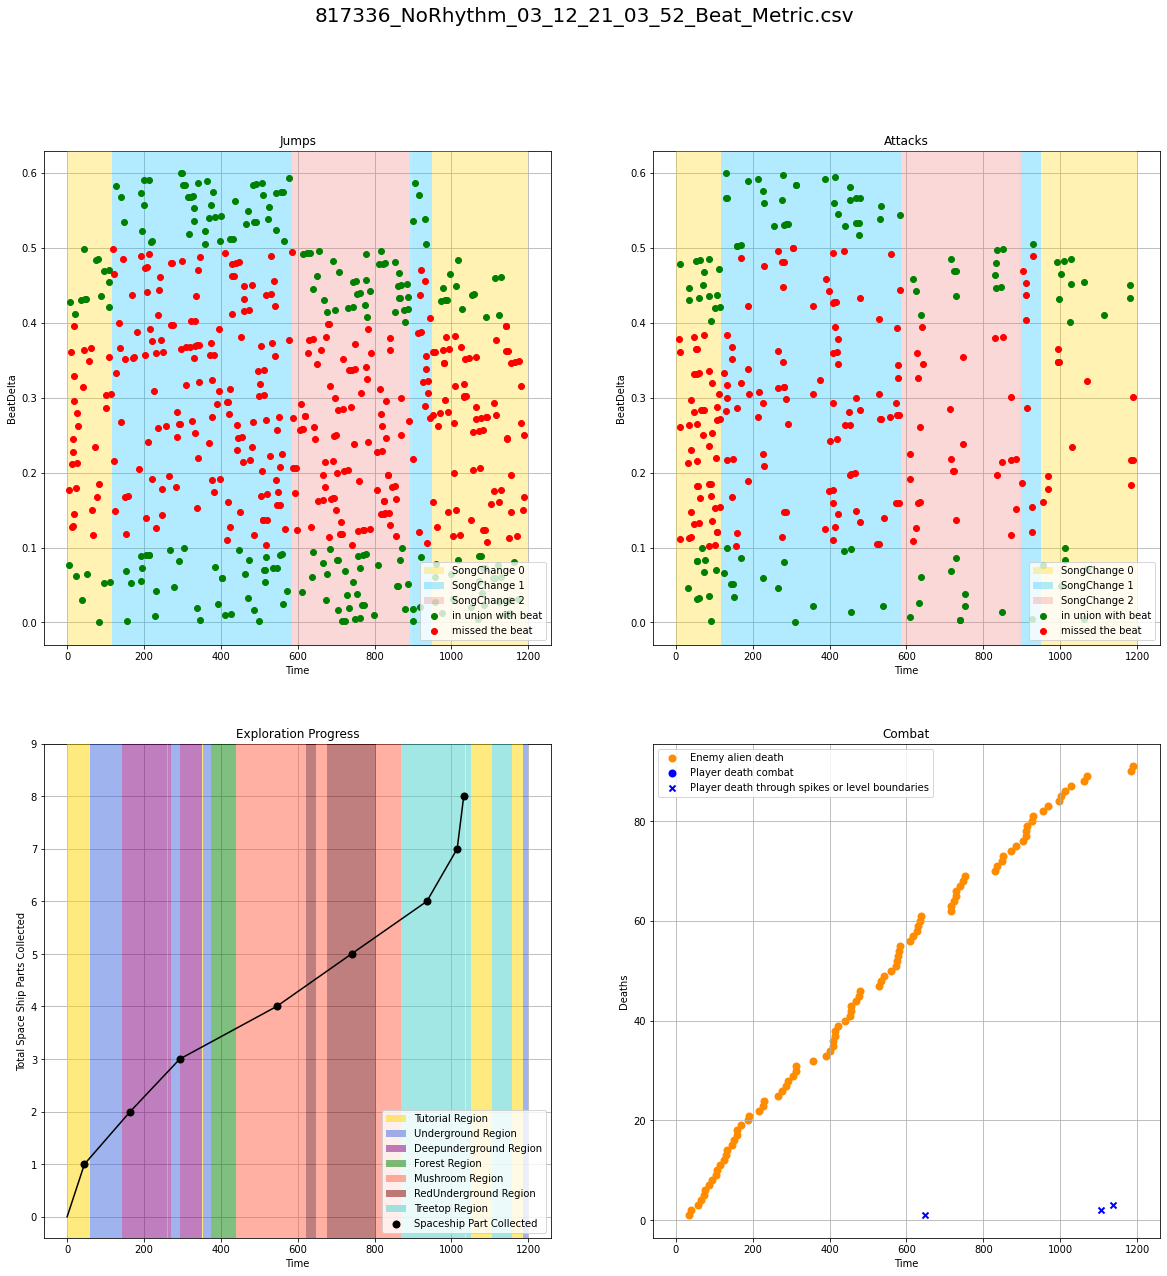

817336_RhythmControlled_03_12_21_03_25_Beat_Metric.csv 817336_RhythmControlled_03_12_21_03_25_Various_Metric.csv 817336_RhythmControlled_03_12_21_03_25_Combat_Metric.csv
time spent in songs: {'SongChange 0': 333, 'SongChange 1': 730, 'SongChange 2': 137}
Jumps hits: 307/486 = 63.17 %
Attacks hits: 111/187 = 59.36 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 19
time spent in regions: {'Tutorial': 165, 'Underground': 277, 'Deepunderground': 224, 'Forest': 96, 'Mushroom': 283, 'Treetop': 155, 'RedUnderground': 0, 'Spider': 0}


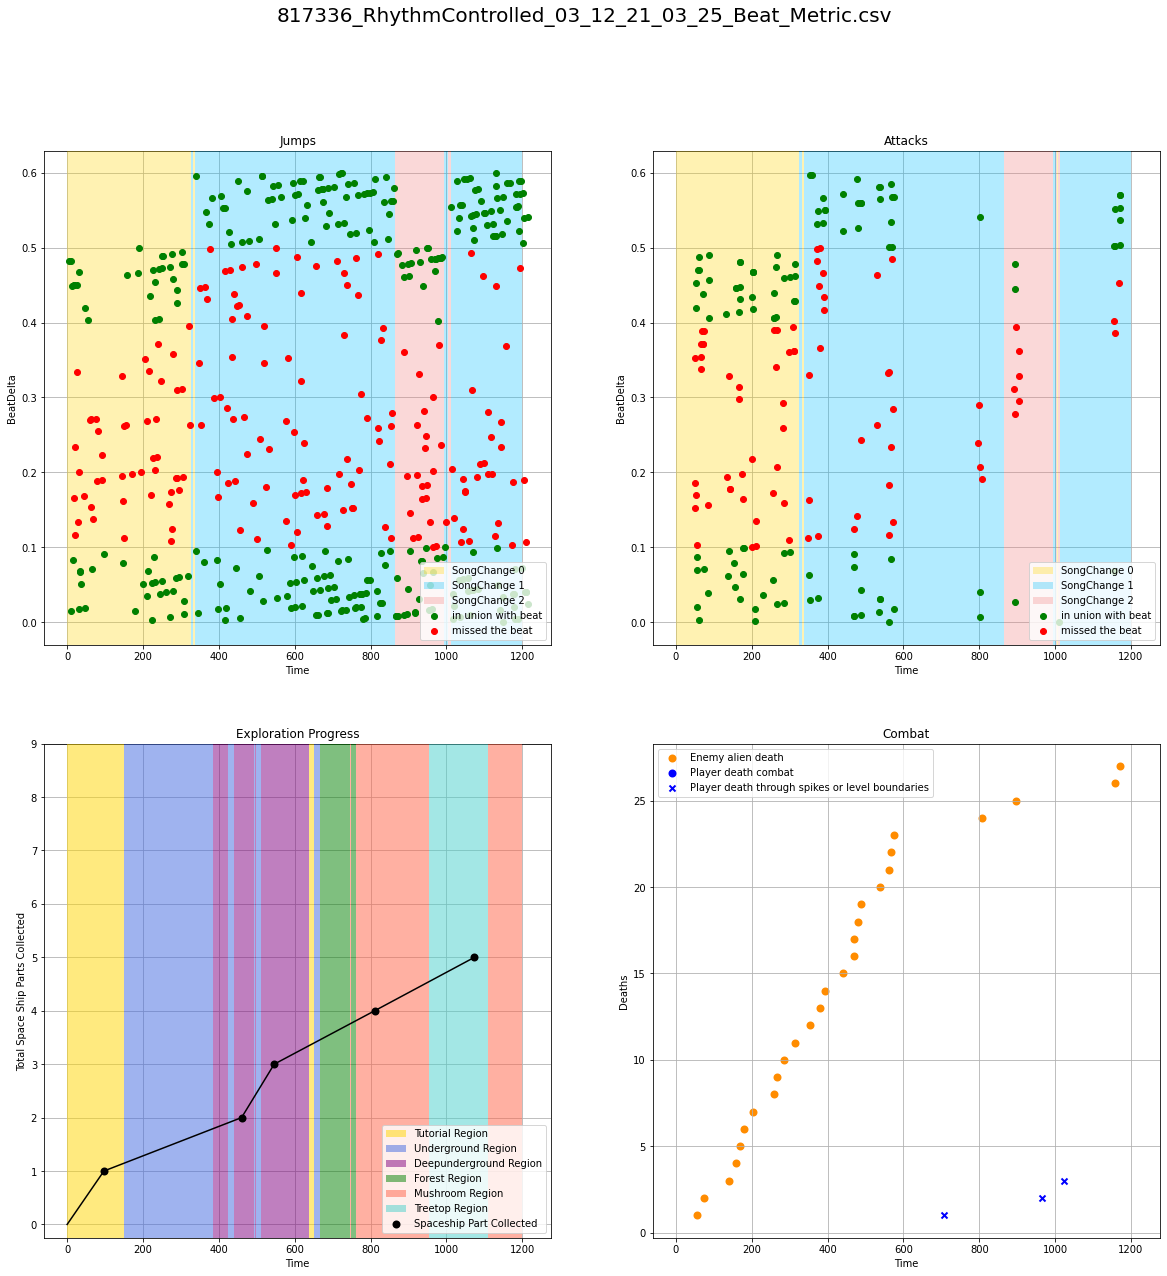

841259_NoRhythm_08_12_21_07_44_Beat_Metric.csv 841259_NoRhythm_08_12_21_07_44_Various_Metric.csv 841259_NoRhythm_08_12_21_07_44_Combat_Metric.csv
time spent in songs: {'SongChange 0': 382, 'SongChange 1': 700, 'SongChange 2': 118}
Jumps hits: 206/606 = 33.99 %
Attacks hits: 98/281 = 34.88 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 12
time spent in regions: {'Tutorial': 188, 'Underground': 189, 'Deepunderground': 62, 'Forest': 250, 'Mushroom': 345, 'Treetop': 166, 'RedUnderground': 0, 'Spider': 0}


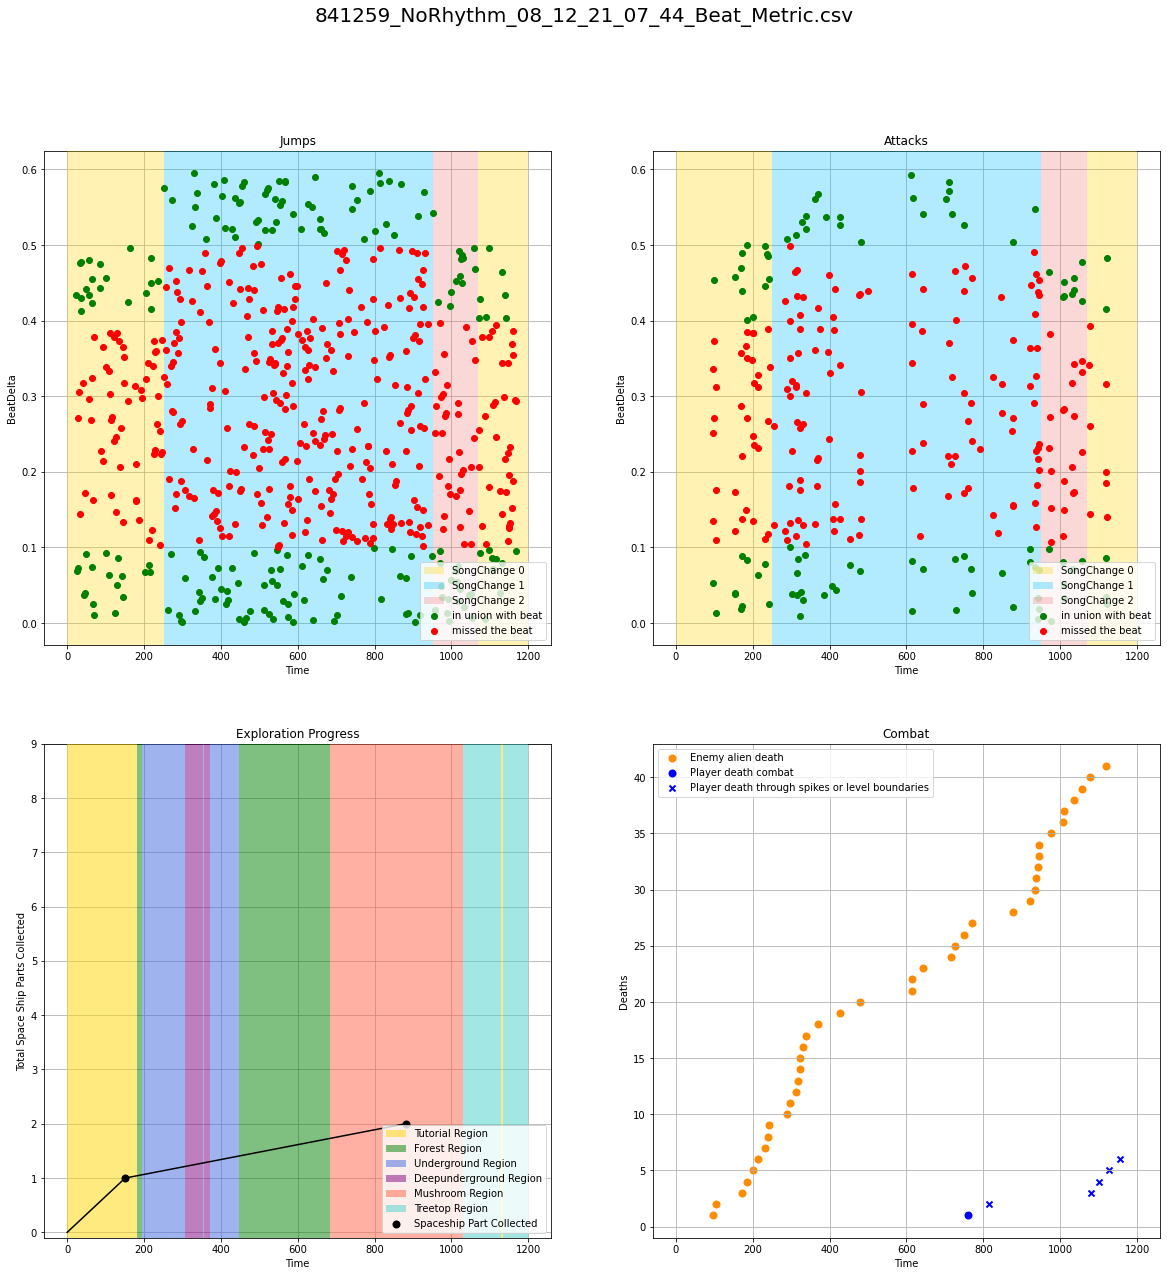

841259_RhythmControlled_08_12_21_08_18_Beat_Metric.csv 841259_RhythmControlled_08_12_21_08_18_Various_Metric.csv 841259_RhythmControlled_08_12_21_08_18_Combat_Metric.csv
time spent in songs: {'SongChange 0': 1065, 'SongChange 1': 0, 'SongChange 2': 135}
Jumps hits: 290/656 = 44.21 %
Attacks hits: 89/174 = 51.15 %
unique regions discovered: 5/8 = 62.5 %
total region changes: 8
time spent in regions: {'Tutorial': 475, 'Underground': 0, 'Deepunderground': 0, 'Forest': 175, 'Mushroom': 342, 'Treetop': 208, 'RedUnderground': 0, 'Spider': 0}


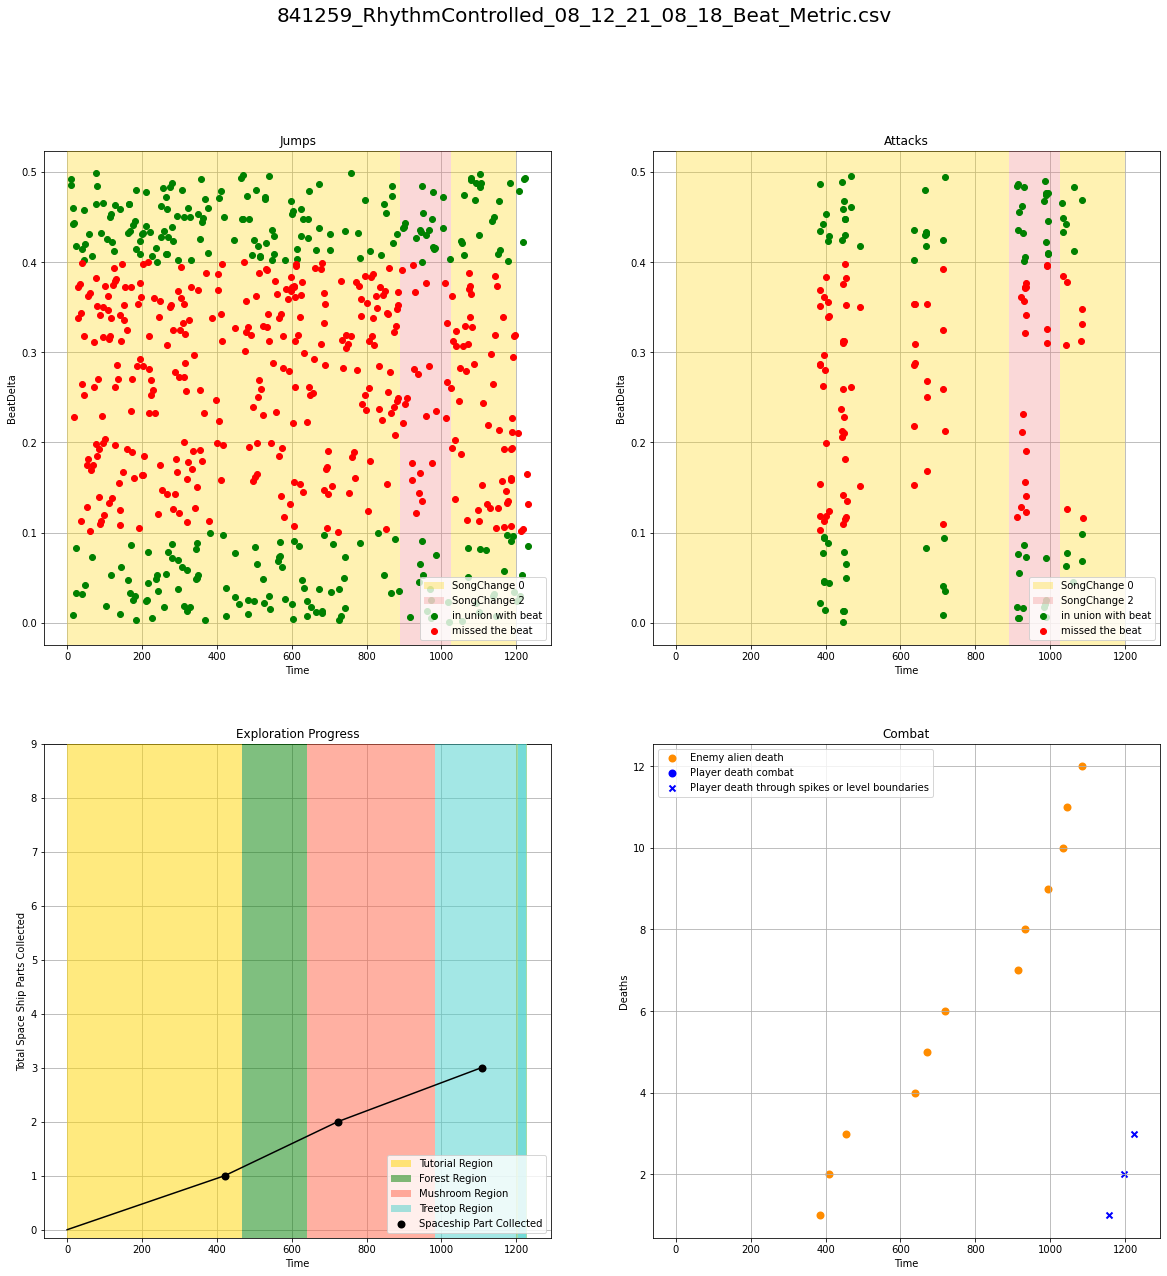

854472_NoRhythm_30_11_21_08_13_Beat_Metric.csv 854472_NoRhythm_30_11_21_08_13_Various_Metric.csv 854472_NoRhythm_30_11_21_08_13_Combat_Metric.csv
time spent in songs: {'SongChange 0': 153, 'SongChange 1': 601, 'SongChange 2': 446}
Jumps hits: 190/554 = 34.3 %
Attacks hits: 22/60 = 36.67 %
unique regions discovered: 9/8 = 112.5 %
total region changes: 29
time spent in regions: {'Tutorial': 90, 'Underground': 212, 'Deepunderground': 148, 'Forest': 92, 'Mushroom': 184, 'Treetop': 290, 'RedUnderground': 91, 'Spider': 93}


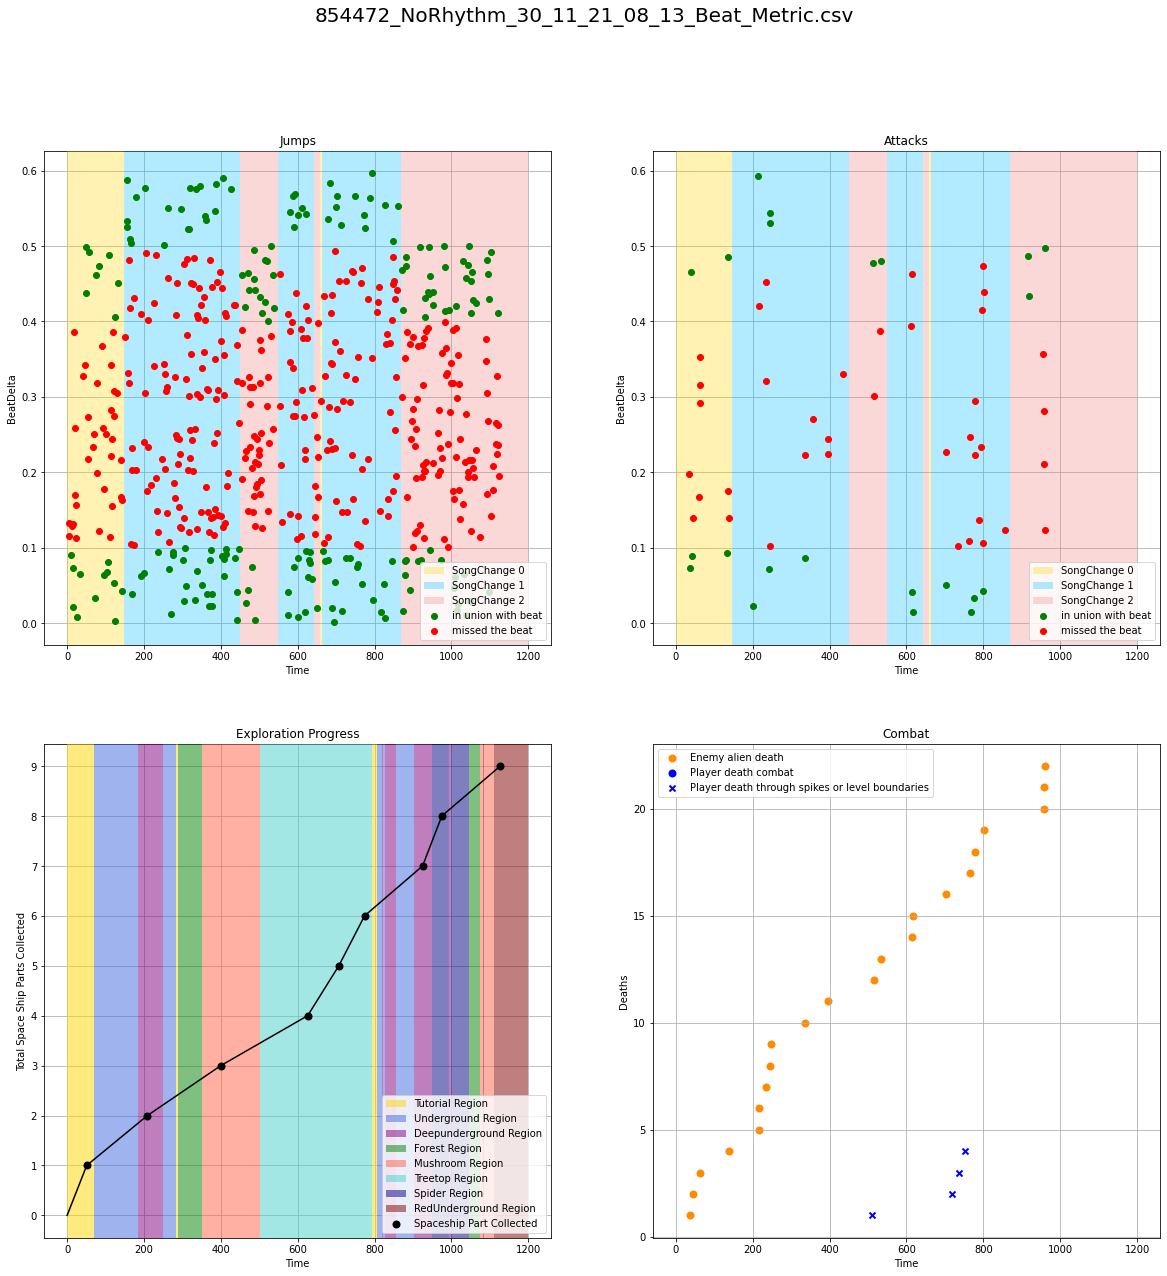

854472_RhythmControlled_30_11_21_07_45_Beat_Metric.csv 854472_RhythmControlled_30_11_21_07_45_Various_Metric.csv 854472_RhythmControlled_30_11_21_07_45_Combat_Metric.csv
time spent in songs: {'SongChange 0': 1097, 'SongChange 1': 0, 'SongChange 2': 103}
Jumps hits: 170/325 = 52.31 %
Attacks hits: 16/40 = 40.0 %
unique regions discovered: 5/8 = 62.5 %
total region changes: 4
time spent in regions: {'Tutorial': 695, 'Underground': 0, 'Deepunderground': 0, 'Forest': 155, 'Mushroom': 311, 'Treetop': 0, 'RedUnderground': 39, 'Spider': 0}


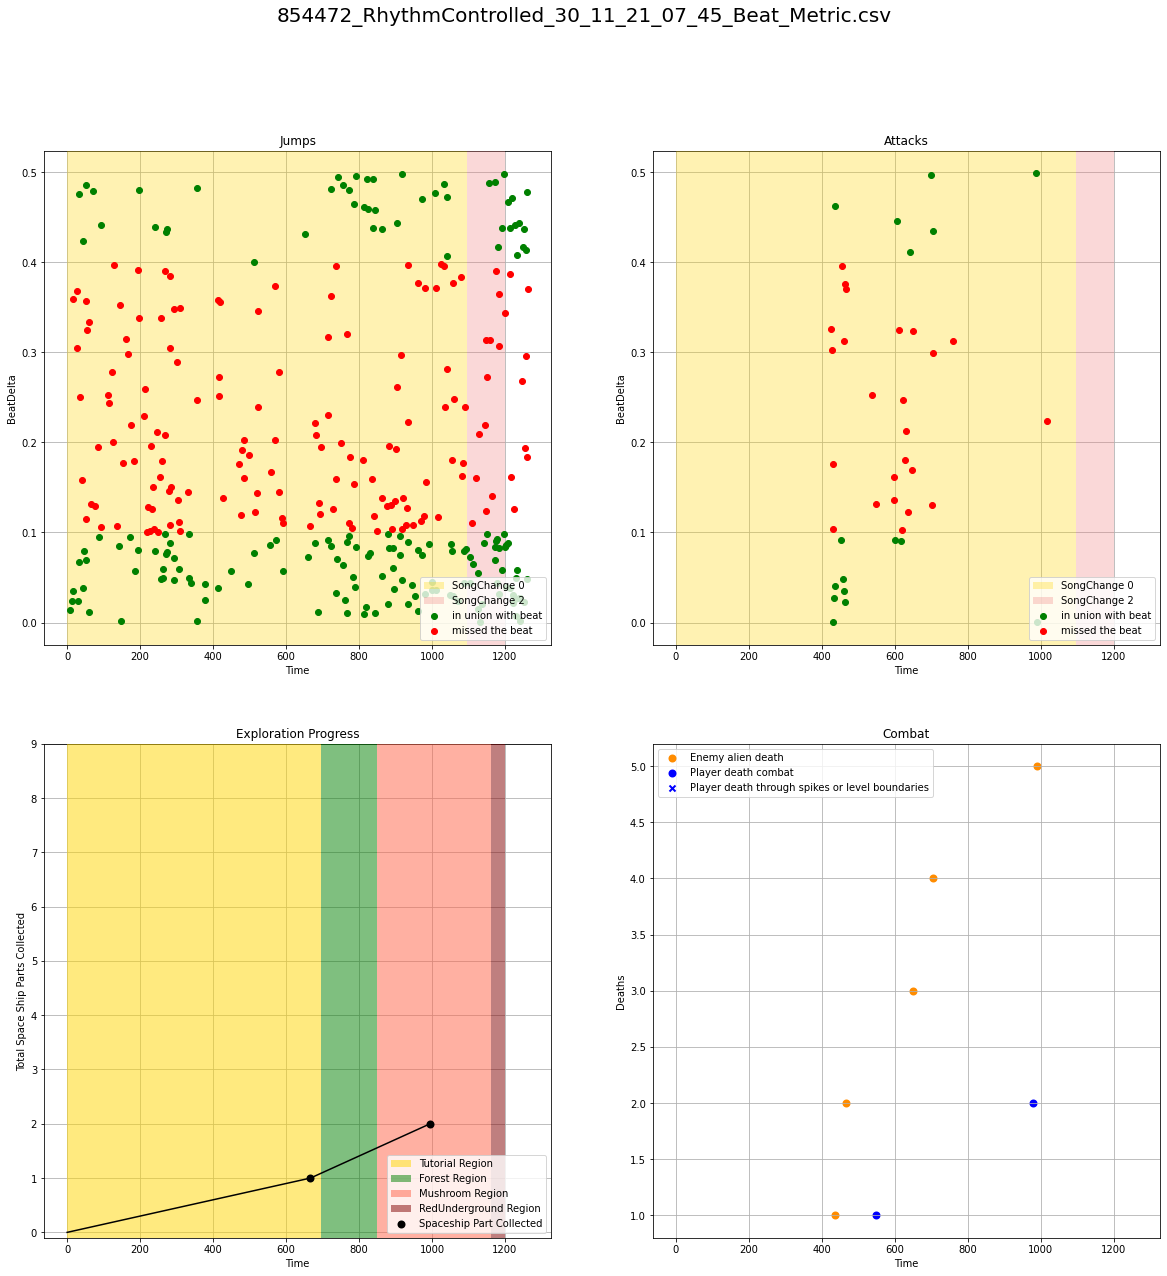

862197_NoRhythm_02_12_21_06_32_Beat_Metric.csv 862197_NoRhythm_02_12_21_06_32_Various_Metric.csv 862197_NoRhythm_02_12_21_06_32_Combat_Metric.csv
time spent in songs: {'SongChange 0': 106, 'SongChange 1': 584, 'SongChange 2': 510}
Jumps hits: 259/696 = 37.21 %
Attacks hits: 9/29 = 31.03 %
unique regions discovered: 9/8 = 112.5 %
total region changes: 35
time spent in regions: {'Tutorial': 112, 'Underground': 257, 'Deepunderground': 171, 'Forest': 151, 'Mushroom': 324, 'Treetop': 124, 'RedUnderground': 15, 'Spider': 46}


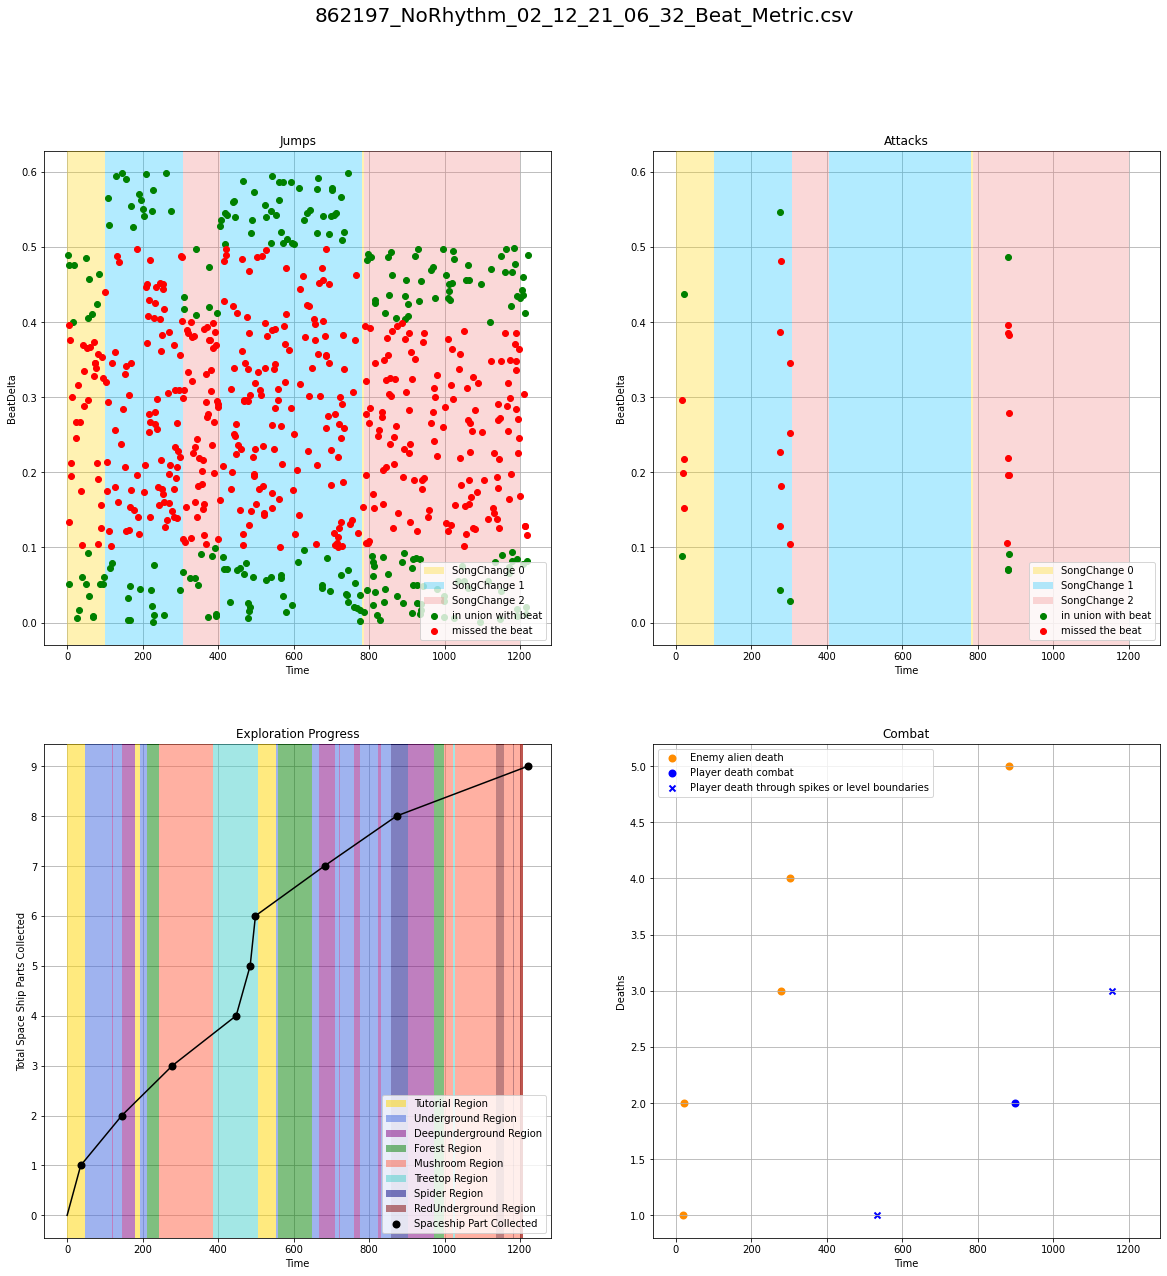

862197_RhythmControlled_02_12_21_06_04_Beat_Metric.csv 862197_RhythmControlled_02_12_21_06_04_Various_Metric.csv 862197_RhythmControlled_02_12_21_06_04_Combat_Metric.csv
time spent in songs: {'SongChange 0': 326, 'SongChange 1': 726, 'SongChange 2': 148}
Jumps hits: 228/528 = 43.18 %
Attacks hits: 76/187 = 40.64 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 21
time spent in regions: {'Tutorial': 151, 'Underground': 247, 'Deepunderground': 211, 'Forest': 127, 'Mushroom': 166, 'Treetop': 298, 'RedUnderground': 0, 'Spider': 0}


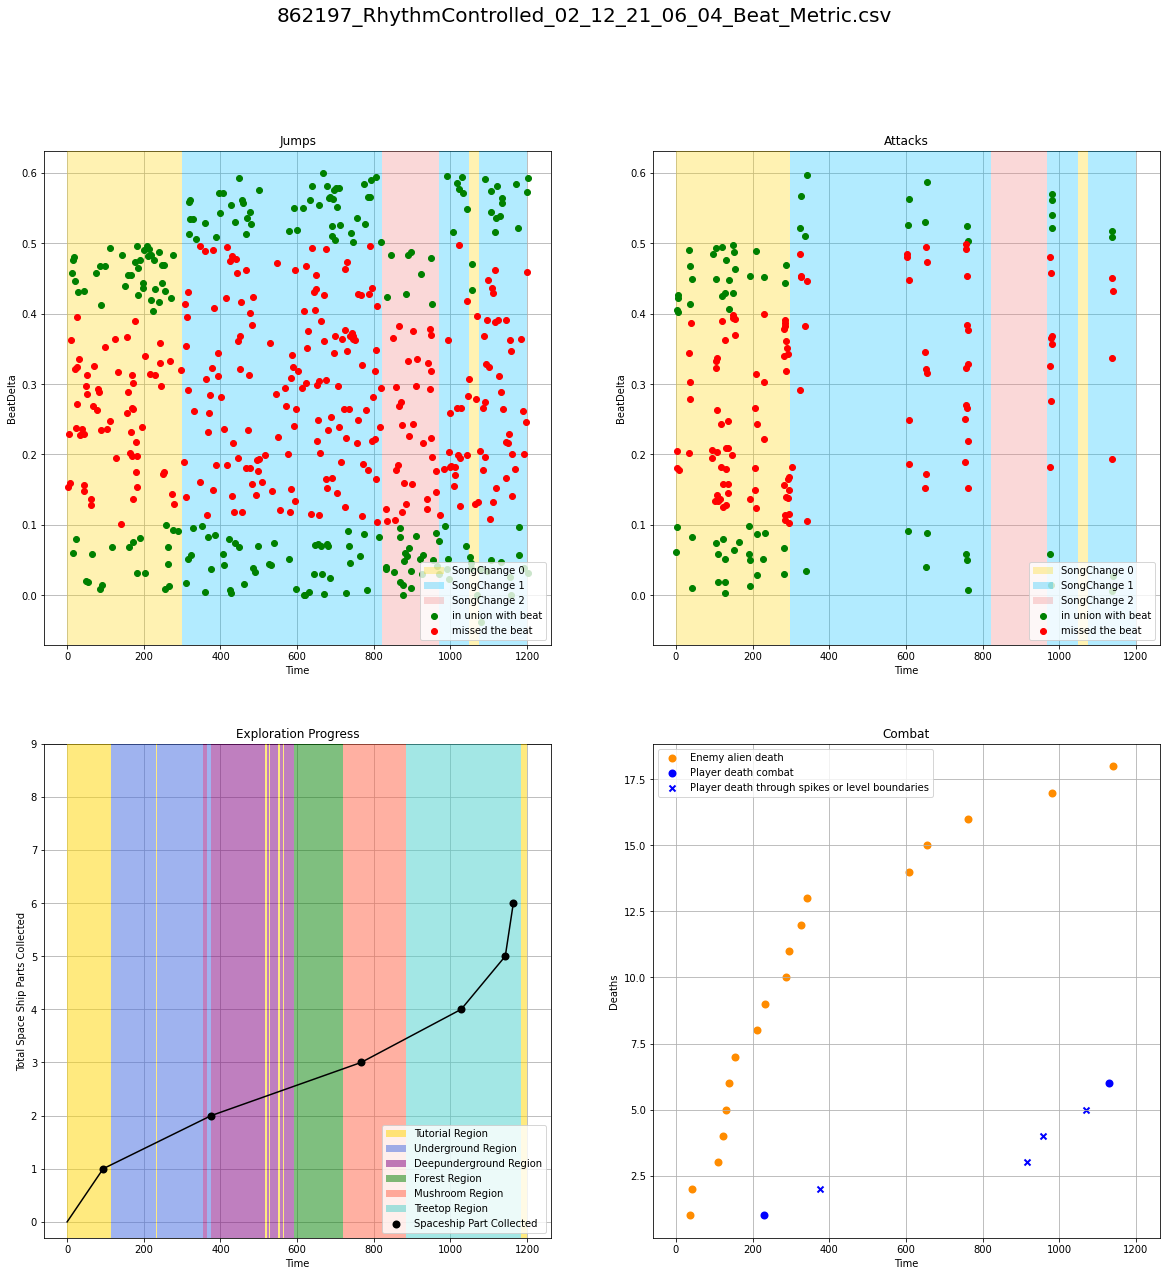

865172_NoRhythm_02_12_21_04_30_Beat_Metric.csv 865172_NoRhythm_02_12_21_04_30_Various_Metric.csv 865172_NoRhythm_02_12_21_04_30_Combat_Metric.csv
time spent in songs: {'SongChange 0': 380, 'SongChange 1': 743, 'SongChange 2': 77}
Jumps hits: 333/769 = 43.3 %
Attacks hits: 27/68 = 39.71 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 20
time spent in regions: {'Tutorial': 113, 'Underground': 176, 'Deepunderground': 111, 'Forest': 168, 'Mushroom': 381, 'Treetop': 251, 'RedUnderground': 0, 'Spider': 0}


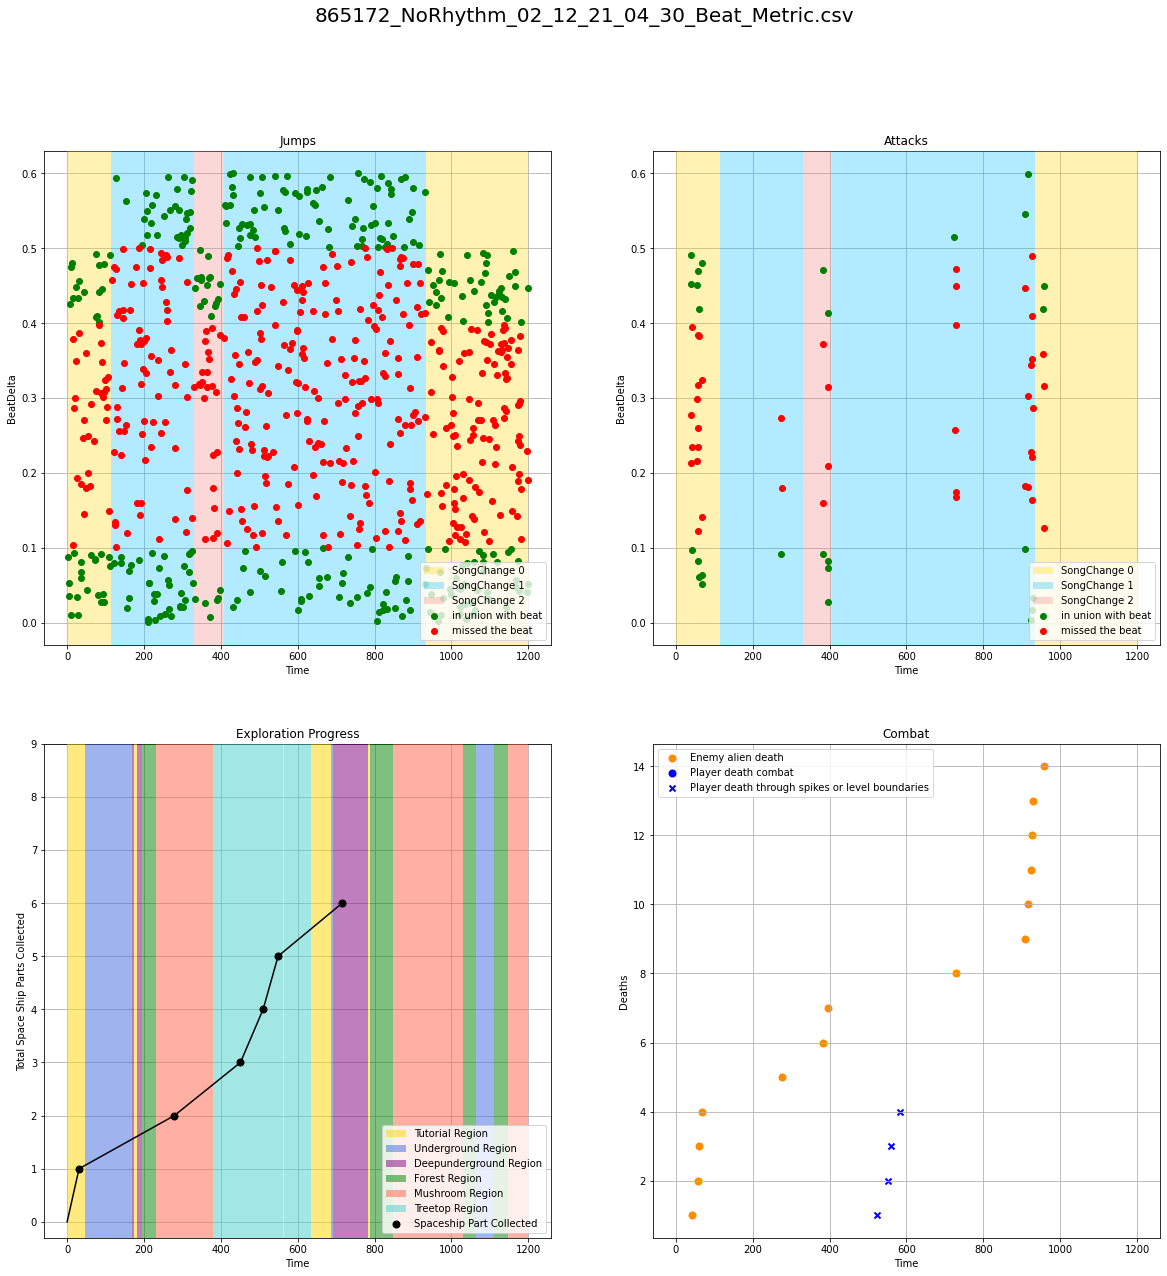

865172_RhythmControlled_02_12_21_03_59_Beat_Metric.csv 865172_RhythmControlled_02_12_21_03_59_Various_Metric.csv 865172_RhythmControlled_02_12_21_03_59_Combat_Metric.csv
time spent in songs: {'SongChange 0': 330, 'SongChange 1': 0, 'SongChange 2': 870}
Jumps hits: 311/441 = 70.52 %
Attacks hits: 112/147 = 76.19 %
unique regions discovered: 9/8 = 112.5 %
total region changes: 36
time spent in regions: {'Tutorial': 309, 'Underground': 66, 'Deepunderground': 251, 'Forest': 245, 'Mushroom': 315, 'Treetop': -80, 'RedUnderground': 2, 'Spider': 92}


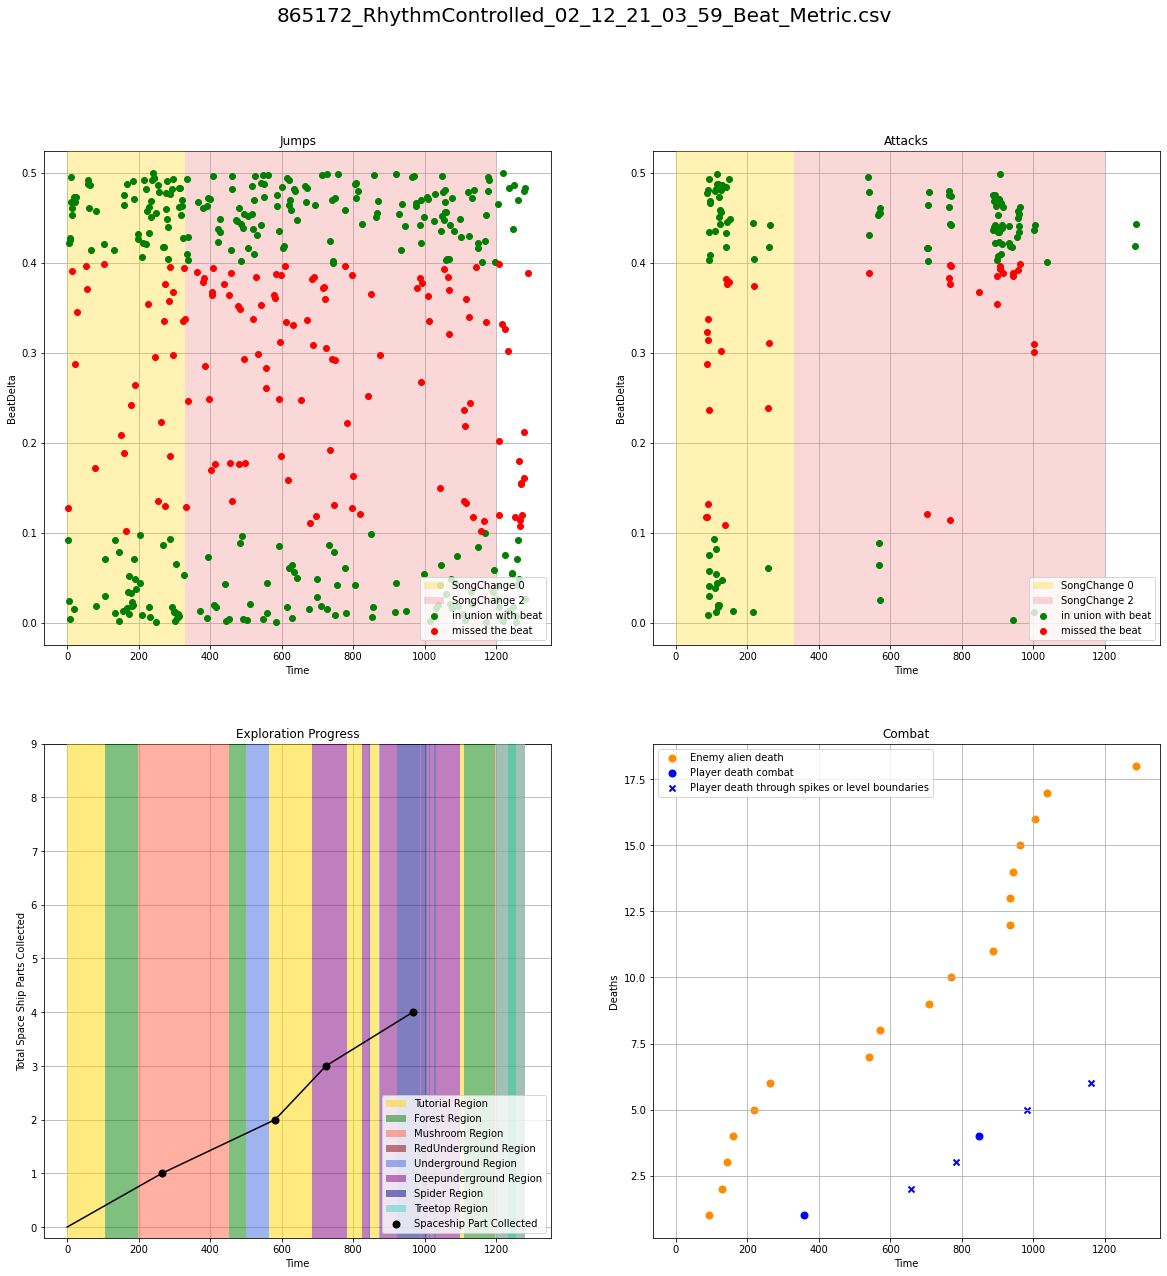

865850_NoRhythm_04_12_21_08_07_Beat_Metric.csv 865850_NoRhythm_04_12_21_08_07_Various_Metric.csv 865850_NoRhythm_04_12_21_08_07_Combat_Metric.csv
time spent in songs: {'SongChange 0': 127, 'SongChange 1': 459, 'SongChange 2': 614}
Jumps hits: 277/605 = 45.79 %
Attacks hits: 90/183 = 49.18 %
unique regions discovered: 8/8 = 100.0 %
total region changes: 22
time spent in regions: {'Tutorial': 51, 'Underground': 85, 'Deepunderground': 88, 'Forest': 66, 'Mushroom': 465, 'Treetop': 190, 'RedUnderground': 255, 'Spider': 0}


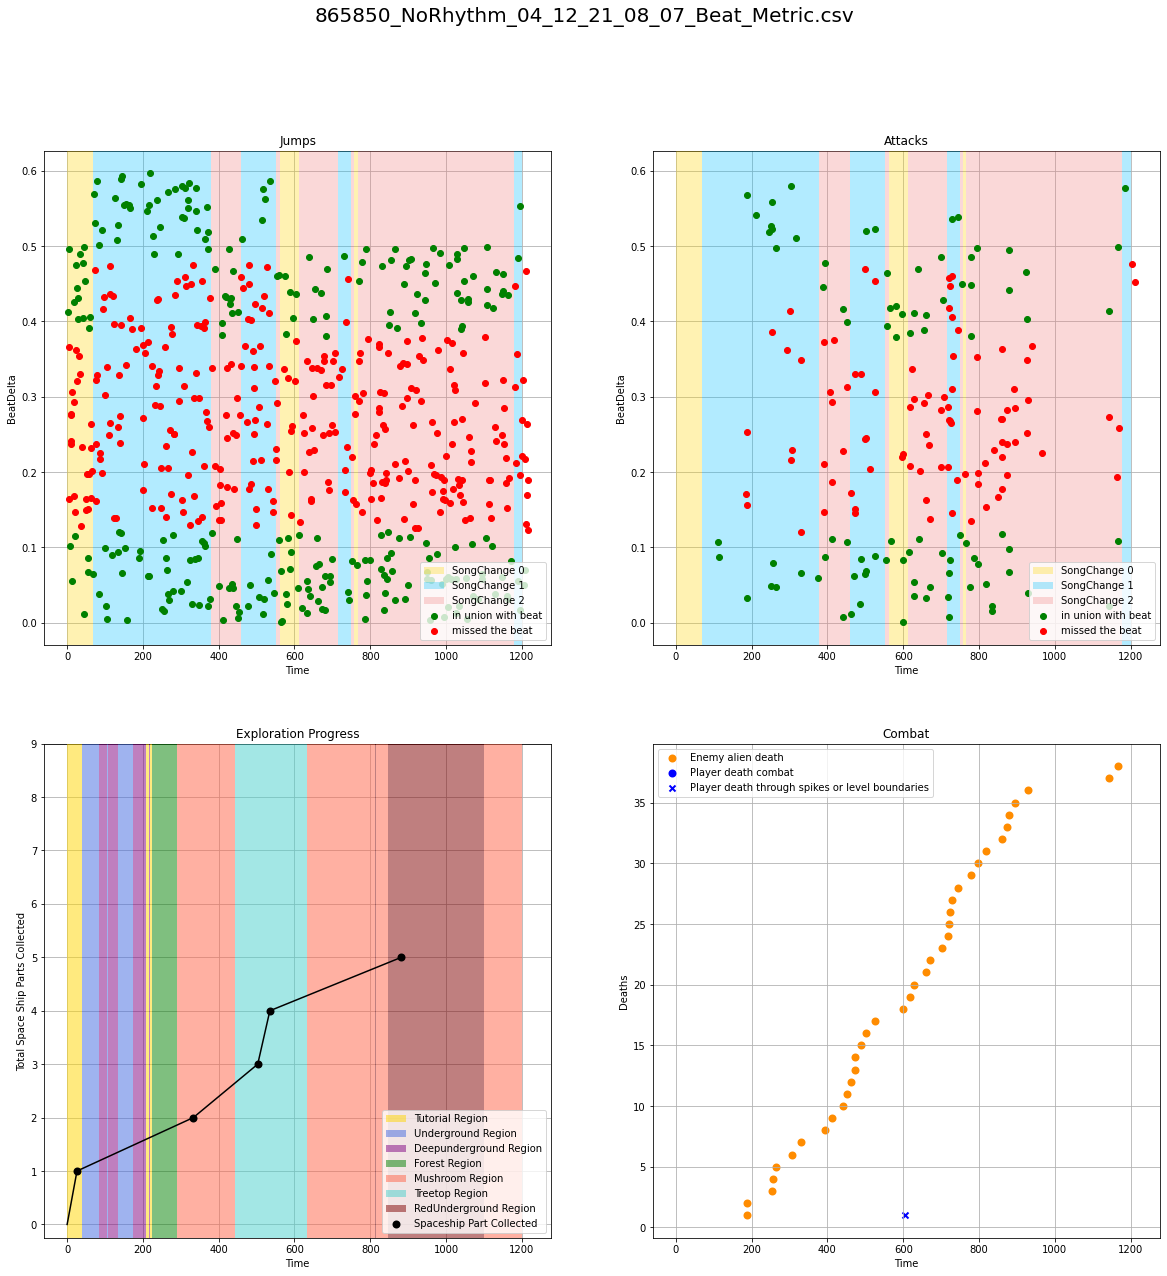

865850_RhythmControlled_04_12_21_07_43_Beat_Metric.csv 865850_RhythmControlled_04_12_21_07_43_Various_Metric.csv 865850_RhythmControlled_04_12_21_07_43_Combat_Metric.csv
time spent in songs: {'SongChange 0': 743, 'SongChange 1': 0, 'SongChange 2': 457}
Jumps hits: 330/635 = 51.97 %
Attacks hits: 186/324 = 57.41 %
unique regions discovered: 7/8 = 87.5 %
total region changes: 23
time spent in regions: {'Tutorial': 197, 'Underground': 64, 'Deepunderground': 9, 'Forest': 190, 'Mushroom': 448, 'Treetop': 292, 'RedUnderground': 0, 'Spider': 0}


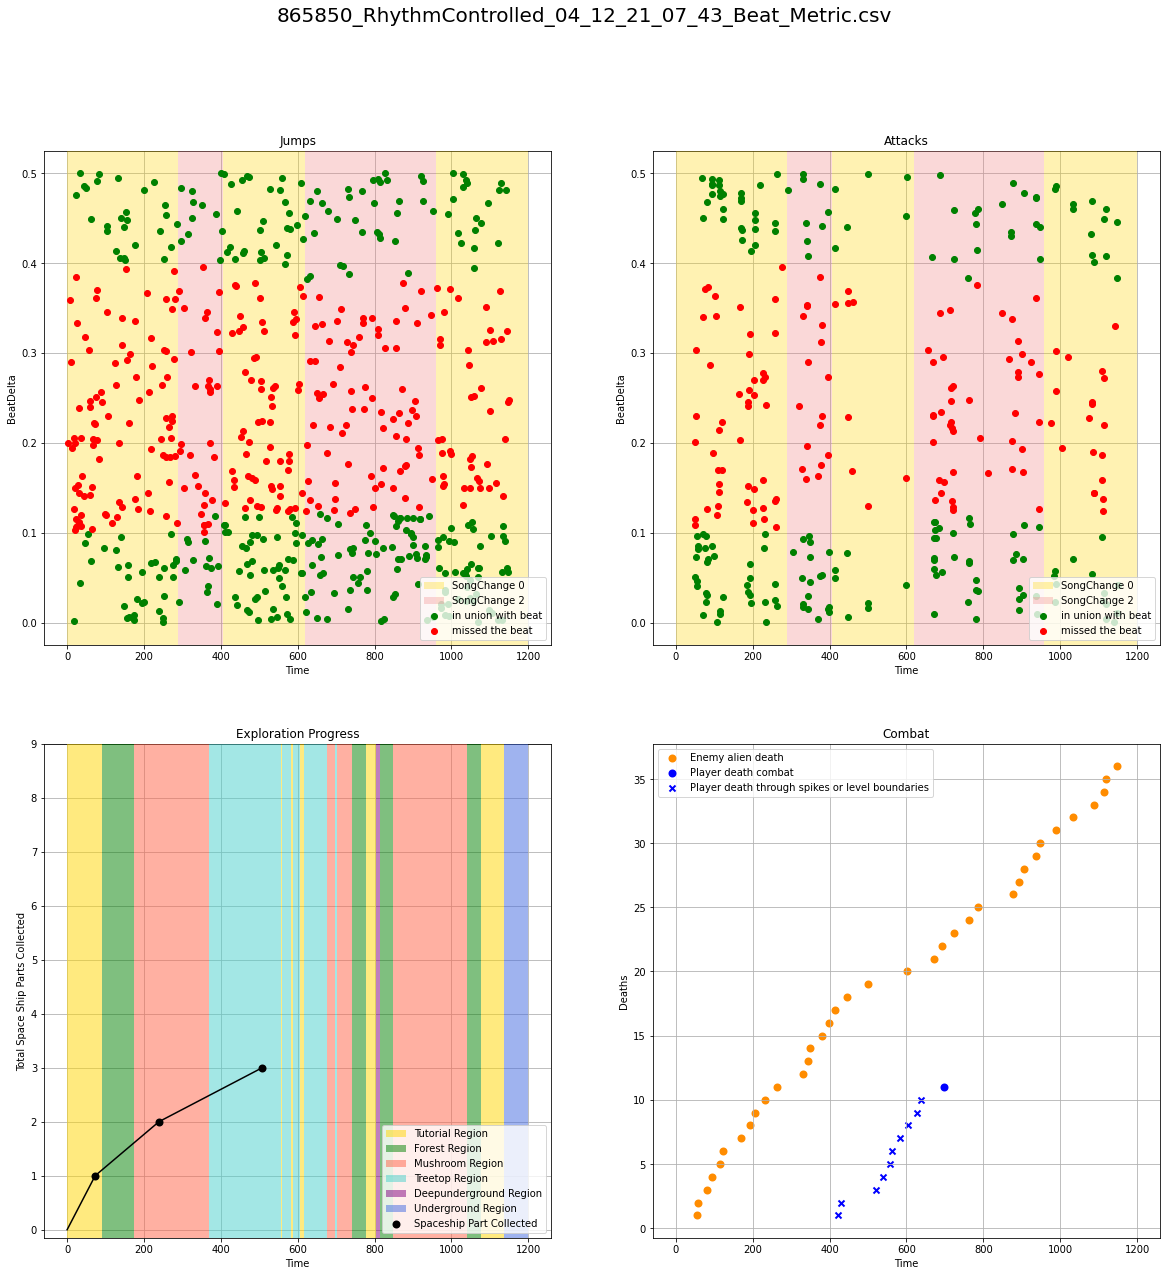

976861_NoRhythm_14_12_21_07_23_Beat_Metric.csv 976861_NoRhythm_14_12_21_07_23_Various_Metric.csv 976861_NoRhythm_14_12_21_07_23_Combat_Metric.csv
time spent in songs: {'SongChange 0': 674, 'SongChange 1': 242, 'SongChange 2': 284}
Jumps hits: 222/464 = 47.84 %
Attacks hits: 49/117 = 41.88 %
unique regions discovered: 9/8 = 112.5 %
total region changes: 28
time spent in regions: {'Tutorial': 35, 'Underground': 78, 'Deepunderground': 105, 'Forest': 121, 'Mushroom': 134, 'Treetop': 627, 'RedUnderground': 100, 'Spider': 0}


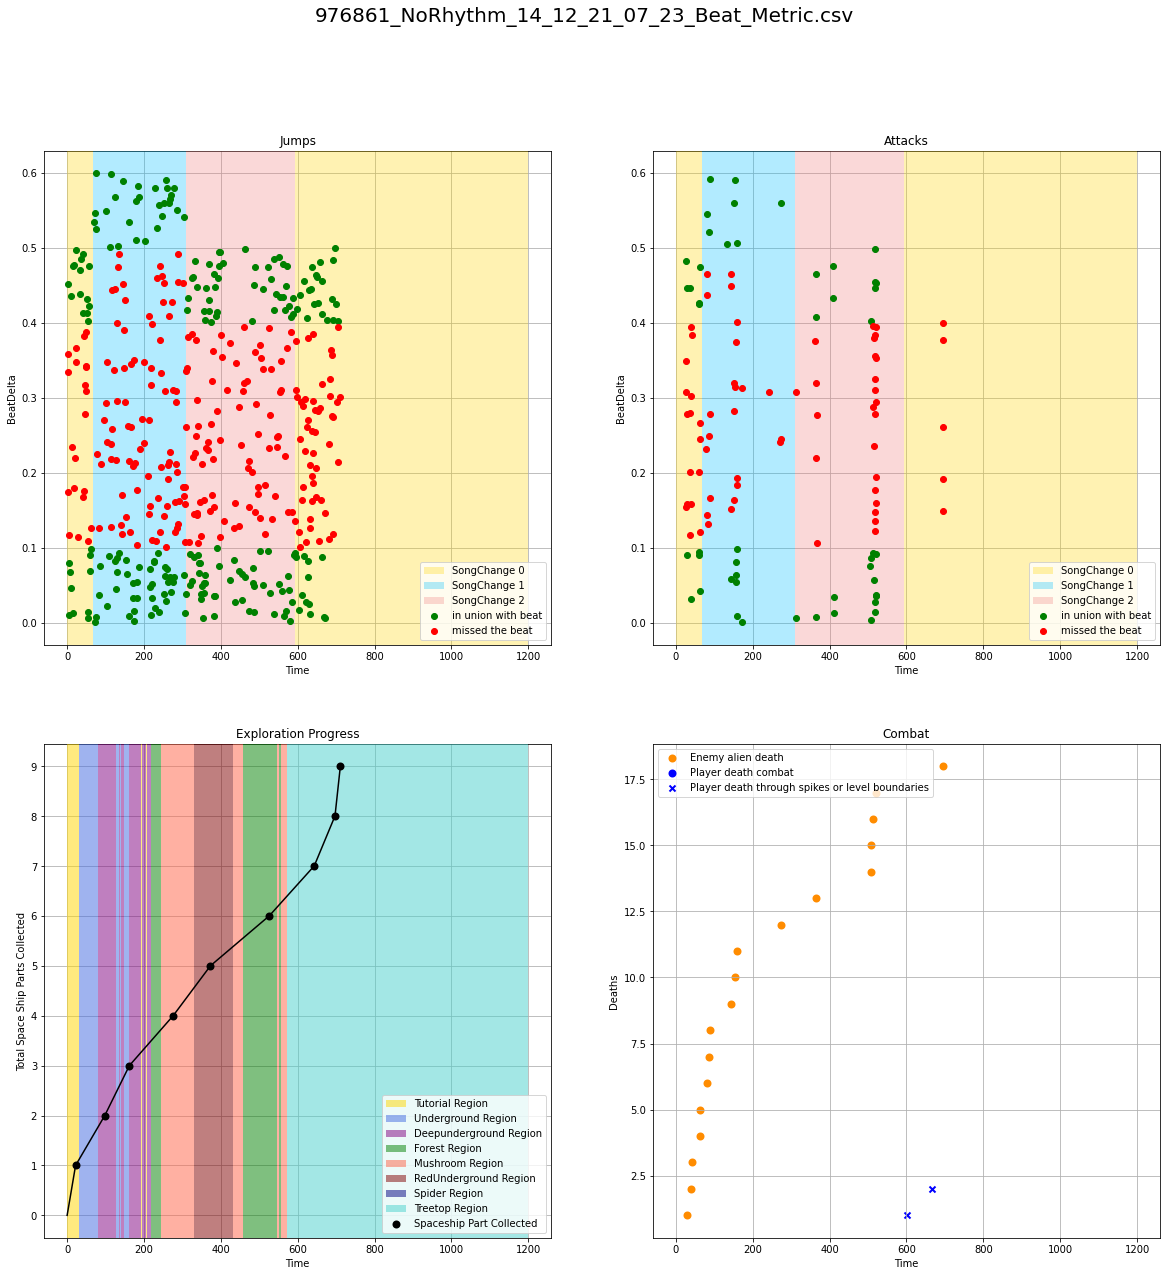

976861_RhythmControlled_14_12_21_06_59_Beat_Metric.csv 976861_RhythmControlled_14_12_21_06_59_Various_Metric.csv 976861_RhythmControlled_14_12_21_06_59_Combat_Metric.csv
time spent in songs: {'SongChange 0': 462, 'SongChange 1': 388, 'SongChange 2': 350}
Jumps hits: 540/732 = 73.77 %
Attacks hits: 121/143 = 84.62 %
unique regions discovered: 9/8 = 112.5 %
total region changes: 32
time spent in regions: {'Tutorial': 83, 'Underground': 167, 'Deepunderground': 115, 'Forest': 120, 'Mushroom': 291, 'Treetop': 365, 'RedUnderground': 222, 'Spider': -163}


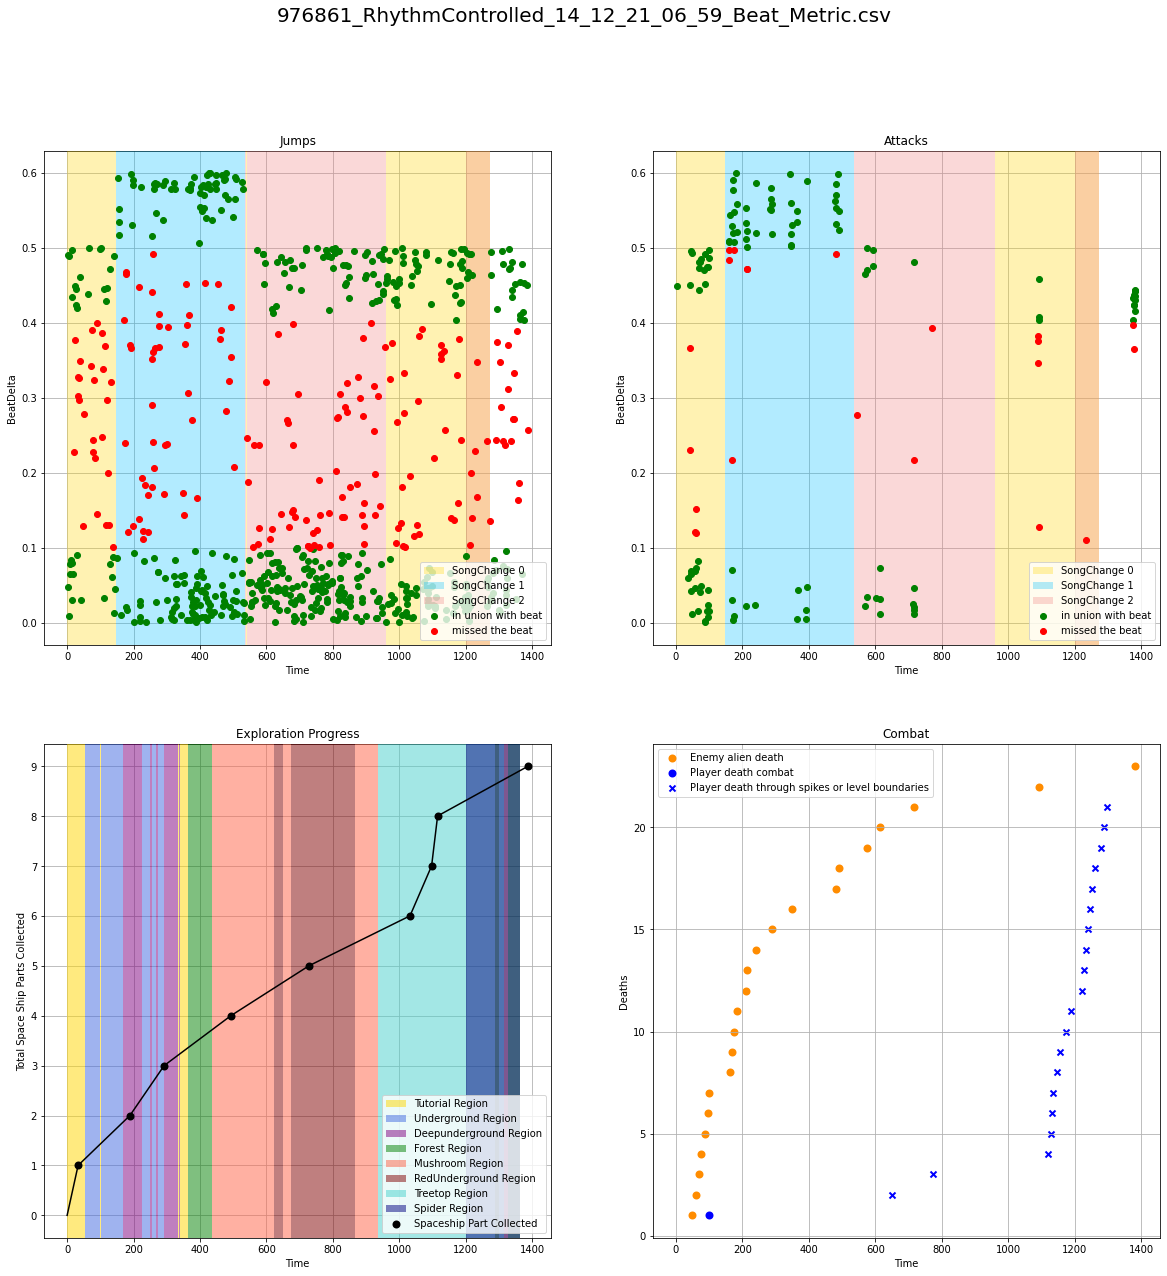

994741_NoRhythm_14_12_21_05_10_Beat_Metric.csv 994741_NoRhythm_14_12_21_05_10_Various_Metric.csv 994741_NoRhythm_14_12_21_05_10_Combat_Metric.csv
time spent in songs: {'SongChange 0': 1016, 'SongChange 1': 0, 'SongChange 2': 184}
Jumps hits: 161/431 = 37.35 %
Attacks hits: 94/235 = 40.0 %
unique regions discovered: 5/8 = 62.5 %
total region changes: 8
time spent in regions: {'Tutorial': 125, 'Underground': 0, 'Deepunderground': 0, 'Forest': 84, 'Mushroom': 377, 'Treetop': 614, 'RedUnderground': 0, 'Spider': 0}


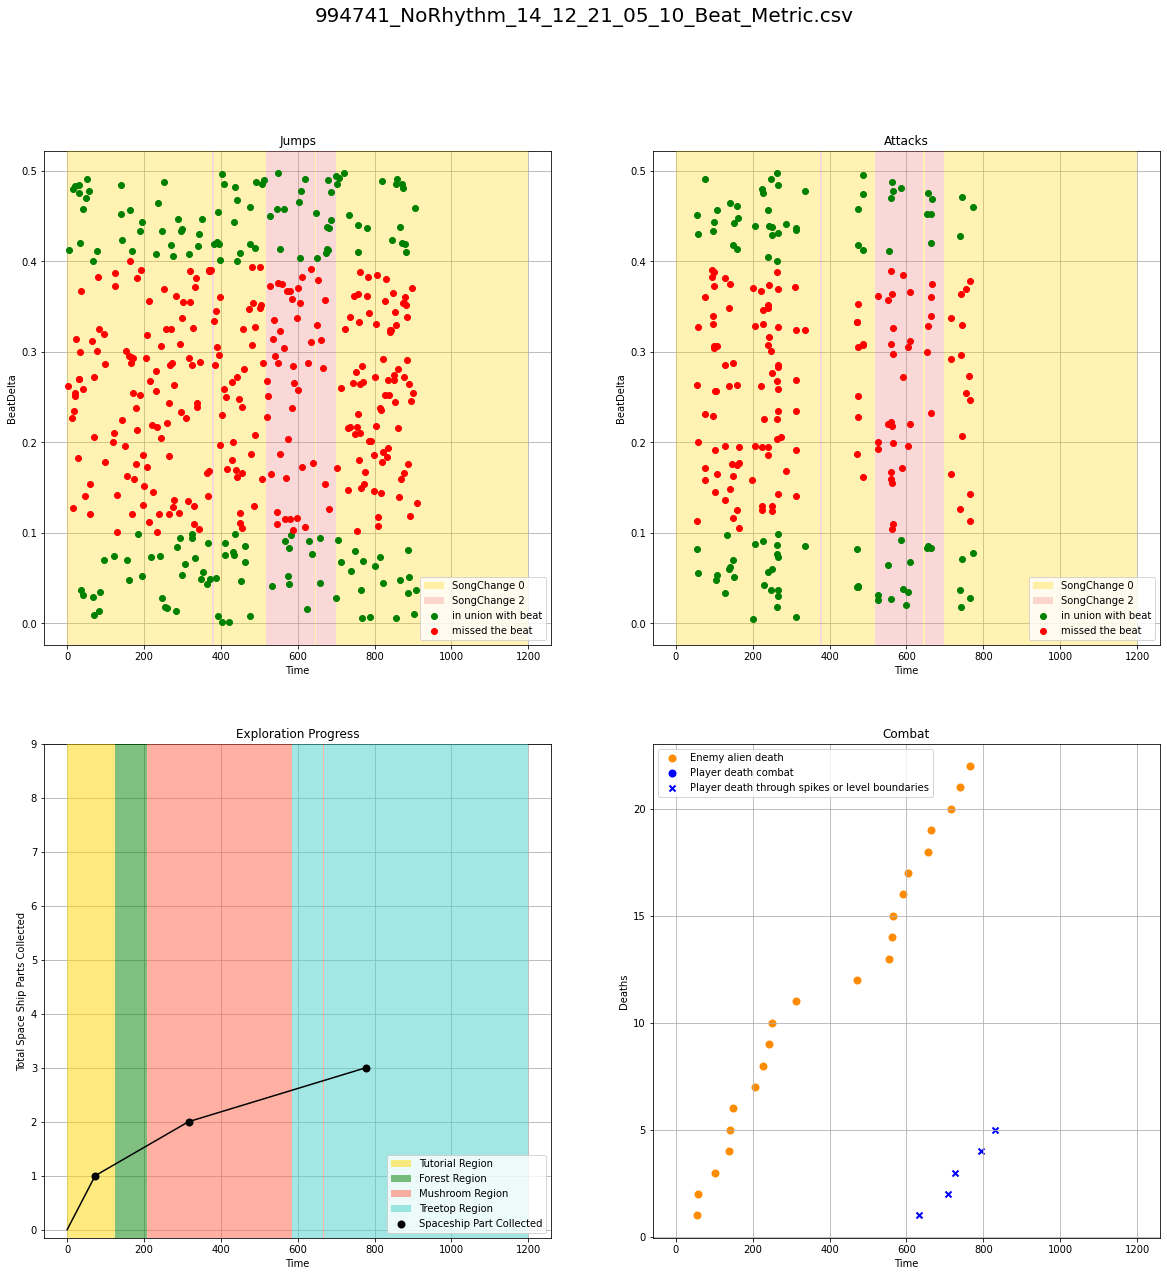

994741_RhythmControlled_14_12_21_05_33_Beat_Metric.csv 994741_RhythmControlled_14_12_21_05_33_Various_Metric.csv 994741_RhythmControlled_14_12_21_05_33_Combat_Metric.csv
time spent in songs: {'SongChange 0': 888, 'SongChange 1': 0, 'SongChange 2': 312}
Jumps hits: 186/430 = 43.26 %
Attacks hits: 66/125 = 52.8 %
unique regions discovered: 6/8 = 75.0 %
total region changes: 10
time spent in regions: {'Tutorial': 65, 'Underground': 0, 'Deepunderground': 0, 'Forest': 143, 'Mushroom': 333, 'Treetop': 617, 'RedUnderground': 42, 'Spider': 0}


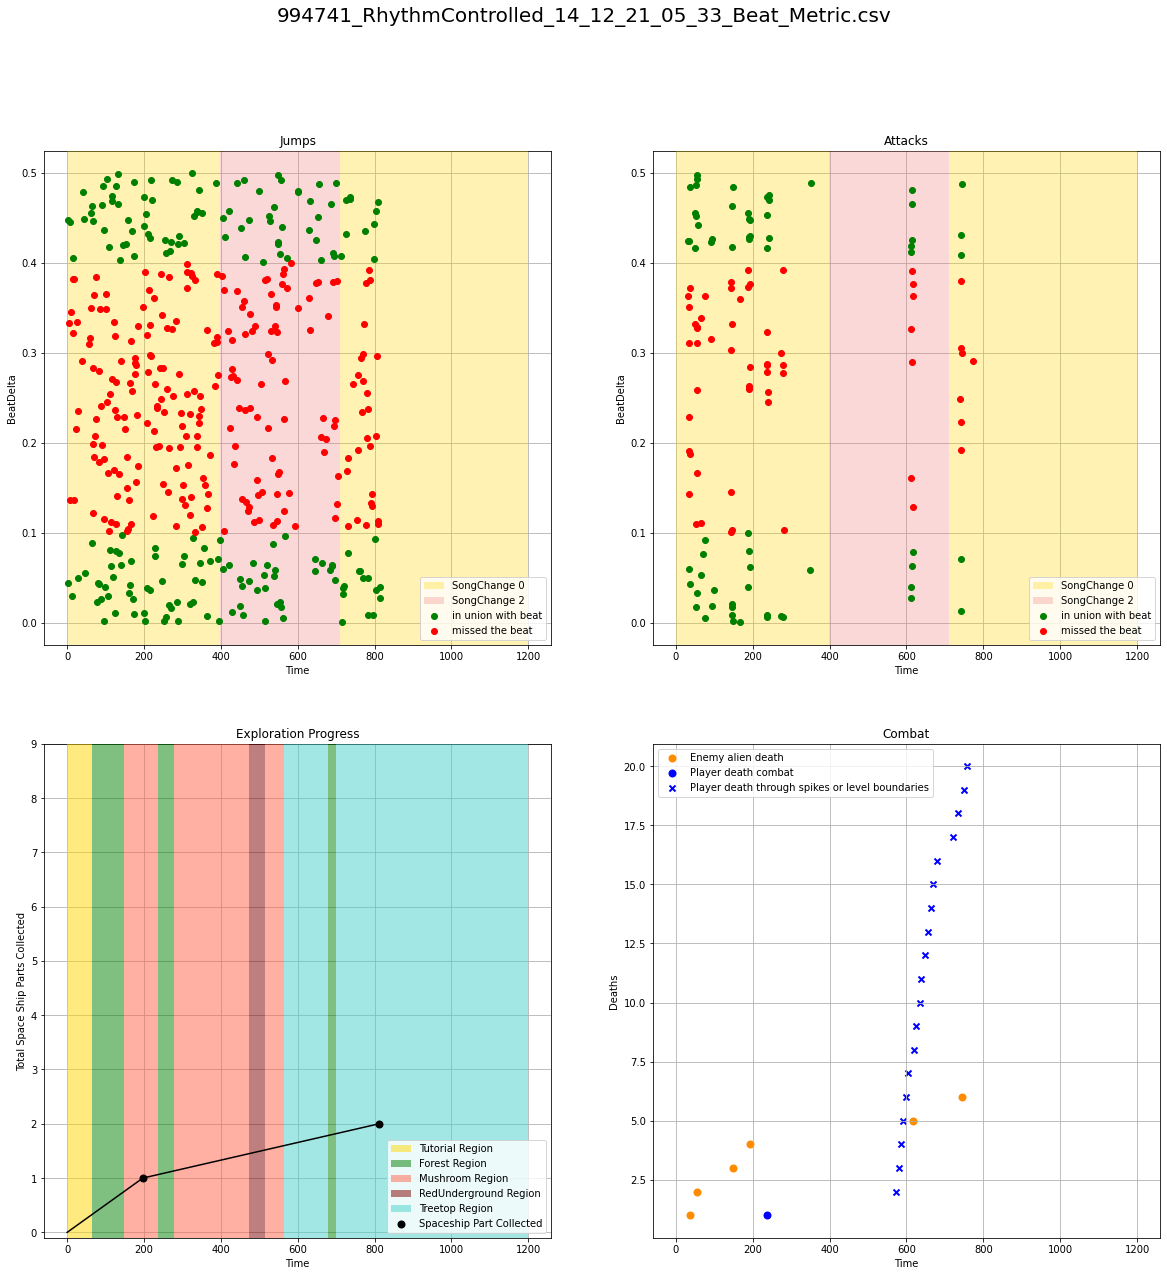

In [110]:
for beat, various, combat in zip(beat_metrics,various_metrics,combat_metrics):
    Analyse(beat, various, combat)

Notes:

In RythmControlled less fighting because its more frustrating?

Only compare first game versions played. In second playthrough people know more and it might change results